# MultiOmics RNA + ATAC for Chao dataset emphasis on OL population (MORNAATACCOL) technical documentation
## Multiomics RNAseq & ATACseq on EAE model

<hr>

**This notebook is the following of MORNAATACCOL 12 notebook**

<hr>

In [ ]:
#Memory needed for a full run : 256Gb

In [ ]:
#Early1               = P21208_1003_EAE_ARC
#PeakCtrl2            = P21208_1004_EAE_ARC
#Peak2                = P21208_1005_EAE_ARC
#LateCtrl1            = MORNAATACC_1002 (P21520_1002)
#Late1                = MORNAATACC_1003 (P21520_1003)
#Early2               = P23605_1001
#EarlyCtrl2           = P23605_1002
#Peak3                = P23605_1003
#PeakCtrl3            = P23605_1004
#EarlyCtrl3           = P24115_1001
#EarlyFemale3         = P24115_1002
#EarlyMale3           = P24115_1003
#Late2                = P25316_1001
#LateCtrl2            = P25316_1002
#Late3                = P25316_1003
#LateCtrl3            = P25316_1004
#PeakMale4            = P27208_1001
#PeakFemale4          = P27208_1002
#LateMale4            = P27208_1003
#LateFemale4          = P27208_1004
#Naive1               = P26203_1003
#Naive2               = P26203_1004
#Peak5                = P29557_1001
#Late5                = P29557_1002
#Naive3               = P29557_1004
#EarlyCtrl4           = P29557_1005
#EarlyCtrlMale5       = P29557_1006
#EarlyCtrlFemale5     = P29557_1007
#Early4               = P29557_1008
#EarlyMale5           = P29557_1009
#EarlyFemale5         = P29557_1010

## 0. Environment status

In [5]:
%use

Subkernel 
 Kernel Name 
 Language 
 Language Module 
 Interpreter 
 
 Bash 
 bash 
 bash 
 sos_bash 
 /usr/bin/python3 
 
 Bash 
 calysto_bash 
 bash 
 sos_bash 
 python 
 
 Python3 
 python3 
 python 
 sos_python 
 python 
 
 R 
 ir 
 R 
 sos_r 
 /usr/lib/R/bin/R 
 
 SoS 
 sos 
 sos 
 
 /usr/bin/python3

In [3]:
lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04 LTS
Release:	20.04
Codename:	focal


In [4]:
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
Address sizes:       46 bits physical, 48 bits virtual
CPU(s):              20
On-line CPU(s) list: 0-19
Thread(s) per core:  1
Core(s) per socket:  10
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz
Stepping:            1
CPU MHz:             2735.498
CPU max MHz:         3100.0000
CPU min MHz:         1200.0000
BogoMIPS:            4390.12
Virtualization:      VT-x
L1d cache:           640 KiB
L1i cache:           640 KiB
L2 cache:            5 MiB
L3 cache:            50 MiB
NUMA node0 CPU(s):   0-9
NUMA node1 CPU(s):   10-19
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cm
                     ov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pb
                     e syscall nx pdpe1gb rdtscp lm constant_t

In [5]:
grep MemTotal /proc/meminfo | awk '{print $2 / 1024}'

128374


In [ ]:
apt list --installed

In [ ]:
pip list

In [9]:
jupyter --version

Selected Jupyter core packages...
IPython          : 7.30.1
ipykernel        : 6.6.0
ipywidgets       : 7.6.5
jupyter_client   : 7.1.0
jupyter_core     : 4.9.1
jupyter_server   : 1.13.1
jupyterlab       : 3.1.17
nbclient         : 0.5.9
nbconvert        : 6.2.0
nbformat         : 5.1.3
notebook         : 6.4.6
qtconsole        : 5.2.2
traitlets        : 5.1.0


In [1]:
#conda env export -n jupyter

## 1. Loading environments

### 1.1 R Packages

In [1]:
library(Seurat)
library(Signac)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(stringr)
library(harmony)
library(clustree)
library(data.table)
library(biomaRt)
library(cowplot)
library(randomForest)
library(ggplot2)
library(caret)
library(tidyverse)
library(pheatmap)
library(grid)
library(gridExtra)
library(biovizBase)
library(ggrepel)
library(viridis)
library(reshape2)
library(hues)
library(clusterProfiler)
library(org.Mm.eg.db)
library(ggnewscale)
library(scales)

#conda dependencies trouble
library(enrichplot)
library(ReactomePA)

library(textclean)
library(mclust)

library(muscat)
library(SingleCellExperiment)
library(magrittr)
library(plyr)
library(scater)
library(cowplot)
library(UpSetR)
library(limma)
library(Matrix.utils)
library(purrr)
library(DESeq2)
library(EnhancedVolcano)

#ATAC analysis Signac
library(JASPAR2020)
library(TFBSTools)

library(cicero)
library(SeuratWrappers)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading require

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] SeuratWrappers_0.3.5               cicero_1.3.9                      
 [3] Gviz_1.44.2                        monocle3_1.3.7                    
 [5] TFBSTools_1.40.0                   JASPAR2020_0.99.10                
 [7] EnhancedVolcano_1.20.0             DESeq2_1.42.1         

### 1.2 Functions

In [3]:
PrctCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        prct = unlist(lapply(genes,calc_helper, object=object))
        result = data.frame(Markers = genes, Cell_proportion = prct)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, PrctCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper <- function(object,genes){
    counts = object[['RNA']]@counts
    ncells = ncol(counts)
    if(genes %in% row.names(counts)){
    sum(counts[genes,]>0)/ncells
    }else{return(NA)}
}

NbCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        nb = unlist(lapply(genes,calc_helper_nb, object=object))
        result = data.frame(Markers = genes, Cell_nb = nb)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, NbCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper_nb <- function(object,genes){
    counts = object[['RNA']]@counts
    if(genes %in% row.names(counts)){
    length(counts[genes,][counts[genes,] > 0])
    }else{return(NA)}
}

DoMultiBarHeatmap <- function (object, features = NULL, cells = NULL, group.by = "ident", additional.group.by = NULL, additional.group.sort.by = NULL,  cols.use = NULL, group.bar = TRUE, disp.min = -2.5, disp.max = NULL, layer = "scale.data", assay = NULL, label = TRUE, size = 5.5, hjust = 0, angle = 45, raster = TRUE, draw.lines = TRUE, lines.width = NULL, group.bar.height = 0.02, combine = TRUE){

  cells <- cells %||% colnames(x = object)
  if (is.numeric(x = cells)) {
    cells <- colnames(x = object)[cells]
  }
  assay <- assay %||% DefaultAssay(object = object)
  DefaultAssay(object = object) <- assay
  features <- features %||% VariableFeatures(object = object)
  ## Why reverse???
  features <- rev(x = unique(x = features))
  disp.max <- disp.max %||% ifelse(test = layer == "scale.data", yes = 2.5, no = 6)
  possible.features <- rownames(x = LayerData(object = object, assay = assay, layer = layer))
  if (any(!features %in% possible.features)) {
    bad.features <- features[!features %in% possible.features]
    features <- features[features %in% possible.features]
    if (length(x = features) == 0) {
      stop("No requested features found in the ", layer,
      " slot for the ", assay, " assay.")
    }
    warning("The following features were omitted as they were not found in the ", layer, " slot for the ", assay, " assay: ", paste(bad.features, collapse = ", "))
  }

  if (!is.null(additional.group.sort.by)) {
    if (any(!additional.group.sort.by %in% additional.group.by)) {
      bad.sorts <- additional.group.sort.by[!additional.group.sort.by %in% additional.group.by]
      additional.group.sort.by <- additional.group.sort.by[additional.group.sort.by %in% additional.group.by]
      if (length(x = bad.sorts) > 0) {
        warning("The following additional sorts were omitted as they were not a subset of additional.group.by : ",
        paste(bad.sorts, collapse = ", "))
      }
    }
  }

  data <- as.data.frame(x = as.matrix(x = t(x = LayerData(object = object, assay = assay, layer = layer)[features, cells, drop = FALSE])))

  object <- suppressMessages(expr = StashIdent(object = object, save.name = "ident"))
  group.by <- group.by %||% "ident"
  groups.use <- object[[c(group.by, additional.group.by[!additional.group.by %in% group.by])]][cells, , drop = FALSE]
  plots <- list()
  for (i in group.by) {
    data.group <- data
    if (!is.null(additional.group.by)) {
      additional.group.use <- additional.group.by[additional.group.by!=i]
      if (!is.null(additional.group.sort.by)){
        additional.sort.use = additional.group.sort.by[additional.group.sort.by != i]
      } else {
        additional.sort.use = NULL
      }
    } else {
      additional.group.use = NULL
      additional.sort.use = NULL
    }

    group.use <- groups.use[, c(i, additional.group.use), drop = FALSE]

    for(colname in colnames(group.use)){
      if (!is.factor(x = group.use[[colname]])) {
        group.use[[colname]] <- factor(x = group.use[[colname]])
      }
    }

    if (draw.lines) {
      lines.width <- lines.width %||% ceiling(x = nrow(x = data.group) * 0.0025)
      placeholder.cells <- sapply(X = 1:(length(x = levels(x = group.use[[i]])) * lines.width), FUN = function(x) {
        return(Seurat:::RandomName(length = 20))
      })
      placeholder.groups <- data.frame(rep(x = levels(x = group.use[[i]]), times = lines.width))
      group.levels <- list()
      group.levels[[i]] = levels(x = group.use[[i]])
      for (j in additional.group.use) {
        group.levels[[j]] <- levels(x = group.use[[j]])
        placeholder.groups[[j]] = NA
      }

      colnames(placeholder.groups) <- colnames(group.use)
      rownames(placeholder.groups) <- placeholder.cells

      group.use <- sapply(group.use, as.vector)
      rownames(x = group.use) <- cells

      group.use <- rbind(group.use, placeholder.groups)

      for (j in names(group.levels)) {
        group.use[[j]] <- factor(x = group.use[[j]], levels = group.levels[[j]])
      }

      na.data.group <- matrix(data = NA, nrow = length(x = placeholder.cells), ncol = ncol(x = data.group), dimnames = list(placeholder.cells, colnames(x = data.group)))
      data.group <- rbind(data.group, na.data.group)
    }

    order_expr <- paste0('order(', paste(c(i, additional.sort.use), collapse=','), ')')
    group.use = with(group.use, group.use[eval(parse(text=order_expr)), , drop=F])

    plot <- Seurat:::SingleRasterMap(data = data.group, raster = raster, disp.min = disp.min, disp.max = disp.max, feature.order = features, cell.order = rownames(x = group.use), group.by = group.use[[i]])

    if (group.bar) {
      pbuild <- ggplot_build(plot = plot)
      group.use2 <- group.use
      cols <- list()
      na.group <- Seurat:::RandomName(length = 20)
      for (colname in rev(x = colnames(group.use2))) {
        if (colname == i) {
          colid = paste0('Identity (', colname, ')')
        } else {
          colid = colname
        }

        # Default
        cols[[colname]] <- c(scales::hue_pal()(length(x = levels(x = group.use[[colname]]))))

        #Overwrite if better value is provided
        if (!is.null(cols.use[[colname]])) {
          req_length = length(x = levels(group.use))
          if (length(cols.use[[colname]]) < req_length){
            warning("Cannot use provided colors for ", colname, " since there aren't enough colors.")
          } else {
            if (!is.null(names(cols.use[[colname]]))) {
              if (all(levels(group.use[[colname]]) %in% names(cols.use[[colname]]))) {
                cols[[colname]] <- as.vector(cols.use[[colname]][levels(group.use[[colname]])])
              } else {
                warning("Cannot use provided colors for ", colname, " since all levels (", paste(levels(group.use[[colname]]), collapse=","), ") are not represented.")
              }
            } else {
              cols[[colname]] <- as.vector(cols.use[[colname]])[c(1:length(x = levels(x = group.use[[colname]])))]
            }
          }
        }

        # Add white if there's lines
        if (draw.lines) {
          levels(x = group.use2[[colname]]) <- c(levels(x = group.use2[[colname]]), na.group)
          group.use2[placeholder.cells, colname] <- na.group
          cols[[colname]] <- c(cols[[colname]], "#FFFFFF")
        }
        names(x = cols[[colname]]) <- levels(x = group.use2[[colname]])

        y.range <- diff(x = pbuild$layout$panel_params[[1]]$y.range)
        y.pos <- max(pbuild$layout$panel_params[[1]]$y.range) + y.range * 0.015
        y.max <- y.pos + group.bar.height * y.range
        pbuild$layout$panel_params[[1]]$y.range <- c(pbuild$layout$panel_params[[1]]$y.range[1], y.max)

        plot <- suppressMessages(plot +
          annotation_raster(raster = t(x = cols[[colname]][group.use2[[colname]]]),  xmin = -Inf, xmax = Inf, ymin = y.pos, ymax = y.max) +
          annotation_custom(grob = grid::textGrob(label = colid, hjust = 0, gp = gpar(cex = 0.75)), ymin = mean(c(y.pos, y.max)), ymax = mean(c(y.pos, y.max)), xmin = Inf, xmax = Inf) +
          coord_cartesian(ylim = c(0, y.max), clip = "off")
        )


        if ((colname == i) && label) {
          x.max <- max(pbuild$layout$panel_params[[1]]$x.range)
          x.divs <- pbuild$layout$panel_params[[1]]$x.major %||% pbuild$layout$panel_params[[1]]$x$break_positions()
          group.use$x <- x.divs

          label.x.pos <- tapply(X = group.use$x, INDEX = group.use[[colname]], FUN = median) * x.max
          label.x.pos <- data.frame(group = names(x = label.x.pos), label.x.pos)
          plot <- plot + geom_text(stat = "identity", data = label.x.pos, aes_string(label = "group", x = "label.x.pos"), y = y.max + y.max *  0.03 * 0.5, angle = angle, hjust = hjust, size = size)
          plot <- suppressMessages(plot + coord_cartesian(ylim = c(0, y.max + y.max * 0.002 * max(nchar(x = levels(x = group.use[[colname]]))) * size), clip = "off"))
        }
      }
    }
    plot <- plot + theme(line = element_blank())
    plots[[i]] <- plot
  }
  if (combine) {
    plots <- CombinePlots(plots = plots)
  }
  return(plots)
}


#####################################################
# Function for getting the marker peaks from the Seurat
# object, based on the current ident
#####################################################
getMarkerPeaks <- function(obj, doublets, n_peaks = 100, min_cells = 200){

  n_clusters = length(unique(as.vector(Idents(obj))))
  
  cells <- Cells(obj)
  
  # remove the doublet cells for better marker peaks
  obj <- subset(obj, cells = cells[!cells %in% doublets])
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  # default preporcessing o Signac applied
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the marker peaks between all clusters
  da_peaks <- FindAllMarkers(
    object = obj,
    slot = "data",
    min.pct = 0.1,
    only.pos = TRUE,
    test.use = 'LR',
    min.cells.group = min_cells,
    verbose = F
  )
  
  # only keep the significant peaks
  metadata = lapply(unique(da_peaks$cluster), function(x){
    return(data.frame(da_peaks[da_peaks$p_val_adj < 0.05 & da_peaks$cluster == x,]))
  })
  
  names(metadata) <- paste0("Cluster_", unique(da_peaks$cluster))
  
  rm(da_peaks)
  
  meta_peaks = data.frame()
  
  for (i in names(metadata)) {
    
    cur_meta = data.frame(metadata[[i]])
    cur_meta$peaks = row.names(metadata[[i]])
    cur_meta$cluster = i
    row.names(cur_meta) = c()
    
    meta_peaks = rbind(meta_peaks, cur_meta)
    
    rm(cur_meta)
    
  }
  
  # sort the peaks based on the fold changes and signifigance, choose ones with high FC first
  meta_peaks = meta_peaks[order(meta_peaks$avg_logFC, -meta_peaks$p_val_adj, decreasing = T),]
  
  marker_peaks_set = data.frame(matrix(ncol=2,nrow=0, dimnames=list(NULL, c("gene", "cluster"))))
  
  # extract 100 marker peaks for each cluster
  while(nrow(marker_peaks_set) < n_peaks*n_clusters) {
    
    temp = meta_peaks[1, c("gene", "cluster")]
    
    marker_peaks_set = rbind(marker_peaks_set, temp)
    
    meta_peaks = meta_peaks[which(meta_peaks$gene != temp$gene),]
    
    if(length(which(marker_peaks_set$cluster == temp$cluster)) == n_peaks){
      meta_peaks = meta_peaks[which(meta_peaks$cluster != temp$cluster),]
    }
    
    rm(temp)
  }
  
  marker_peaks_set = marker_peaks_set[!is.na(marker_peaks_set$gene),]
  
  marker_peaks_set$cluster= factor(marker_peaks_set$cluster, levels = str_sort(unique(marker_peaks_set$cluster), numeric = T))
  marker_peaks_set = marker_peaks_set[order(marker_peaks_set$cluster),]
  
  rm(meta_peaks)
  
  colnames(marker_peaks_set)[1]<- "peaks"
  
  return(marker_peaks_set)
}

############################################
# get the readcount distribution profile for
# the singlet cells of every cluster
############################################
annotateDoublets <- function(obj, marker_peaks, doublets, k = 15){

  # get the read count distributions on the cluster specific marker peaks for all of the cells
  cell.values <- getCellValues(obj, cells = Cells(obj), marker_peaks_set = marker_peaks, doublets = doublets, k = k)
  
  #get the profile for the singlet cells of each cluster
  singlet.profile <- getProfiles(cell.values)
 
  # just annotate the doublets
  doublets <- cell.values %>% 
    subset(doublet == "doublet")
  
  clusters <- doublets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # look at every cluster in the data
  a.class <- lapply(clusters, function(clus){
    
    # just select the doublets that have the current cluster
    # as its most dominant cluster
    t.doublets <- doublets %>%
      subset(a.homotypic == clus, select = clusters)
    
    # get the profile of the current cluster
    t.profile <- singlet.profile[,clus]
    
    # calculate the distance of doublet cell distributions to
    # the profile of the current cluster
    t.dist <- apply(t.doublets, 1, function(cell){
      return(dist(rbind(cell, t.profile)))
    })
    
    # fit a GMM using the mclust package with no class limitations
    fit <- Mclust(t.dist, verbose = F)
    t.class <- fit$classification
    
    t.doublets$dist <- t.dist[rownames(t.doublets)]
    t.doublets$class <- t.class[rownames(t.doublets)]
    t.doublets$max.class <- names(which.max(fit[["parameters"]][["mean"]]))
    t.doublets$num.class <- length(unique(fit$classification))
    return(t.doublets[,c("dist", "class", "max.class", "num.class")])
  }) %>% bind_rows()
  
  doublets$class <- a.class[rownames(doublets),"class"]
  doublets$max.class <- a.class[rownames(doublets),"max.class"]
  doublets$num.class <- a.class[rownames(doublets),"num.class"]
  
  doublets <- lapply(rownames(doublets), function(cell){
    probs <- doublets[cell, clusters]
    
    # only classify the doublets that belong to the final class 
    # doublets[cell,"type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"], "heterotypic", "homotypic")
    doublets[cell,"d.type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"] & doublets[cell,"num.class"] > 1,
                                    "heterotypic", "homotypic")
    
    # report the top clusters based on type of the doublet; if homotypic just one, if heterotypic top 2 clusters
    doublets[cell, "d.annotation"] <- ifelse(doublets[cell,"d.type"] == "homotypic",
                                             names(probs)[order(probs, decreasing = T)[1]],
                                             paste(sort(names(probs)[order(probs, decreasing = T)[1:2]]), collapse = ".")) 
    
    return(doublets[cell,!(colnames(doublets) %in% c("a.heterotypic", "a.homotypic", "ident", "class", "max.class","num.class")), drop = FALSE])
  }) %>% bind_rows()

  return(doublets)
}

#####################################################
# Function to get the ditsribution of read counts on
# the marker peaks of clusters
#####################################################
getReadCountDistributions <- function(marker_peaks, read_counts){
  
  t_read_counts = data.frame(merge(marker_peaks, 100*read_counts, by.x = "peaks", by.y = 0, sort = F))
  names(t_read_counts) <- sub("^X", "", names(t_read_counts))
  t_read_counts$ids = unclass(t_read_counts$cluster)
  
  probs = matrix(nrow = ncol(read_counts), ncol = length(unique(t_read_counts$cluster)))
  
  row.names(probs) <- colnames(read_counts)
  colnames(probs) <- unique(t_read_counts$cluster)
  
  for (i in 1:nrow(probs)) {
    density_data = vector()
    
    for(j in 1:nrow(t_read_counts))
      density_data = c(density_data, rep(t_read_counts$ids[j], t_read_counts[j,row.names(probs)[i]]))
    
    for(j in 1:ncol(probs)){
      if(j==1)
        probs[i,j] = ecdf(density_data)(j)
      else
        probs[i,j] = (ecdf(density_data)(j) - ecdf(density_data)((j-1)))
    }
    
  }
  
  return(data.frame(probs))
}

#####################################################
# Function to plot the read count distributions of
# the given cells
#####################################################
plotReadCountDistributions <- function(probs, folder_path){
  
  if(!dir.exists(folder_path))
    dir.create(folder_path)
  
  sapply(rownames(probs), function(x){long_probs = gather(as.data.frame(bind_rows(probs[x,])), cell_type, probability, factor_key = TRUE)
  ggplot(data=long_probs, aes(x=cell_type, y=probability)) +
    geom_col() +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle(x) + xlab("Cluster") + ylab("Score") + ylim(0,1) +
    ggsave(filename = paste0(folder_path, "/Probs_", x, ".pdf"))})
  
}

#####################################################
# Function to add read count distributions for the 
# cells in the provided in te Seurat object with the
# provided marker peaks
#####################################################
getCellValues <- function(obj, cells, marker_peaks_set, doublets, k = 15){
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the neighbor graph of the cells for aggregation
  obj <- FindNeighbors(obj, reduction = "svd", dims = 1:50, k.param = k+1, verbose = F)
  
  cell_annotations <- lapply(cells, function(cell){
    
    # extract the k neighbors of the current cell
    neighbors <- names(obj@graphs$ATAC_nn[cell, obj@graphs$ATAC_nn[cell,] > 0])
    
    # extract the reads for the cell and its k-nearest neighbors
    reads <- Matrix::as.matrix(subset(obj, cells = neighbors, features = marker_peaks_set$peaks)@assays[["ATAC"]]@counts)
    
    no_clusters <- length(unique(marker_peaks_set$cluster))
    
    results = data.frame(matrix(nrow = 0, ncol = no_clusters+1)) %>%
      `colnames<-`(value = c("cell_id", as.character(unique(marker_peaks_set$cluster))))
    
    results[cell,"cell_id"] = cell
    
    # aggregate the reads for the cell by taking the mean with k-nn
    reads <- data.frame(apply(reads, 1, mean)) %>%
      `colnames<-`(value = cell)
    
    if(colSums(reads) == 0){
      results[,-1] <- 0
      
      results[cell, "a.heterotypic"] <- NA
      results[cell, "a.homotypic"] <- NA
        
      return(results)
    }
    
    # calculate the read count distribution of the cell on the marker peaks
    doublet_probs <- reads %>%
      getReadCountDistributions(marker_peaks_set,.) %>% data.frame()
    
    results[cell, colnames(doublet_probs)] <- doublet_probs
    
    # report the 2 clusters that have the highest score
    results[cell, "a.heterotypic"] <- paste(names(doublet_probs)[order(doublet_probs, decreasing = T)[1:2]], collapse = ".")
    
    #report the cluster with highest score
    results[cell, "a.homotypic"] <- names(which.max(doublet_probs))
    
    return(results)
  }) %>% do.call(rbind, .)
  
  # append the type of the cells
  cell_annotations <- mutate(cell_annotations, doublet = ifelse(cell_id %in% doublets, "doublet", "singlet"))
  row.names(cell_annotations) <- cell_annotations$cell_id
  
  cell_annotations[, "ident"] <- Idents(obj)[rownames(cell_annotations)]
  
  return(cell_annotations)
}

#####################################################
# get the read count distribution profile for the
# singlet cells of every cluster
#####################################################
getProfiles <- function(cell.values){

  # get the singlet cells
  singlets <- cell.values %>%
    subset(doublet == "singlet")
  
  clusters <- singlets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # for each cluster in the data find the average profile from singlets
  t.profile <- sapply(clusters, function(clus){
    t.singlets <- singlets %>%
      subset(a.homotypic == clus & paste0("Cluster_", ident) == clus, select = clusters)
    
    t.profile <- apply(t.singlets,2,mean)
    return(t.profile)
  })
  
  return(t.profile)
  
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

order_heatmap_genes <- function(x){
  if(ncol(x) == 1 | nrow(x) == 1) { return(rownames(x)) 
  } else {
    xs <- split(x, apply(x, 1, function(i) colnames(x)[which.max(i)]))
    if(ncol(x) == length(orig.ident_merge_colors)-1) {
      for(tp in names(xs)){
        xs[[tp]] <- xs[[tp]][order(xs[[tp]][,tp], decreasing=TRUE),]
      }
    }
    sapply(names(xs), function(i){
        order_heatmap_genes(xs[[i]][, colnames(x) != i, drop = FALSE ])
    }, simplify = FALSE)
  }
}

### 1.3 Set up R parameters

In [4]:
#Set up global parameters
OS_path <- "/sing_data/"
macs2_path = "/usr/local/bin/macs2"
amulet_path = "/AMULET"
#Conda Monod
#OS_path <- "/datb/gcb/gcb_bh/"
#macs2_path = "/home/bastien/miniconda3/envs/jupyter_MORNAATACC/bin/macs2"
#amulet_path = "/home/bastien/AMULET"

OS_path_datasets <- paste0(OS_path, "Data/MORNAATACC/Alignment/")
OS_path_outputs <- paste0(OS_path, "Data/MORNAATACC/Outputs/")
OS_path_inputs <- paste0(OS_path, "Data/MORNAATACC/Inputs/")
datasets_path <- paste0(OS_path,"Data/Others/Datasets/")

seed <- 424242
options(repr.plot.width=16, repr.plot.height=12)
options(future.globals.maxSize = 8000 * 1024^2)

options(repr.matrix.max.rows=100, repr.matrix.max.cols=100)

In [5]:
#Blue
#DDEAF8
#BBD4F1
#88B4E7
#5695DC
#2A75CB
#1F5898
#153B66

#Green
#E9EDE9
#D2DAD2
#BCC8BC
#A5B6A5
#8FA38F
#789178
#657B65
#536553
#404F40
#2E382E

#Gold
#FFF3D6
#FFE7AD
#FFD470
#FFC233
#F5AB00
#B88100
#7A5600

#Orange
#FDDDD8
#FBBAB1
#F88877
#F5563D
#E92A0C
#AE1F09
#741506

#Brown
#EFE7E6
#E0CECD
#C8A9A7
#B08482
#97615E
#714947
#4B312F

#Purple
#F6EEFC
#ECDCF9
#E2CBF6
#D8B9F3
#CEA8F0
#C596ED
#BB85EA
#B173E7
#A862E4
#9E51E1
#943FDE
#8A2EDC
#8023D1
#7621C0
#6B1EAE
#601B9D
#55188C
#4B157A
#401269
#350F57
#2A0C45
#1F0934
#150623
#0B0312

#Honey
#FFF9EB
#FFF3D6
#FFEDC2
#FFE7AD
#FFE099
#FFDA85
#FFD470
#FFCE5C
#FFC847
#FFC233
#FFBC1F
#FFB60A
#F5AB00
#E09D00
#CC8F00
#B88100
#A37200
#8F6400
#7A5600
#664700
#523900
#3D2B00
#291D00
#140E00

In [6]:
names_Ctrl <- c("EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3")
names_Early <- c("Early1", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5")
names_Peak <- c("Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5")
names_Late <- c("Late1", "Late2","Late3", "LateMale4", "LateFemale4", "Late5")

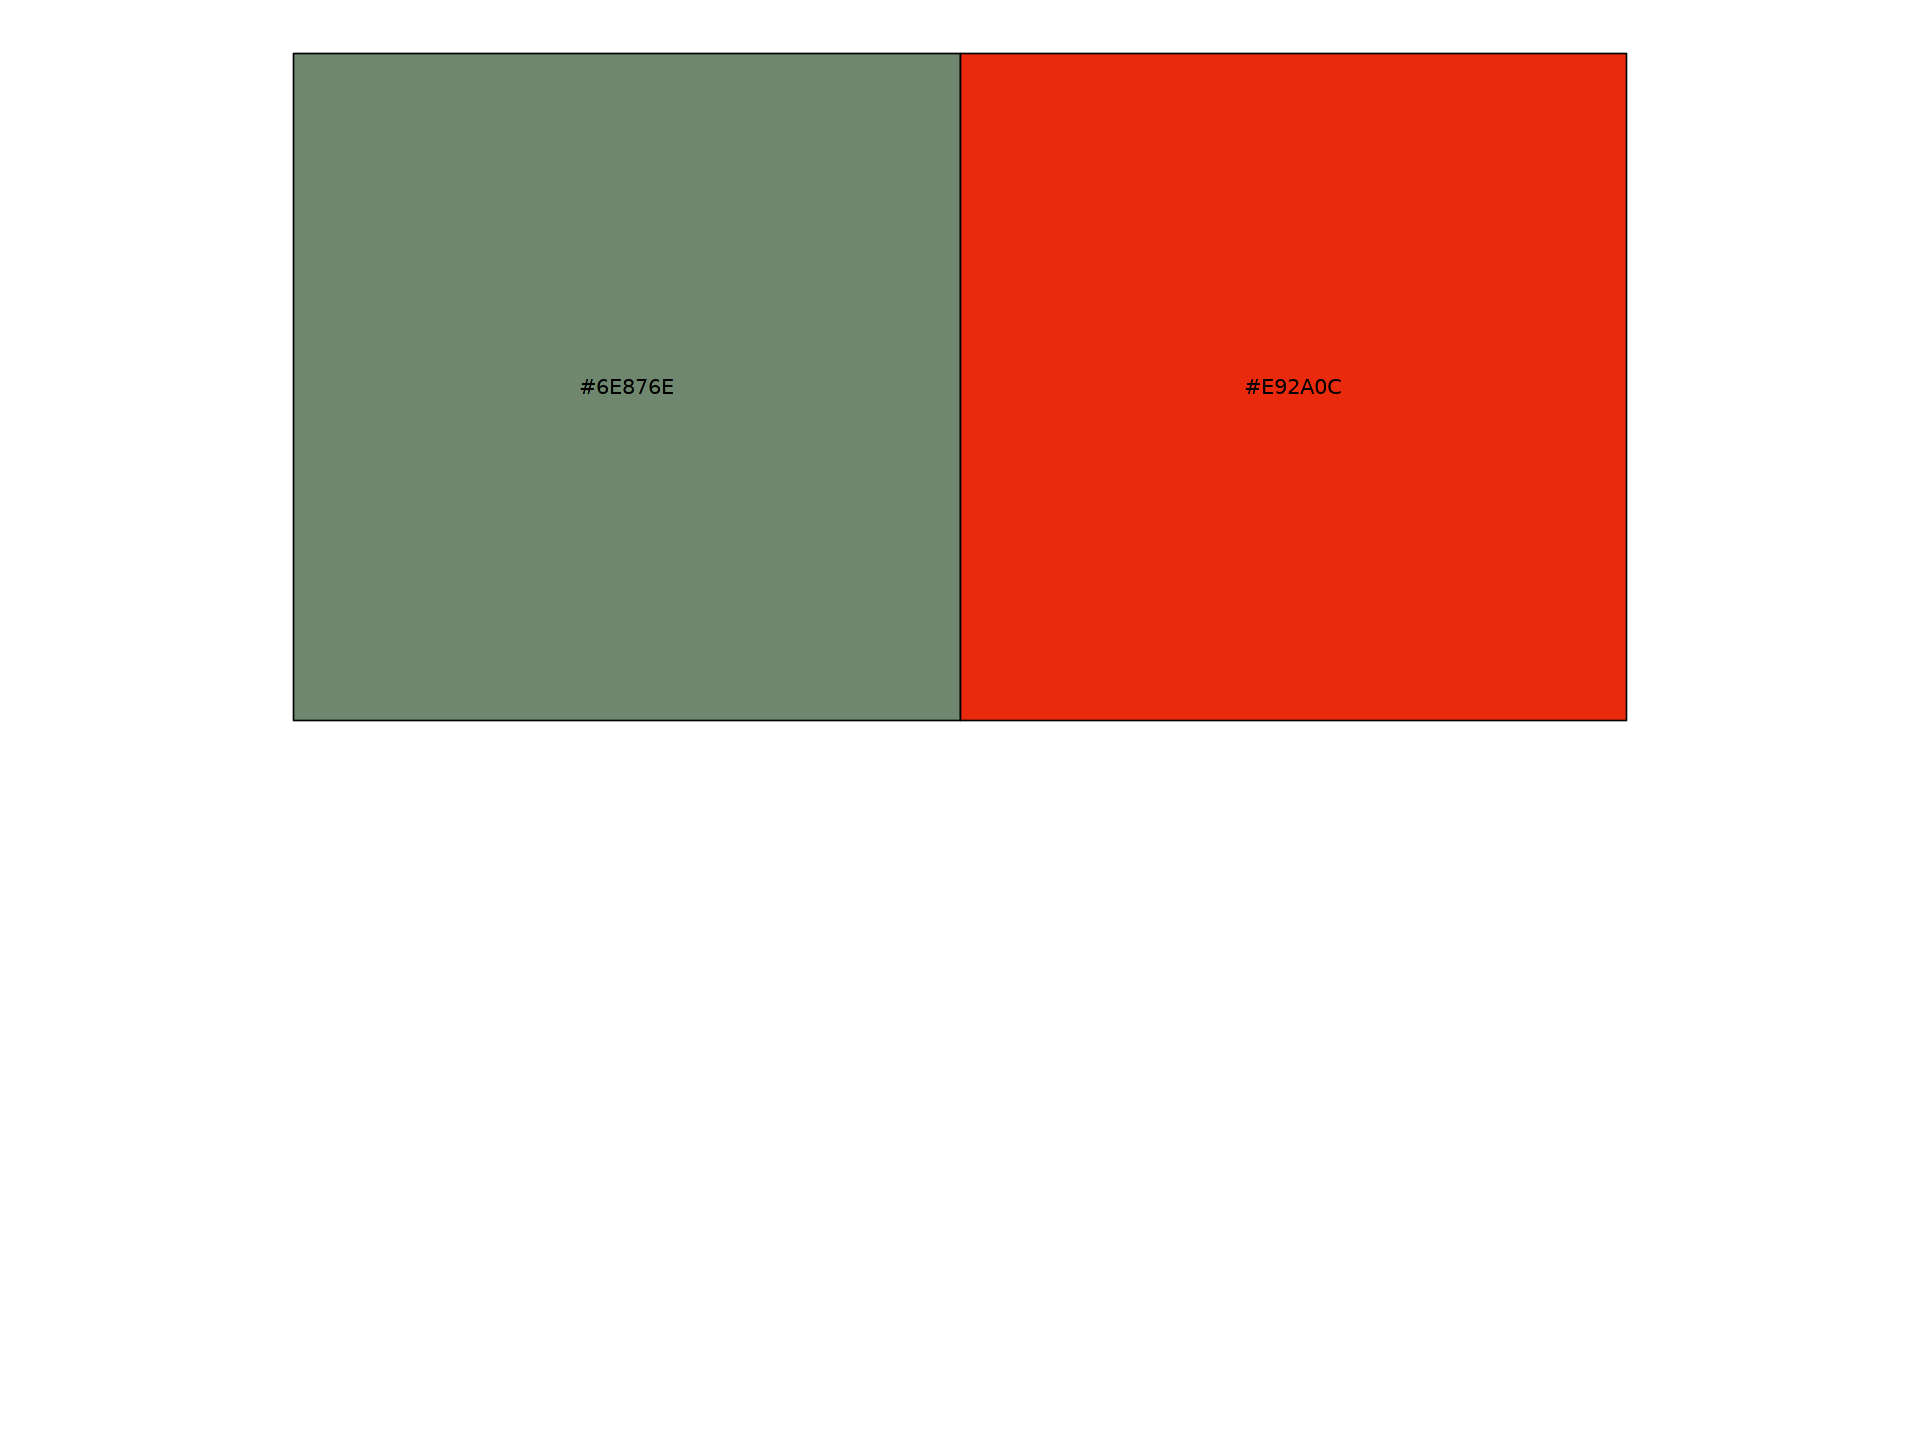

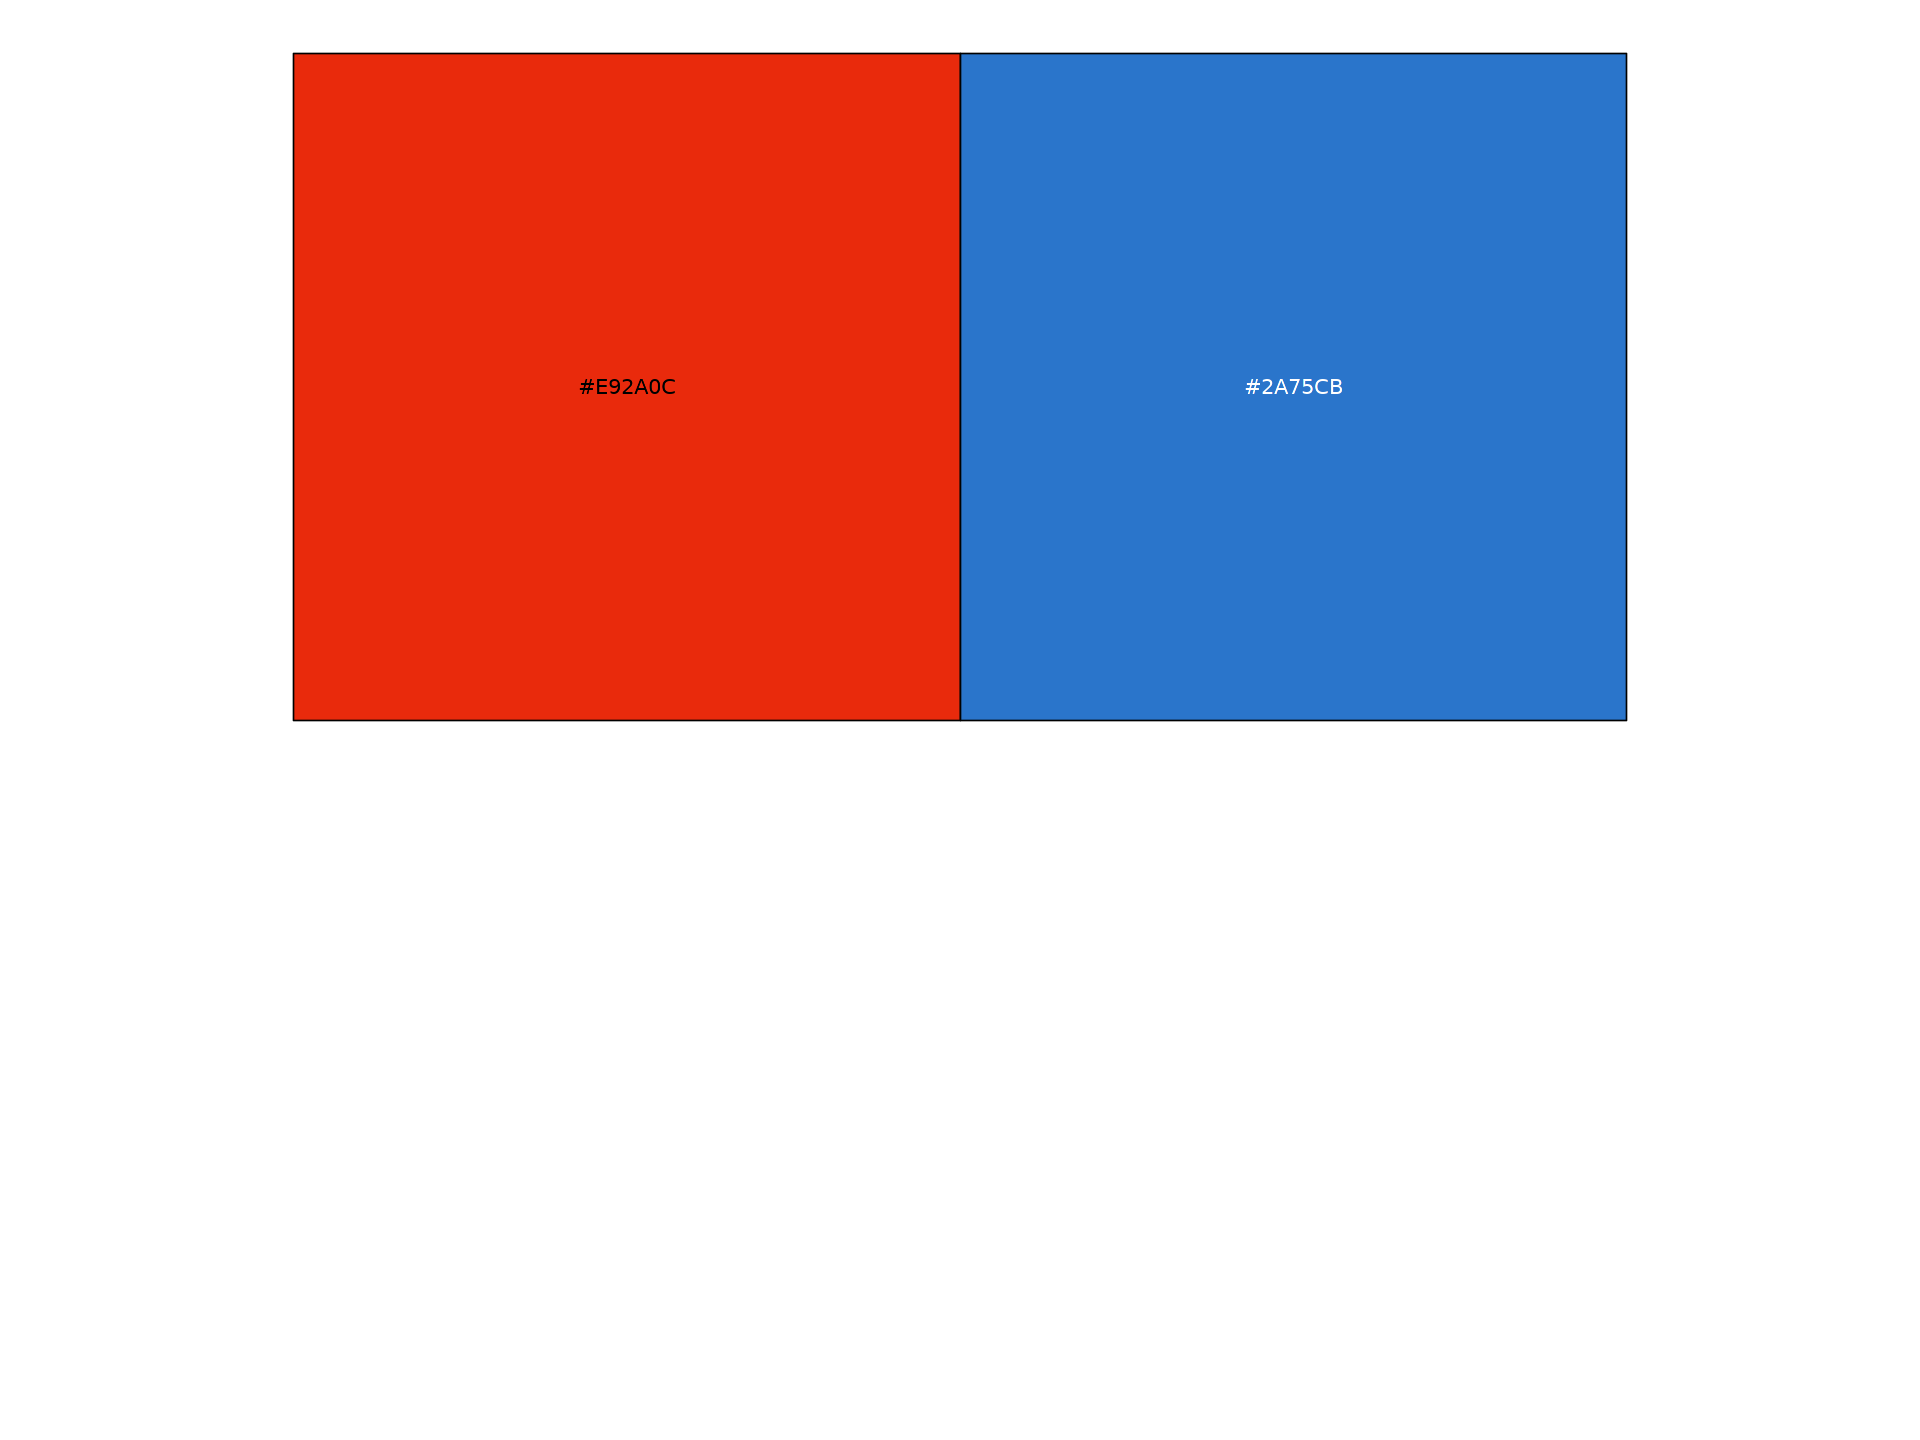

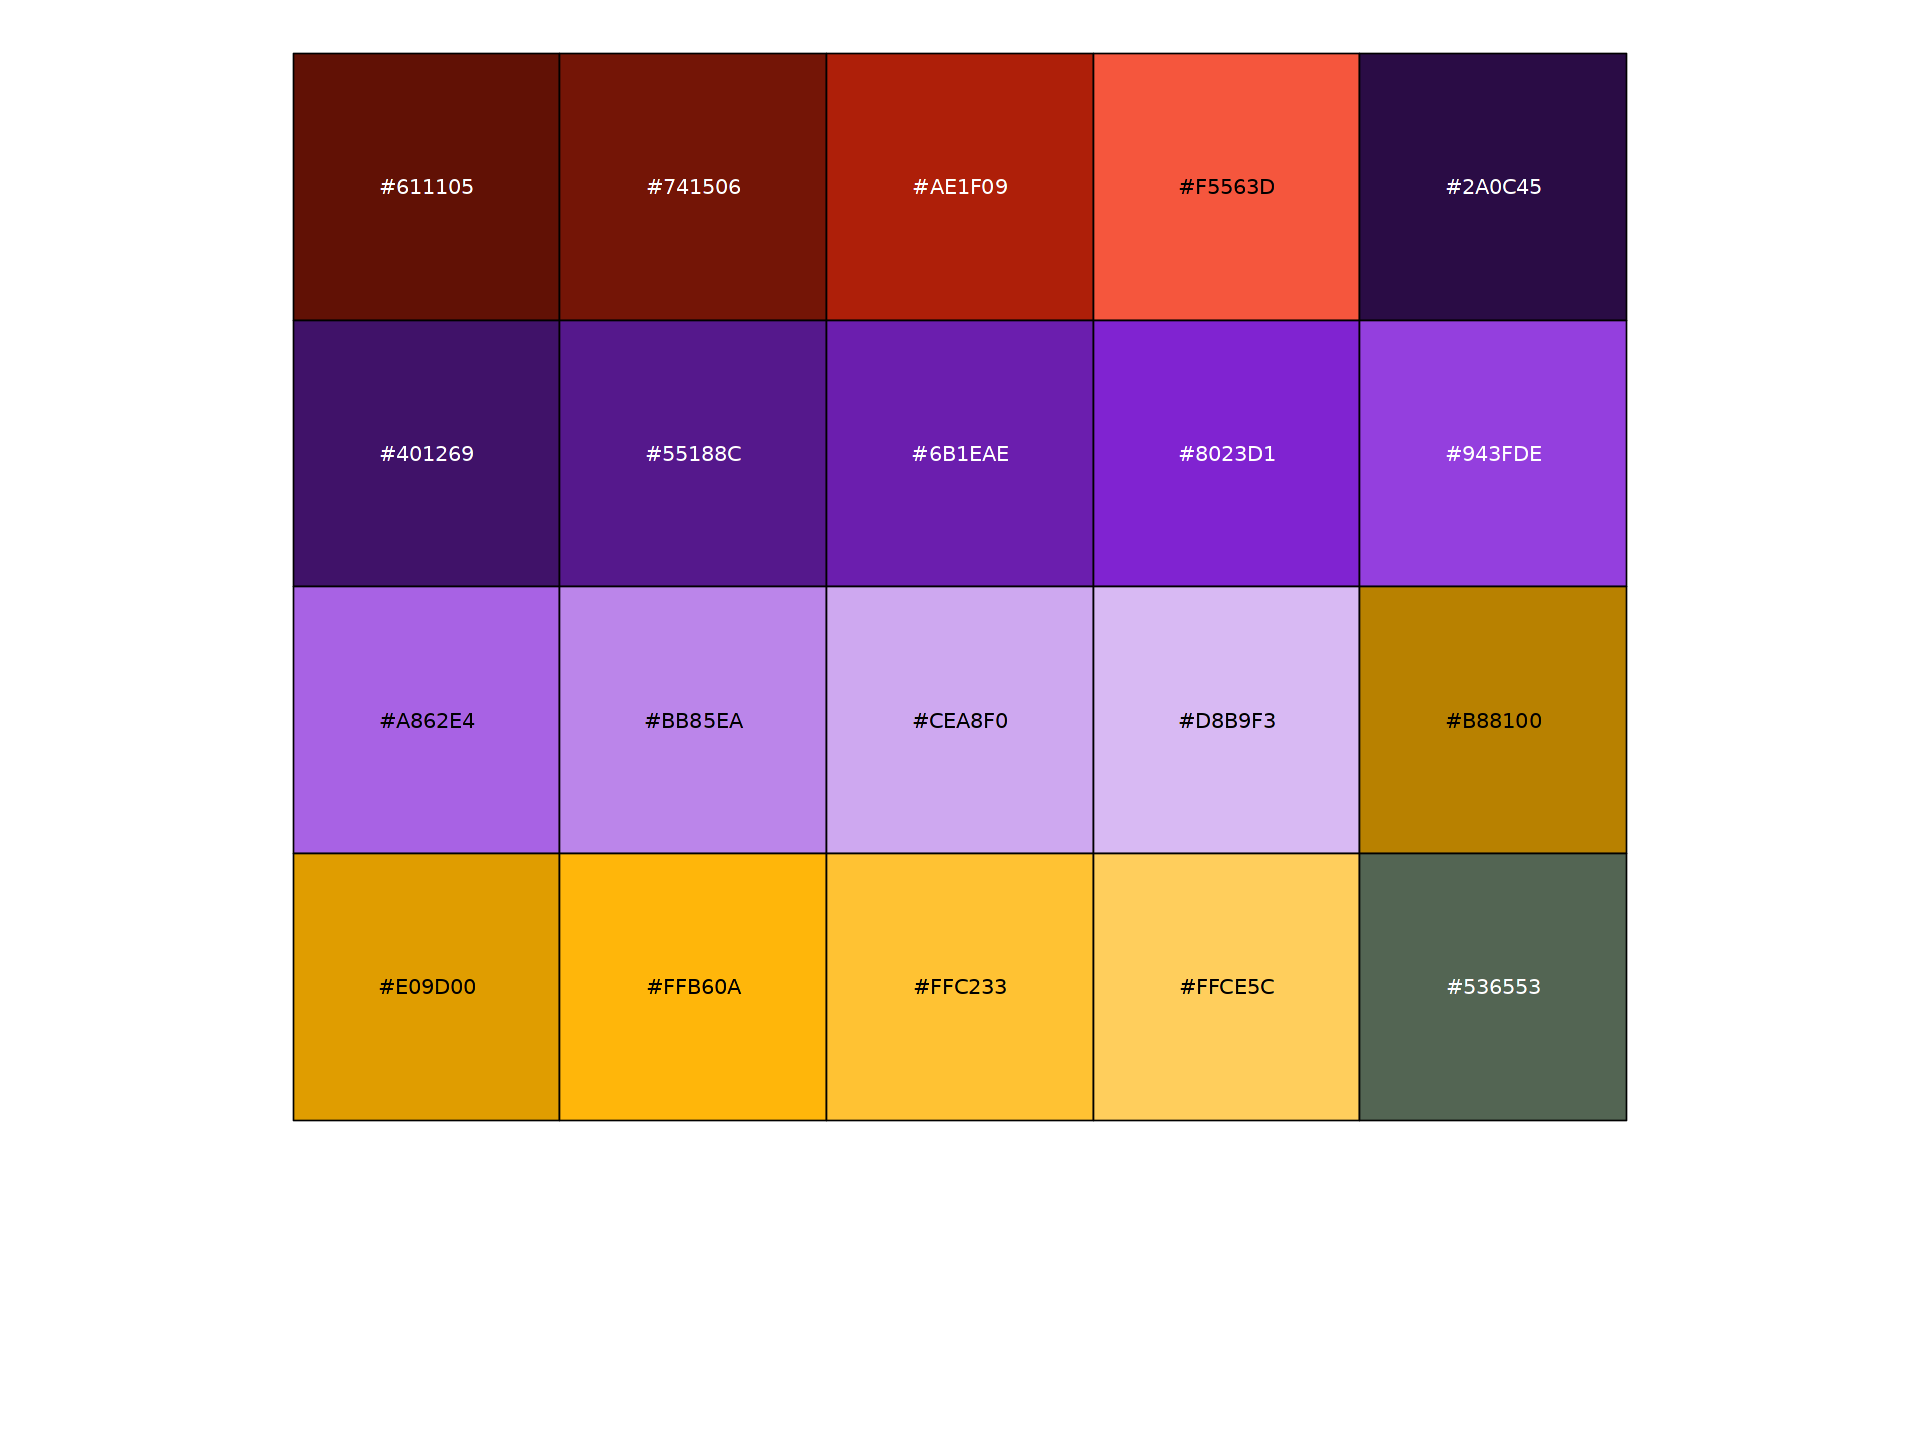

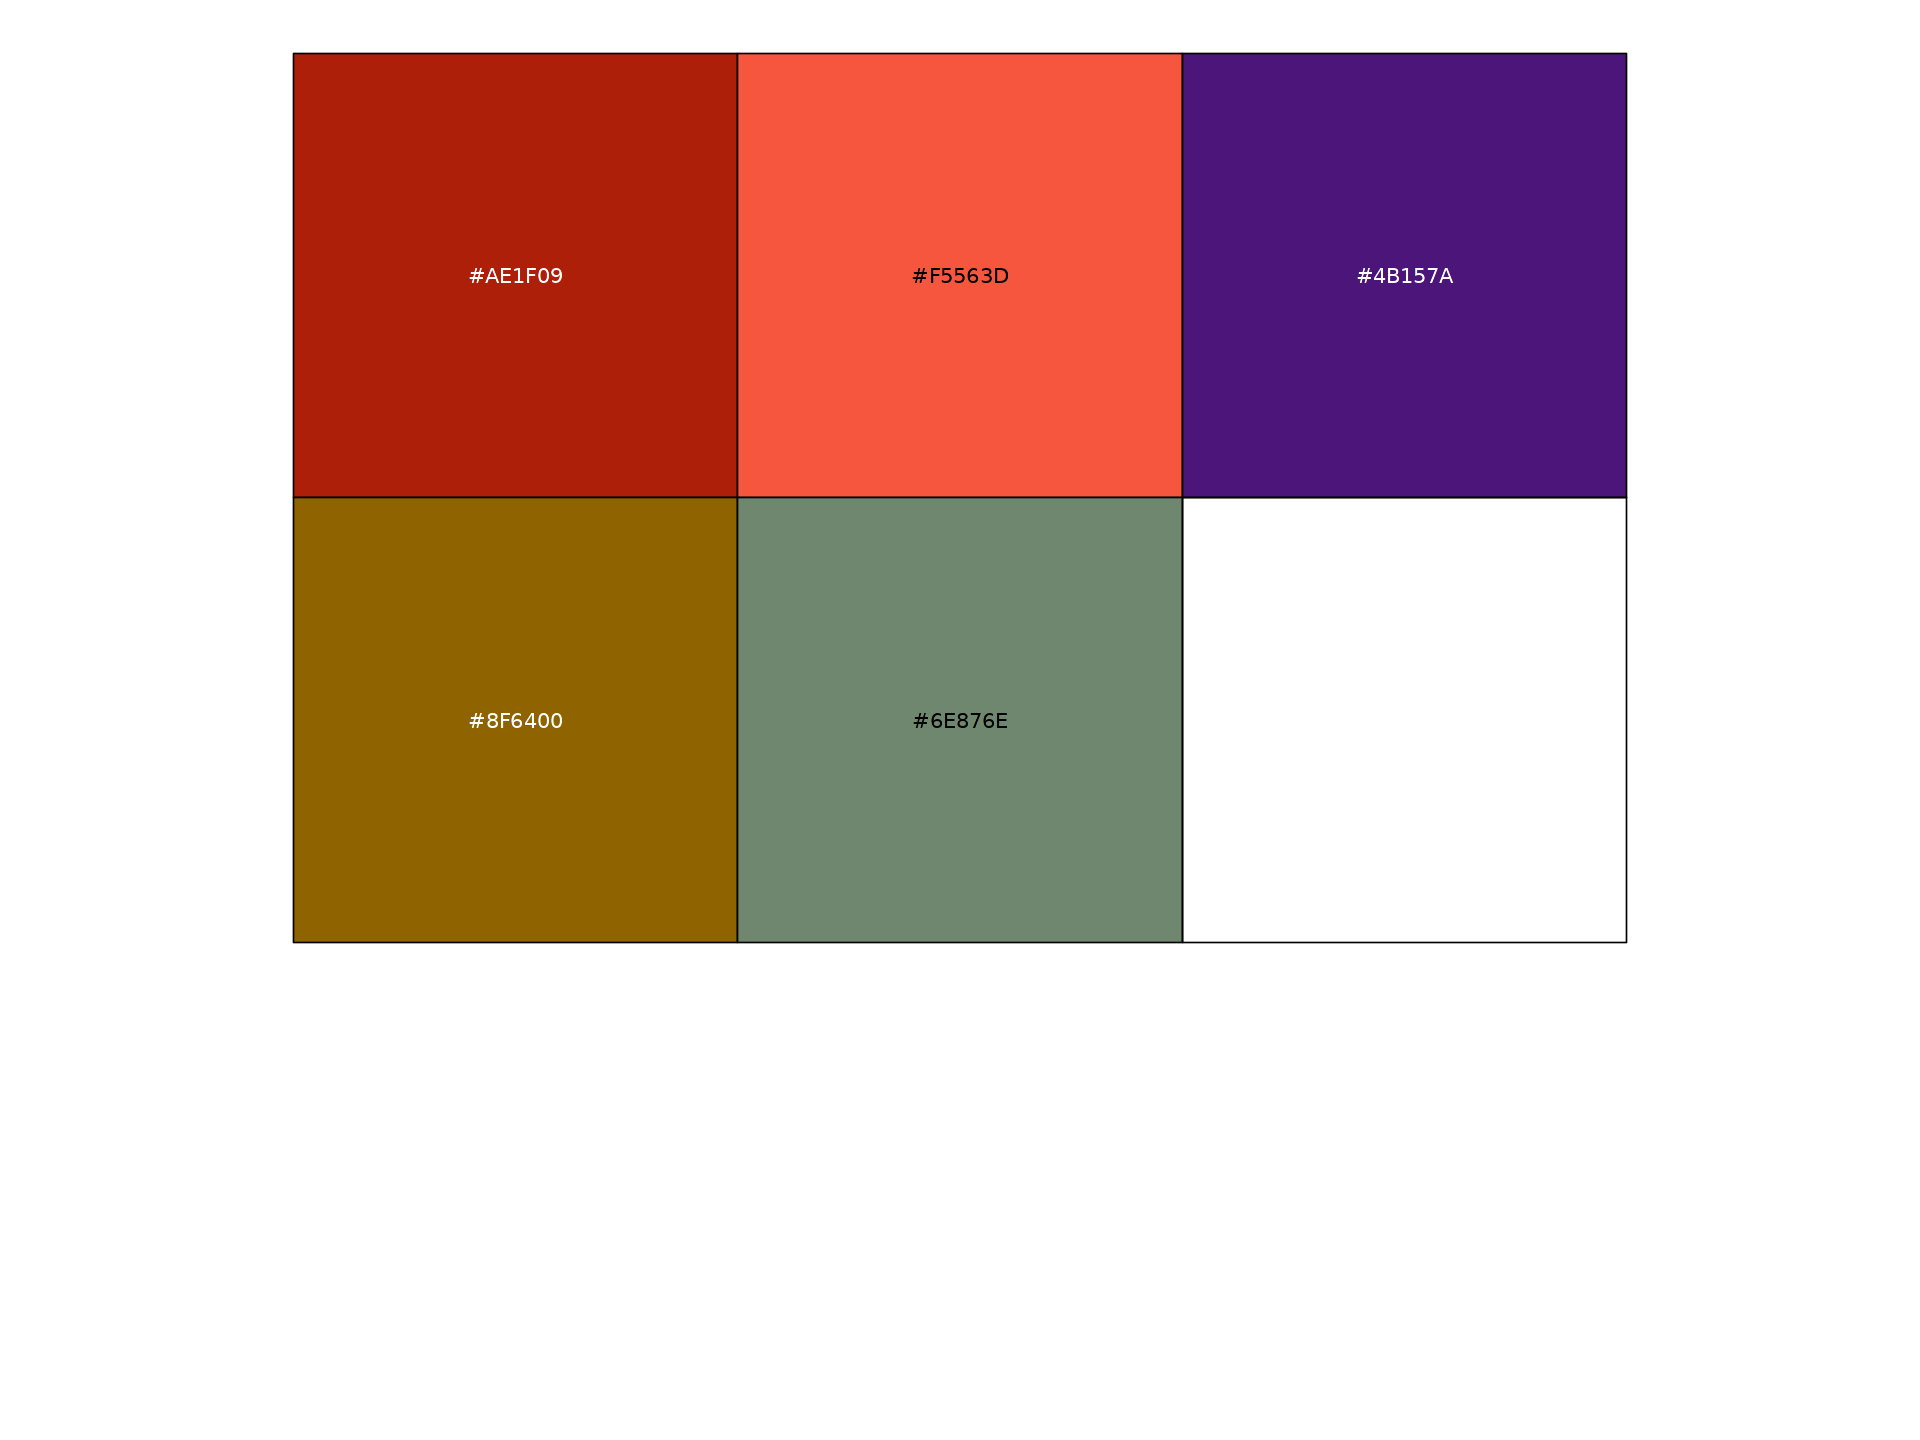

In [7]:
orig.ident_colors <- c("#2E382E", "#404F40", "#536553", "#657B65", "#789178", "#8FA38F", "#A5B6A5", "#D2DAD2", "#E9EDE9", 
                       "#7A5600", "#F5AB00", "#FFC233", "#FFD470", "#FFE7AD", "#FFF3D6",
                       "#AE1F09", "#E92A0C", "#F5563D", "#F88877", "#FDDDD8",
                       "#714947", "#97615E", "#B08482", "#C8A9A7", "#E0CECD", "#EFE7E6")
names(orig.ident_colors) <- c("EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3",
                              "Early1", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5",
                              "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5",
                              "Late1", "Late2", "Late3", "LateMale4", "LateFemale4", "Late5")

orig.ident_colors_contrast <- c("#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#2A75CB", "#5B1865", "#E54F6D",
                                "#97615E", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#2A75CB",
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485",
                                "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200")
names(orig.ident_colors_contrast) <- c("EarlyCtrl2", "EarlyCtrl3", "EarlyCtrl4", "EarlyCtrlMale5", "EarlyCtrlFemale5", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3",
                              "Early1", "EarlyFemale3", "EarlyMale3", "Early4", "EarlyMale5", "EarlyFemale5",
                              "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Peak5",
                              "Late1", "Late2", "Late3", "LateMale4", "LateFemale4", "Late5")

orig.ident_merge_colors <- c("#6E876E", "#F5AB00", "#E92A0C", "#97615E")
names(orig.ident_merge_colors) <- c("Ctrl", "Early", "Peak", "Late")

batch_colors <- c("#2A75CB", "#6E876E", "#F5AB00", "#E92A0C", "#97615E", "#98CE00", "#E54F6D")
names(batch_colors) <- c("B1", "B2", "B3", "B4", "B5", "B6", "B8")

model_colors <- c("#6E876E", "#E92A0C")
names(model_colors) <- c("Ctrl", "EAE")
show_col(model_colors)

duo_colors <- c("#E92A0C", "#2A75CB")
show_col(duo_colors)

sex_colors <- duo_colors
names(sex_colors) <- c("F", "M")

immune_colors <- c("#A9DFBF", "#FF000080")
names(immune_colors) <- c("NonImmune", "Immune")
#show_col(immune_colors)

immuneAll_colors <- c("lightgrey", "blue", "orange", "red")
names(immuneAll_colors) <- c("None", "RNA", "GenePromAcc", "Both")
#show_col(immuneAll_colors)

doublets_colors <- c("#A9DFBF", "#FF000080")
names(doublets_colors) <- c("Singlet", "Doublet")
#show_col(doublets_colors)

debris_colors <- duo_colors
names(debris_colors) <- c("Percoll", "Debris")

date_tissue_coll_colors <- scales::viridis_pal()(17)
names(date_tissue_coll_colors) <- c('2021_04_30','2021_05_03','2021_05_31','2021_09_30','2021_10_06','2021_11_26','2022_03_09','2022_03_10','2022_08_03','2022_08_24','2023_01_23','2023_02_15','2023_03_22','2023_06_15','2023_06_14','2022_05_12','2022_05_16')
#show_col(date_tissue_coll_colors)

date_exp_colors <- scales::viridis_pal()(7)
names(date_exp_colors) <- c('2021_04_20','2021_09_22','2021_11_17','2022_01_31','2022_07_18','2023_01_09','2023_06_05')
#show_col(date_exp_colors)

EAE_score_mean_colors <- scales::viridis_pal()(7)
names(EAE_score_mean_colors) <- c(0,0.5,2,2.25,2.33,2.5,3)
#show_col(EAE_score_mean_colors)

cellType_OL_colors <- c("#611105", "#741506", "#AE1F09", "#F5563D", "#2A0C45","#401269","#55188C","#6B1EAE","#8023D1","#943FDE","#A862E4","#BB85EA","#CEA8F0","#D8B9F3","#B88100","#E09D00","#FFB60A","#FFC233","#FFCE5C","#536553")
names(cellType_OL_colors) <- c("OPC-α", "OPC-β", "OPC-γ", "COP", "MOL56-α","MOL56-β","MOL56-γ","MOL56-δ","MOL56-ε","MOL56-ζ","MOL56-η","MOL56-θ","MOL56-ι","MOL56-κ","MOL2-α","MOL2-β","MOL2-γ","MOL2-δ","MOL2-ε","MOL1")
show_col(cellType_OL_colors)

cellType_OL_merge_colors <- c("#AE1F09","#F5563D","#4B157A","#8F6400", "#6E876E")
names(cellType_OL_merge_colors) <- c("OPC", "COP", "MOL56", "MOL2", "MOL1")
show_col(cellType_OL_merge_colors)

In [8]:
#Set up ATAC annotation
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose =FALSE)
ucsc.levels <- str_replace(string=paste("chr",seqlevels(annotations),sep=""), pattern="chrMT", replacement="chrM")
seqlevels(annotations) <- ucsc.levels
genome(annotations) <- "mm10"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

## 2. Loading datasets

In [9]:
MORNAATACCOL <- readRDS(paste0(OS_path_outputs, "MORNAATACCOL_DORCs.rds"))

## 3. OL dynamics

### 3.1 Temporal time course (DORCs)

In [15]:
DVDORC <- readRDS(paste0(OS_path_outputs, "DVDORC_OL.rds"))

#### 3.1.1 MOL56

In [16]:
cluster_choice = "MOL56"

In [17]:
gene_list <- unique(unlist(DVDORC[[cluster_choice]]))

In [18]:
tmp <- subset(MORNAATACCOL, subset = cellType_OL_merge == cluster_choice)

In [19]:
table_sample_low <- table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,] <= 5]
table_sample_low

sample_keep <- names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)]

named integer(0)

In [20]:
#Remove sample with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident %in% (names(table_sample_low)),])
tmp <- subset(tmp, cells=keepcells)

In [21]:
table_group_low <-table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,] <= 30]
table_group_low

group_keep <- names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)]

named integer(0)

In [22]:
#Remove timepoint with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident_merge %in% (names(table_group_low)),])
tmp <- subset(tmp, cells=keepcells)

In [23]:
tmp$orig.ident <- factor(x = tmp$orig.ident, levels = names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)])
tmp$orig.ident_merge <- factor(x = tmp$orig.ident_merge, levels = names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)])

In [24]:
DefaultAssay(tmp) <- "GenePromAcc"

In [25]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


In [26]:
DefaultAssay(tmp) <- "RNA"

In [27]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


##### 3.1.1.1 Heatmaps

In [28]:
Idents(object = tmp) <- "orig.ident_merge"

In [29]:
sample_names <- levels(tmp$orig.ident_merge)

In [30]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [31]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

Warning message:
"The `slot` argument of `AverageExpression()` is deprecated as of Seurat 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>."
As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [32]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [33]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [34]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [35]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [36]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [37]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [38]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [39]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [40]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [42]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [43]:
saveRDS(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".rds"))

In [44]:
write.csv(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".csv"), row.names=TRUE)
write.csv(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".csv"), row.names=TRUE)
write.csv(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".csv"), row.names=TRUE)

In [45]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [46]:
tmp_mat <- matrix
colnames(tmp_mat) <- c("A","B","C","D")
correct_order <- unlist(order_heatmap_genes(as.data.frame(tmp_mat)))

In [47]:
matrix <- matrix[correct_order,]

In [48]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [49]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

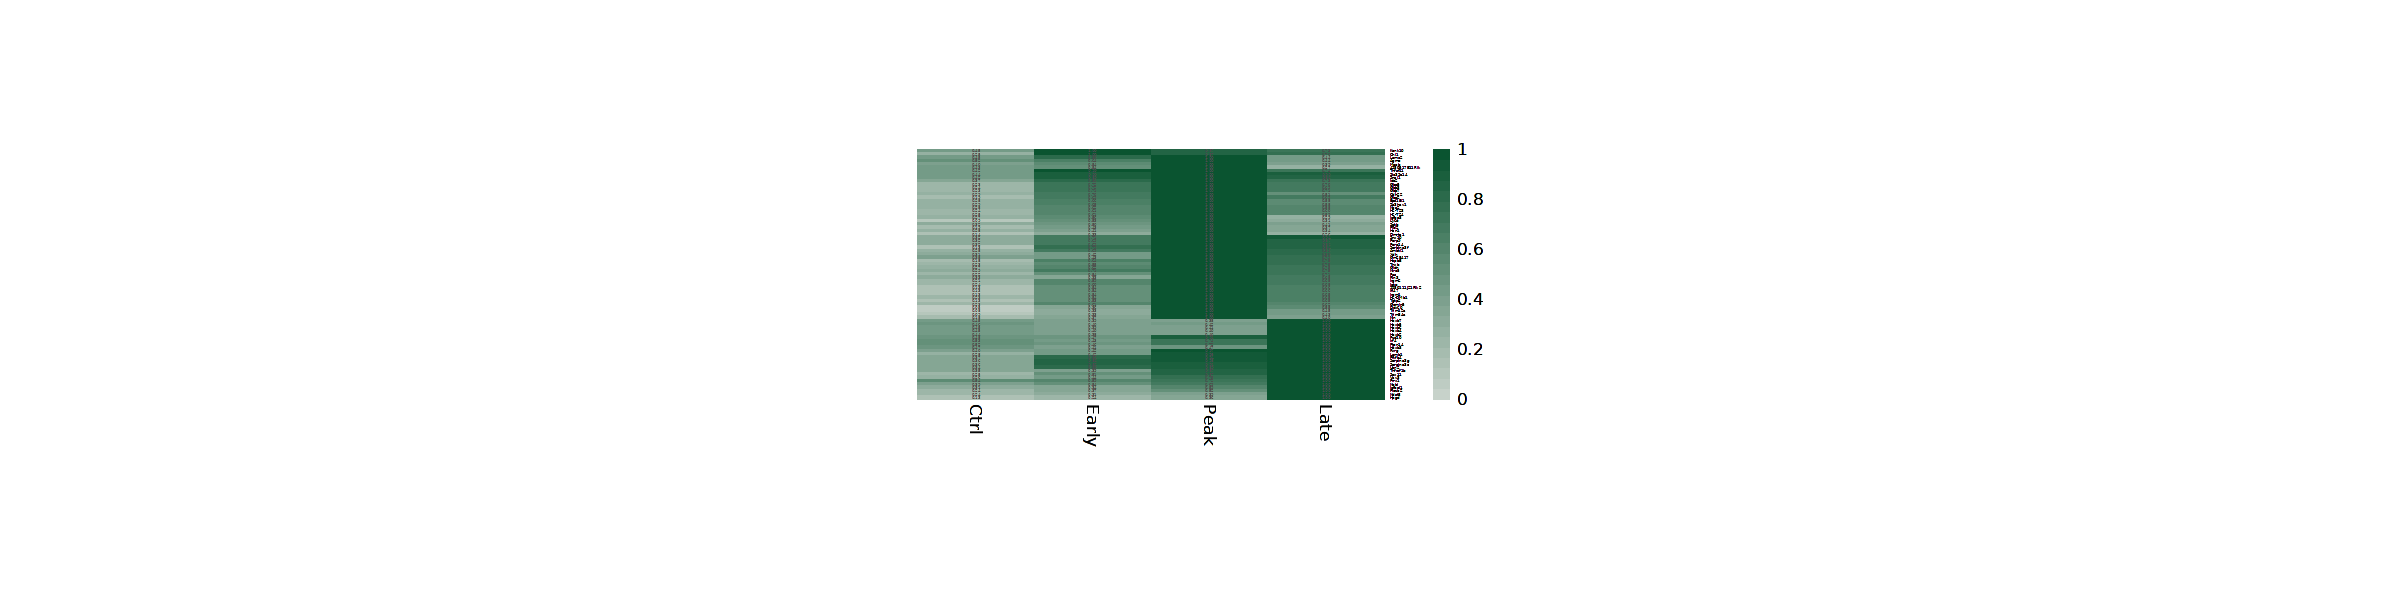

In [50]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [51]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [52]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [53]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [54]:
matrix <- tmp_sample_markers_DORCs_mean

In [55]:
matrix <- matrix[correct_order,]

In [56]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

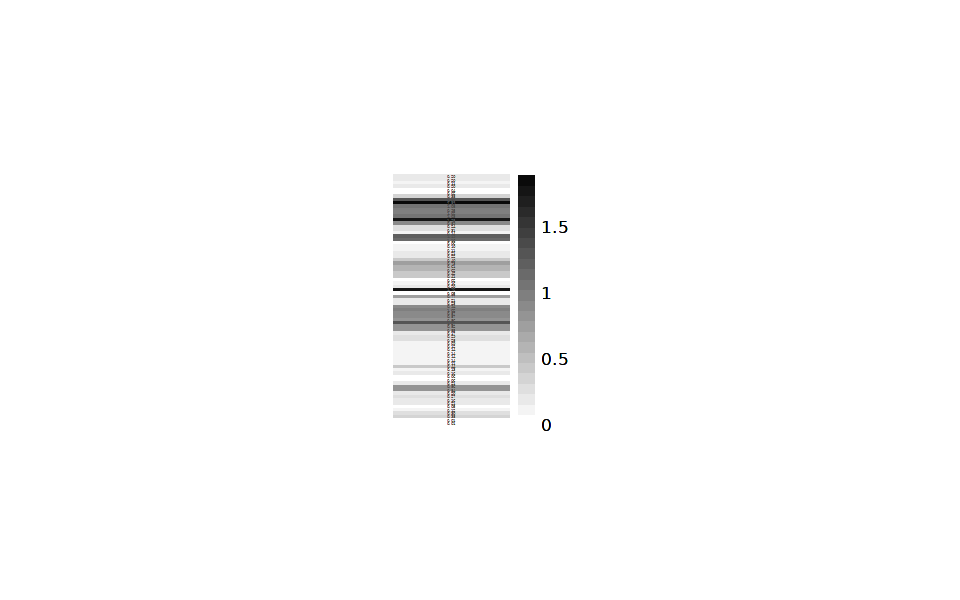

In [57]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [58]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [59]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [60]:
matrix <- matrix[correct_order,]

In [61]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

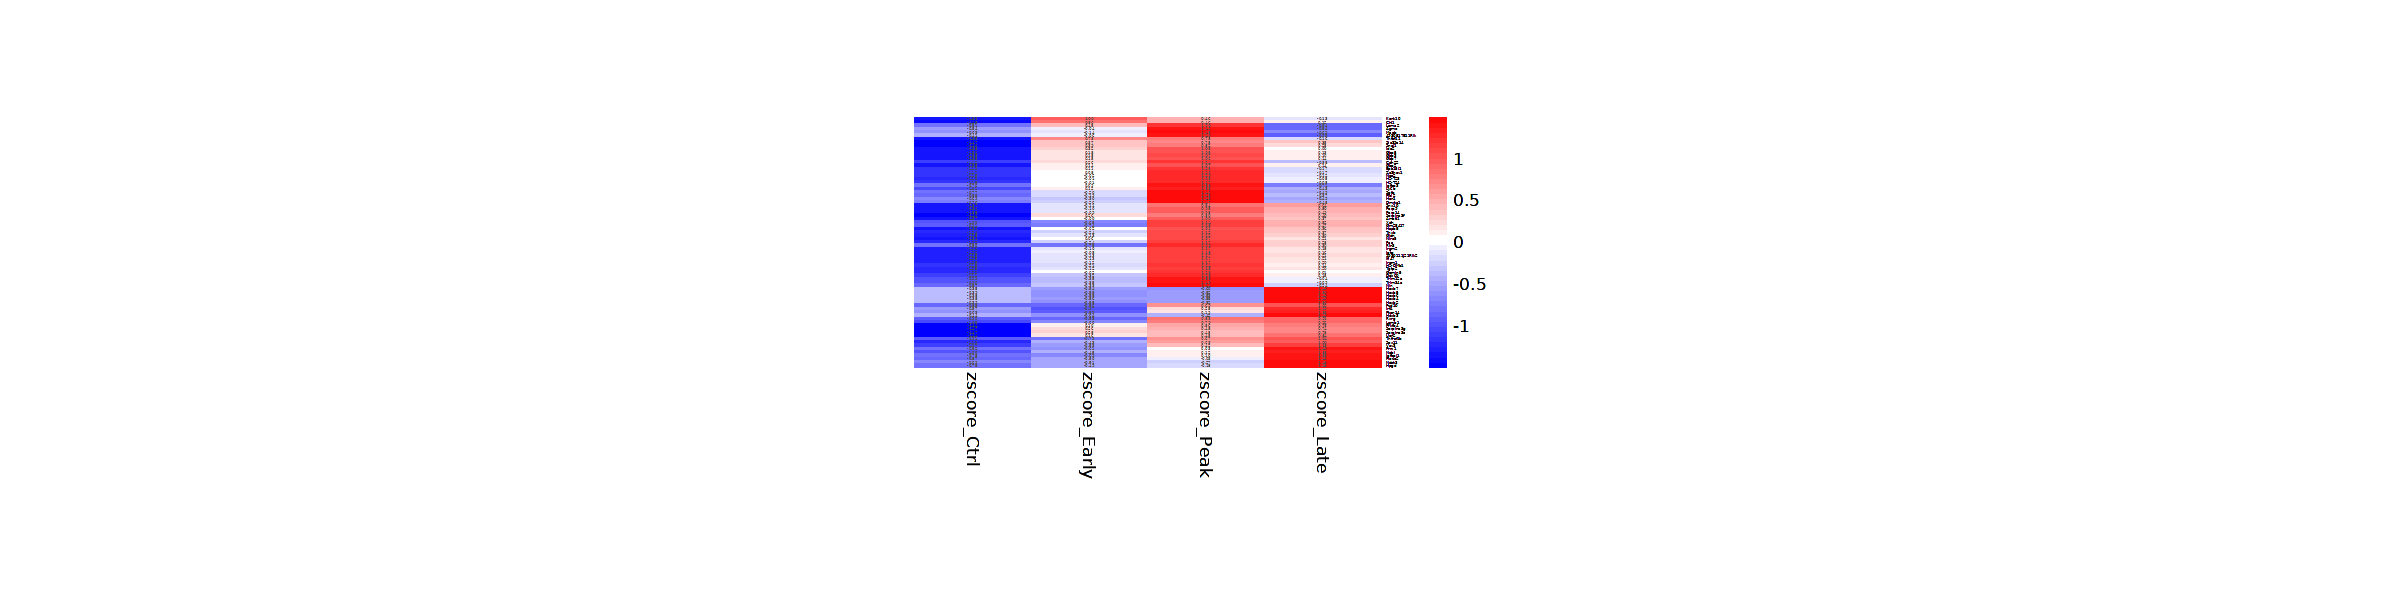

In [62]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [63]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [64]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [65]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [66]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [67]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [68]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

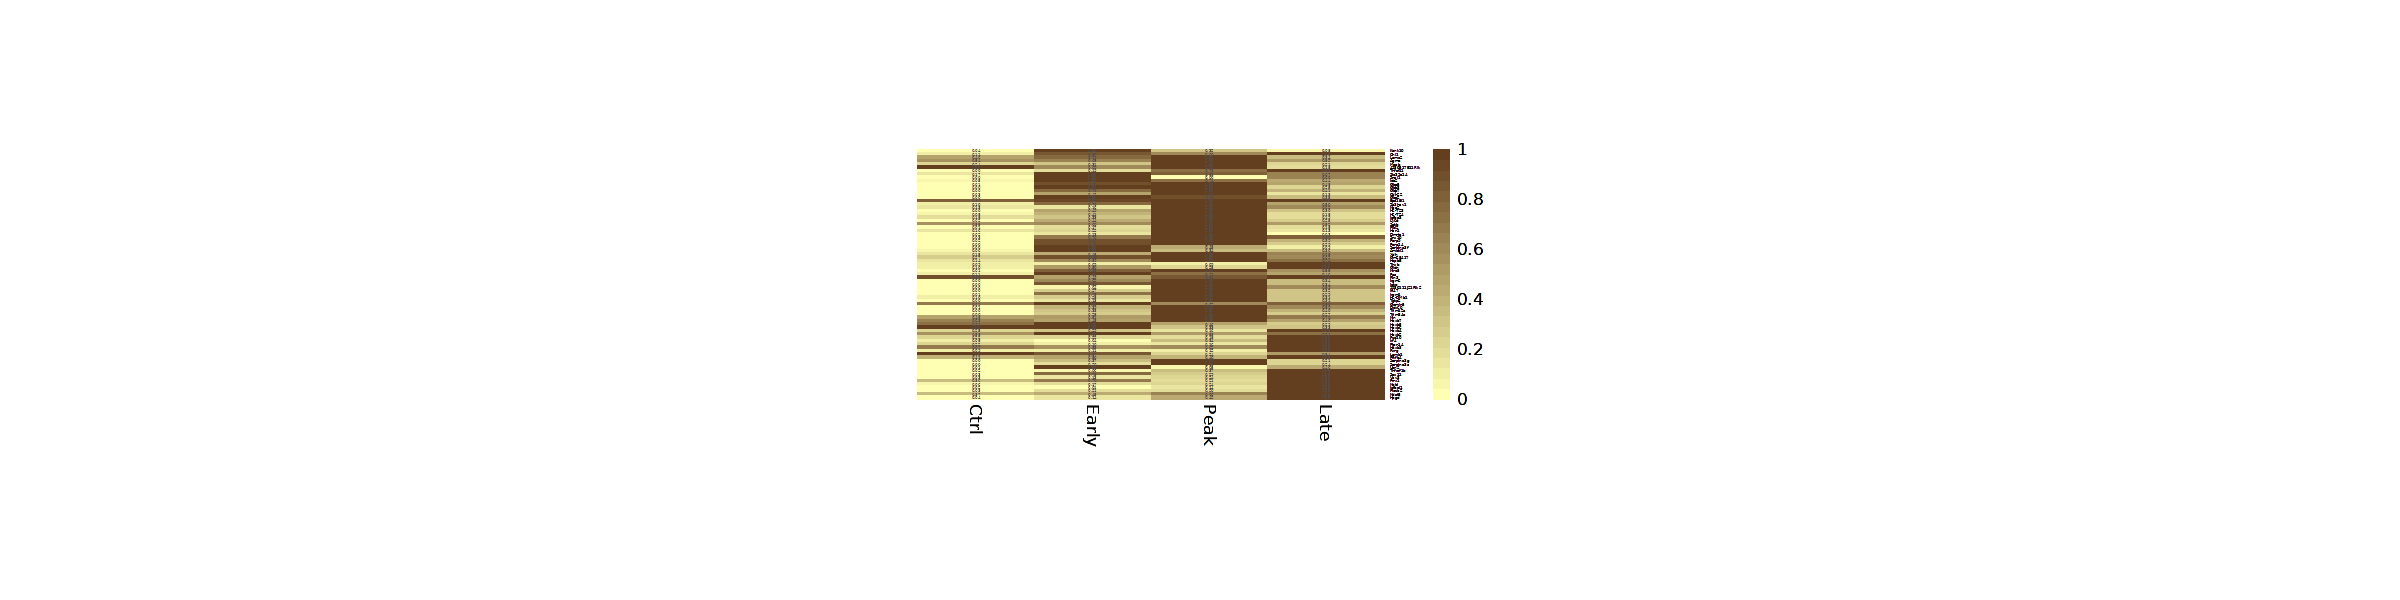

In [69]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [70]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [71]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [72]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [73]:
matrix <- tmp_sample_markers_RNA_mean

In [74]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [75]:
matrix <- matrix[correct_order,]

In [76]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

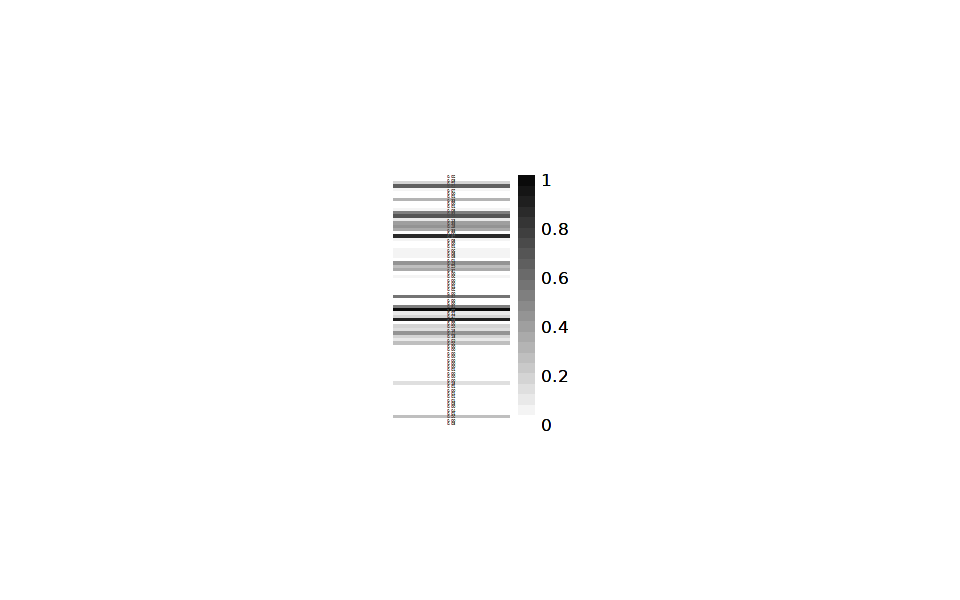

In [77]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [78]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [79]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [80]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [81]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [82]:
matrix <- matrix[correct_order,]

In [83]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

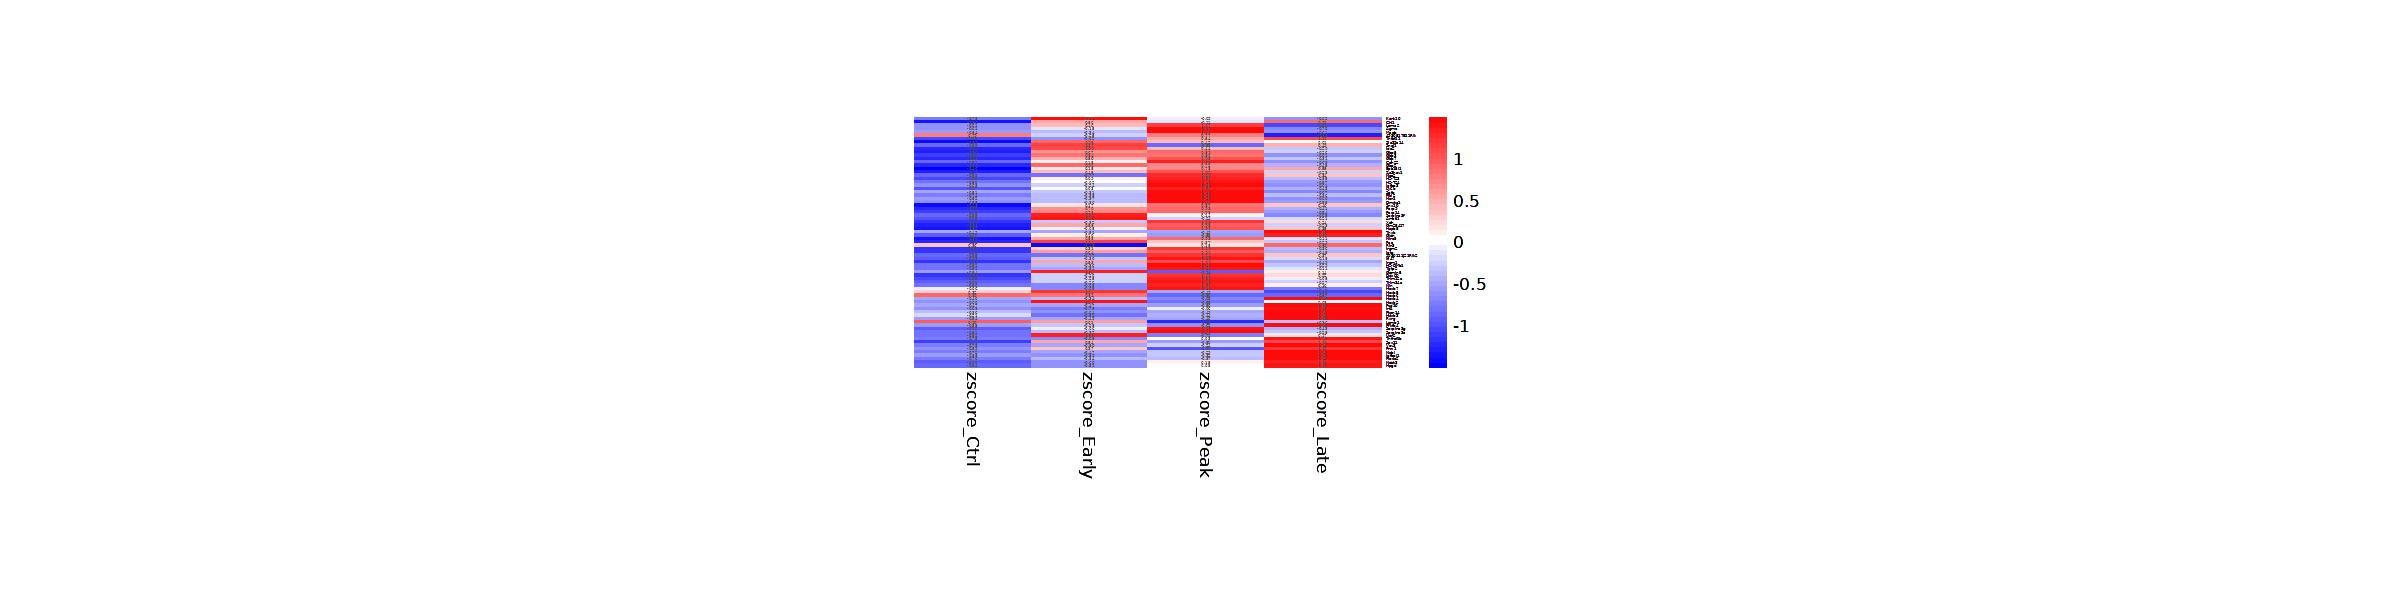

In [84]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [85]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [86]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [87]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [88]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [89]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [90]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

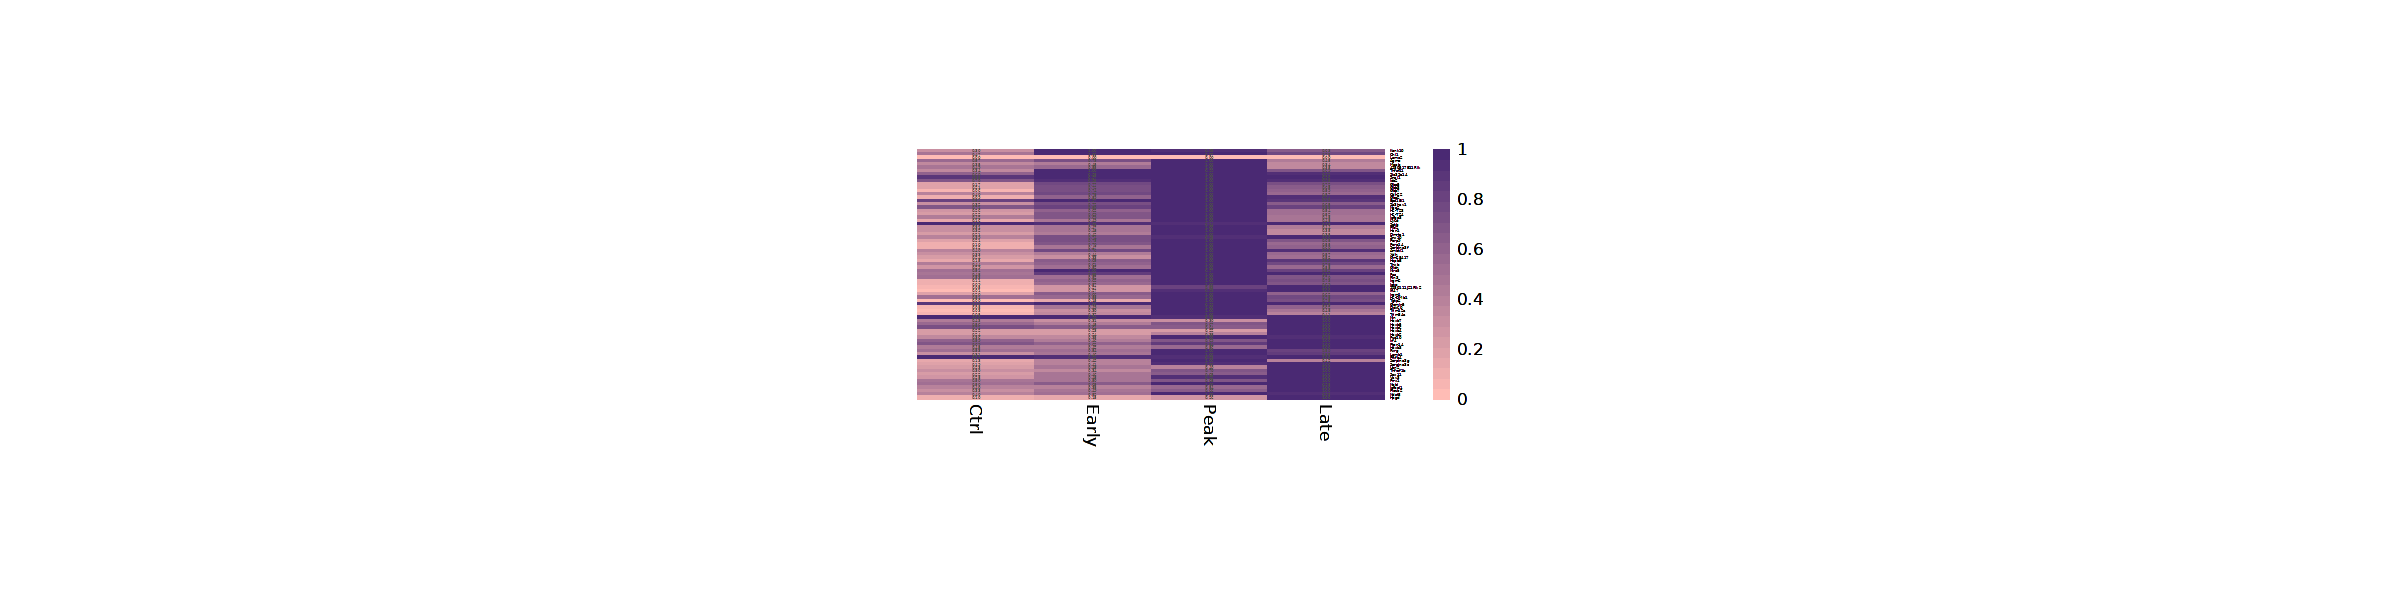

In [91]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [92]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [93]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [94]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [95]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [96]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [97]:
matrix <- matrix[correct_order,]

In [98]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

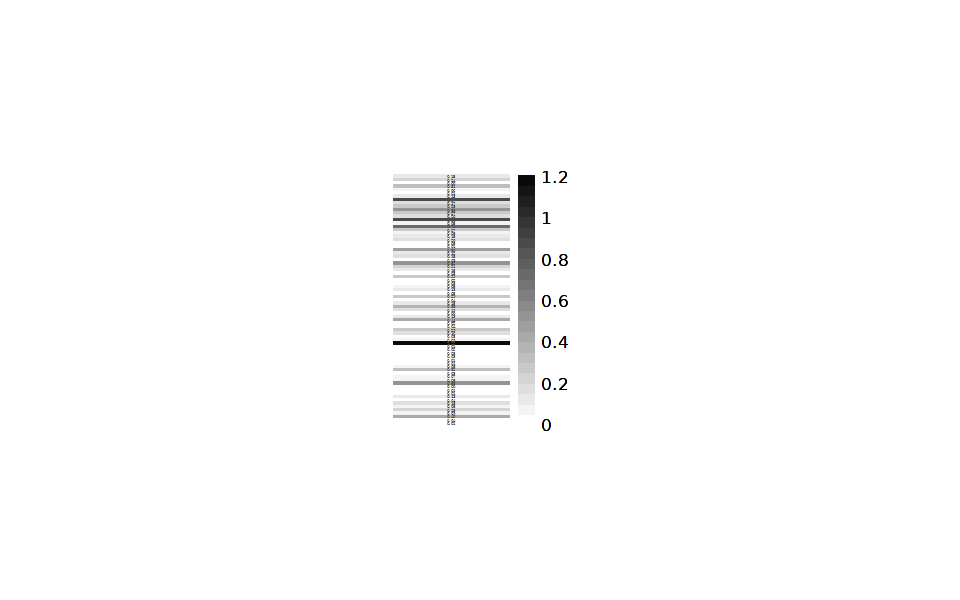

In [99]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [100]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [101]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [102]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [103]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [104]:
matrix <- matrix[correct_order,]

In [105]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

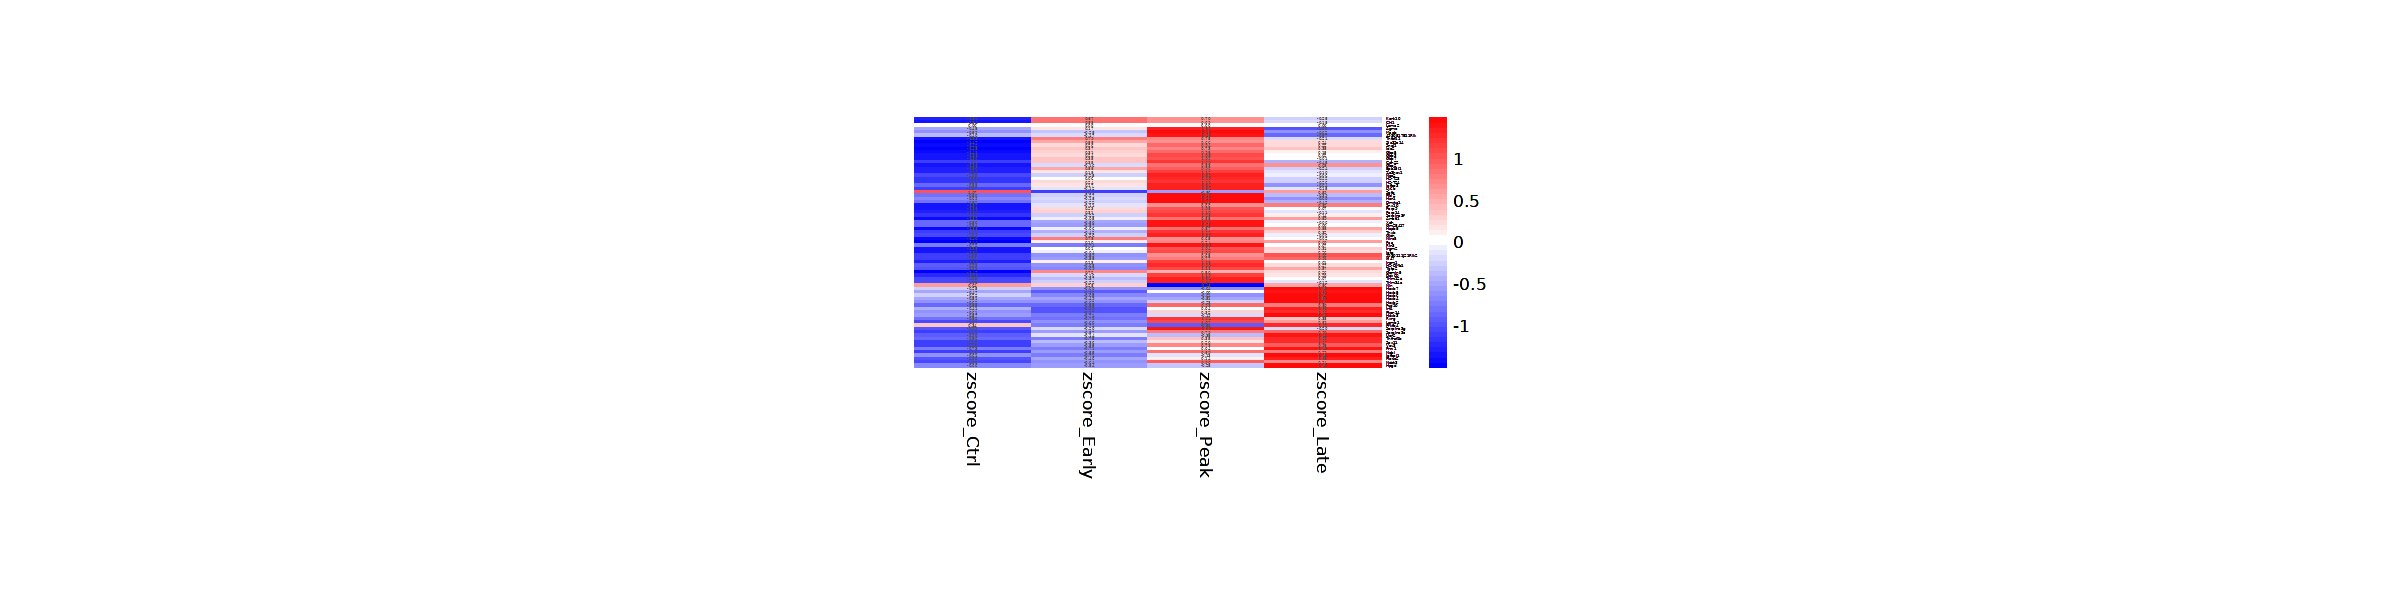

In [106]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [107]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [108]:
Idents(object = tmp) <- "orig.ident"

In [109]:
sample_names <- levels(tmp$orig.ident)

In [110]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [111]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [112]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [113]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [114]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [115]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [116]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [117]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [118]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [119]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [120]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [121]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [122]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [123]:
matrix <- matrix[correct_order,]

In [124]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [125]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

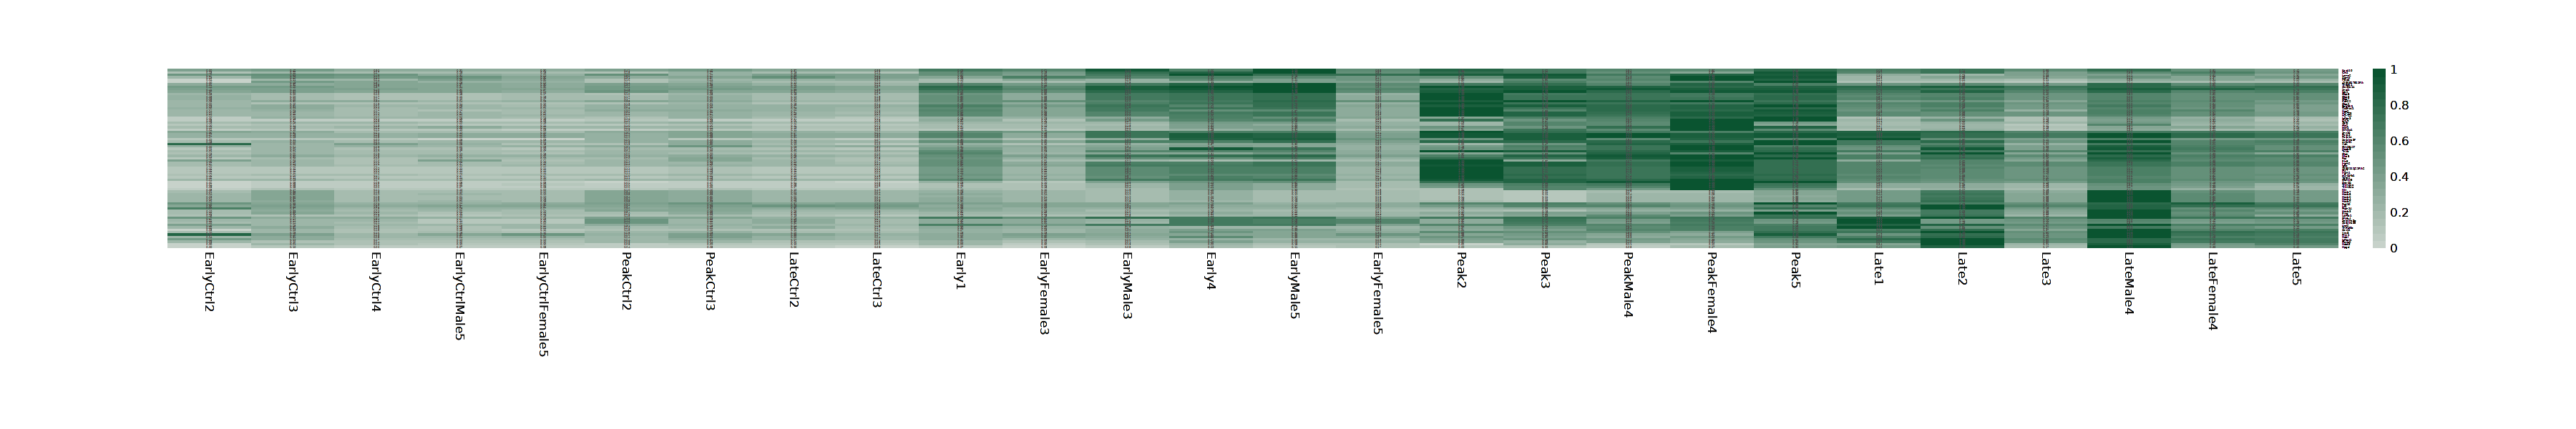

In [126]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [127]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [128]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [129]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [130]:
matrix <- tmp_sample_markers_DORCs_mean

In [131]:
matrix <- matrix[correct_order,]

In [132]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

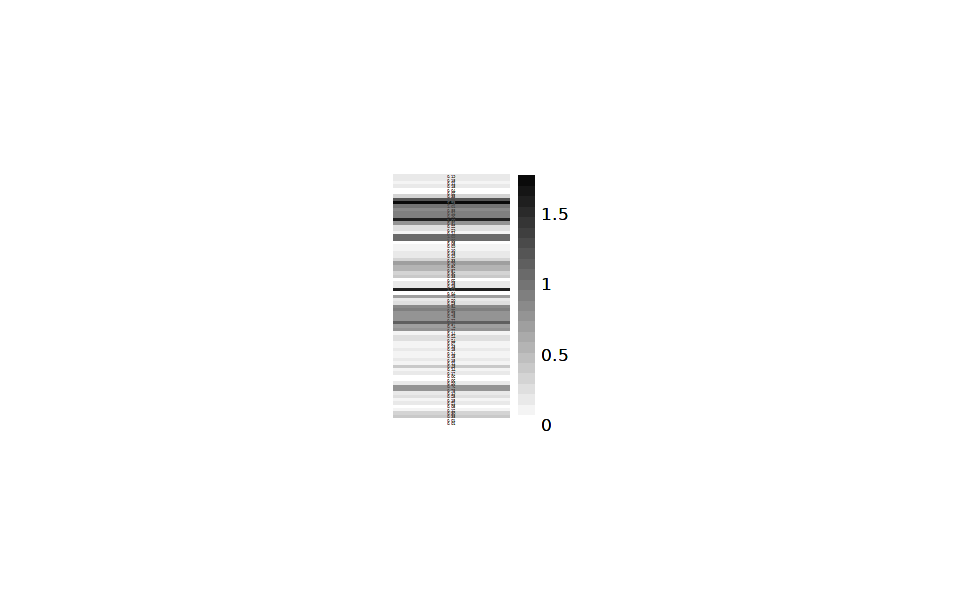

In [133]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [134]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [135]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [136]:
matrix <- matrix[correct_order,]

In [137]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

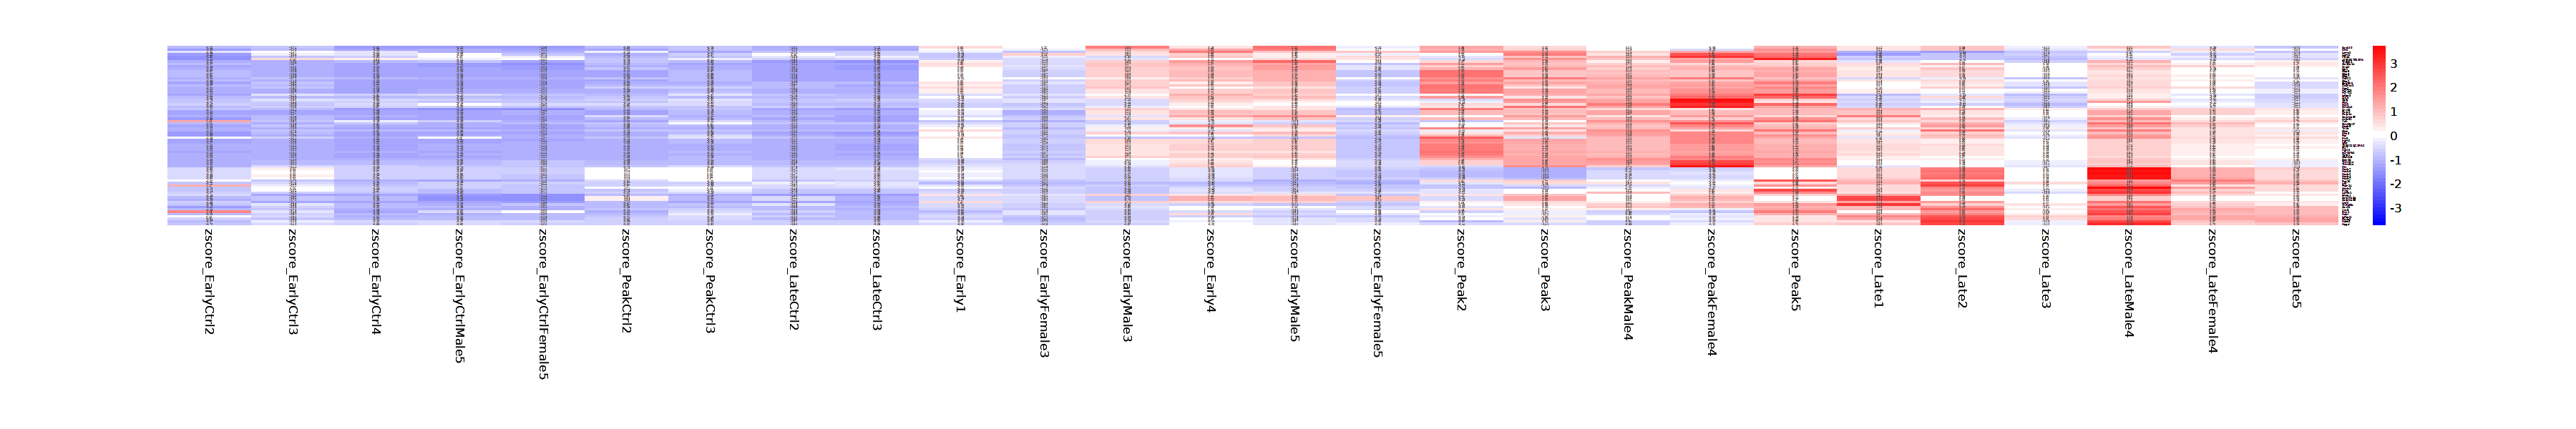

In [138]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [139]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [140]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [141]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [142]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [143]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [144]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

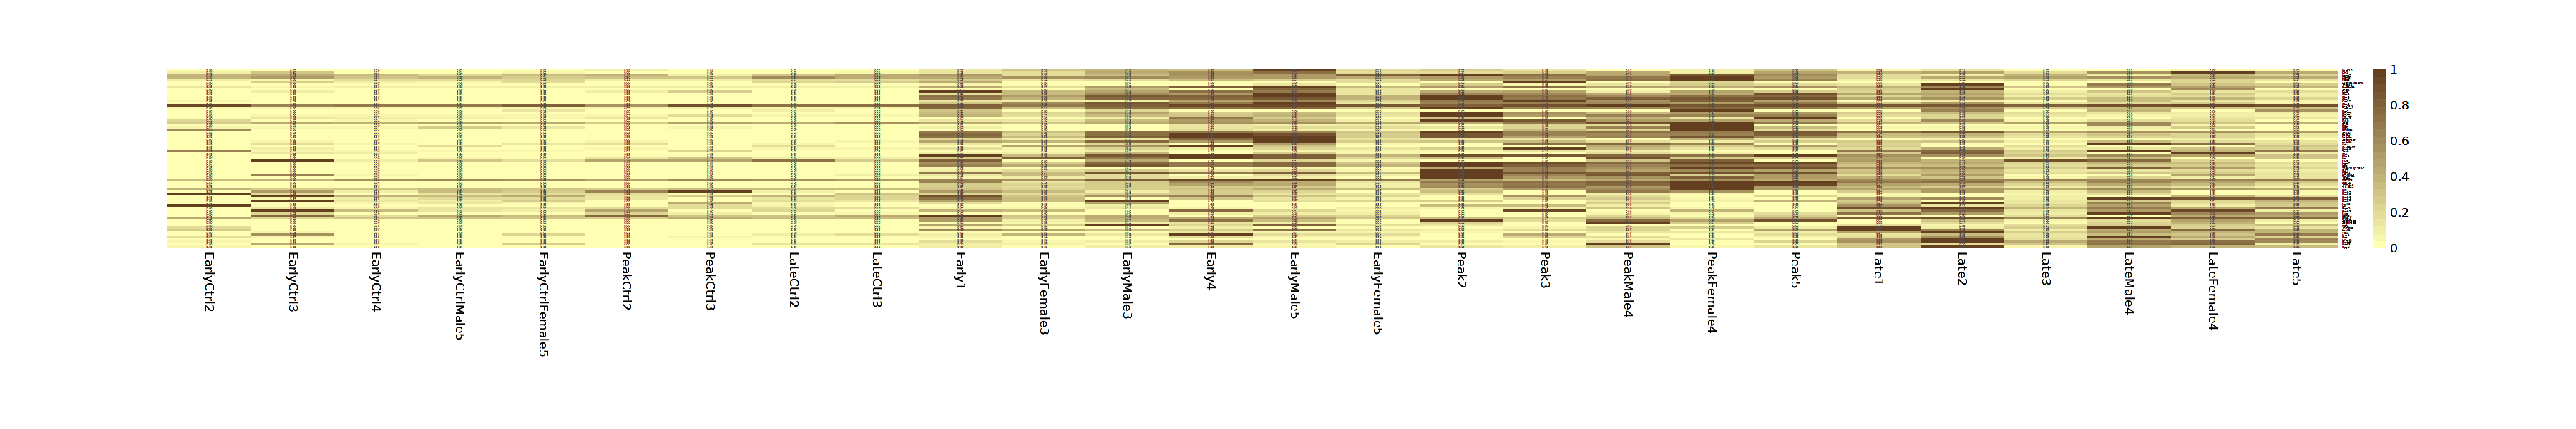

In [145]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [146]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [147]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [148]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [149]:
matrix <- tmp_sample_markers_RNA_mean

In [150]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [151]:
matrix <- matrix[correct_order,]

In [152]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

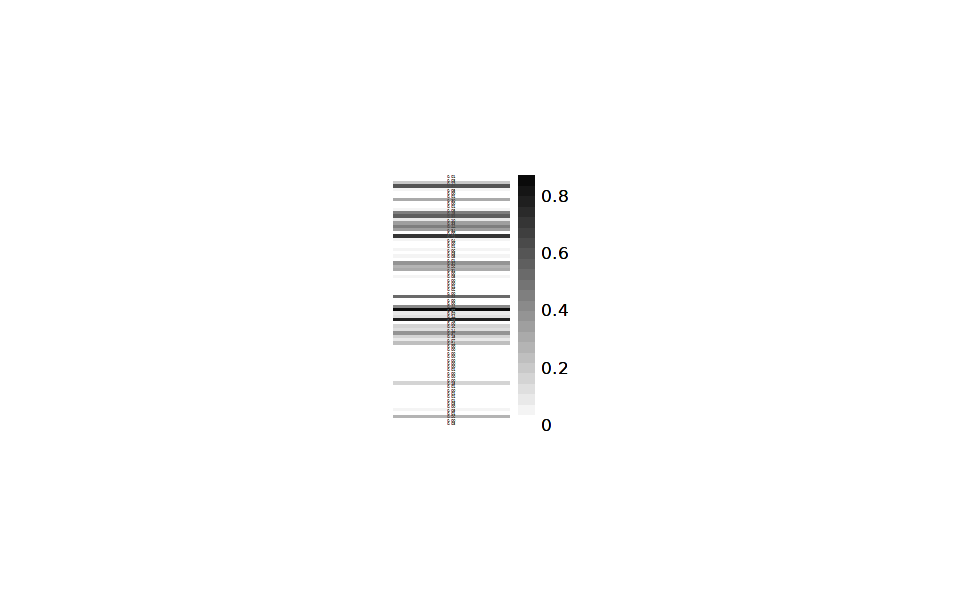

In [153]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [154]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [155]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [156]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [157]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [158]:
matrix <- matrix[correct_order,]

In [159]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

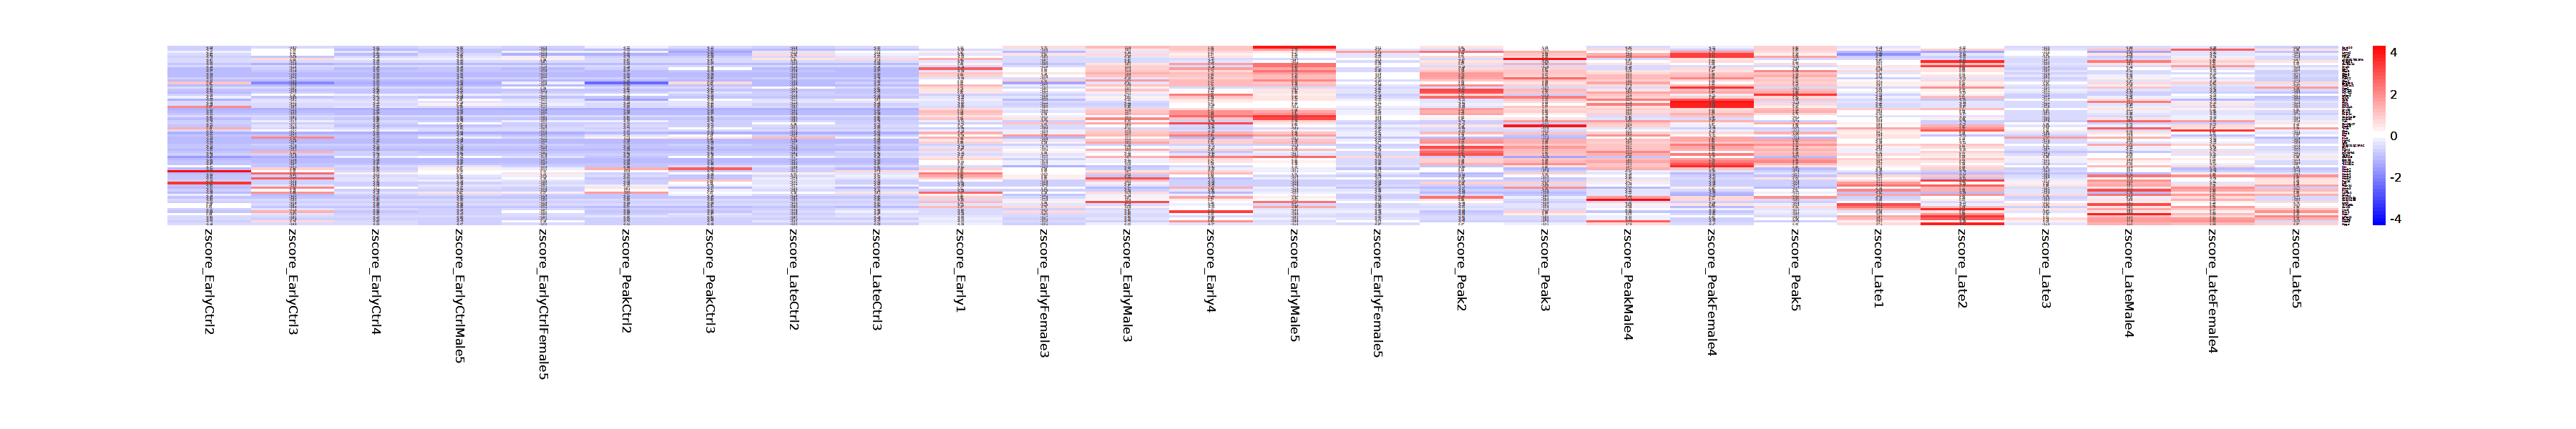

In [160]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [161]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_zscore.pdf"), width=30, height=plot_height)

png 
  2

In [162]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [163]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [164]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [165]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [166]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

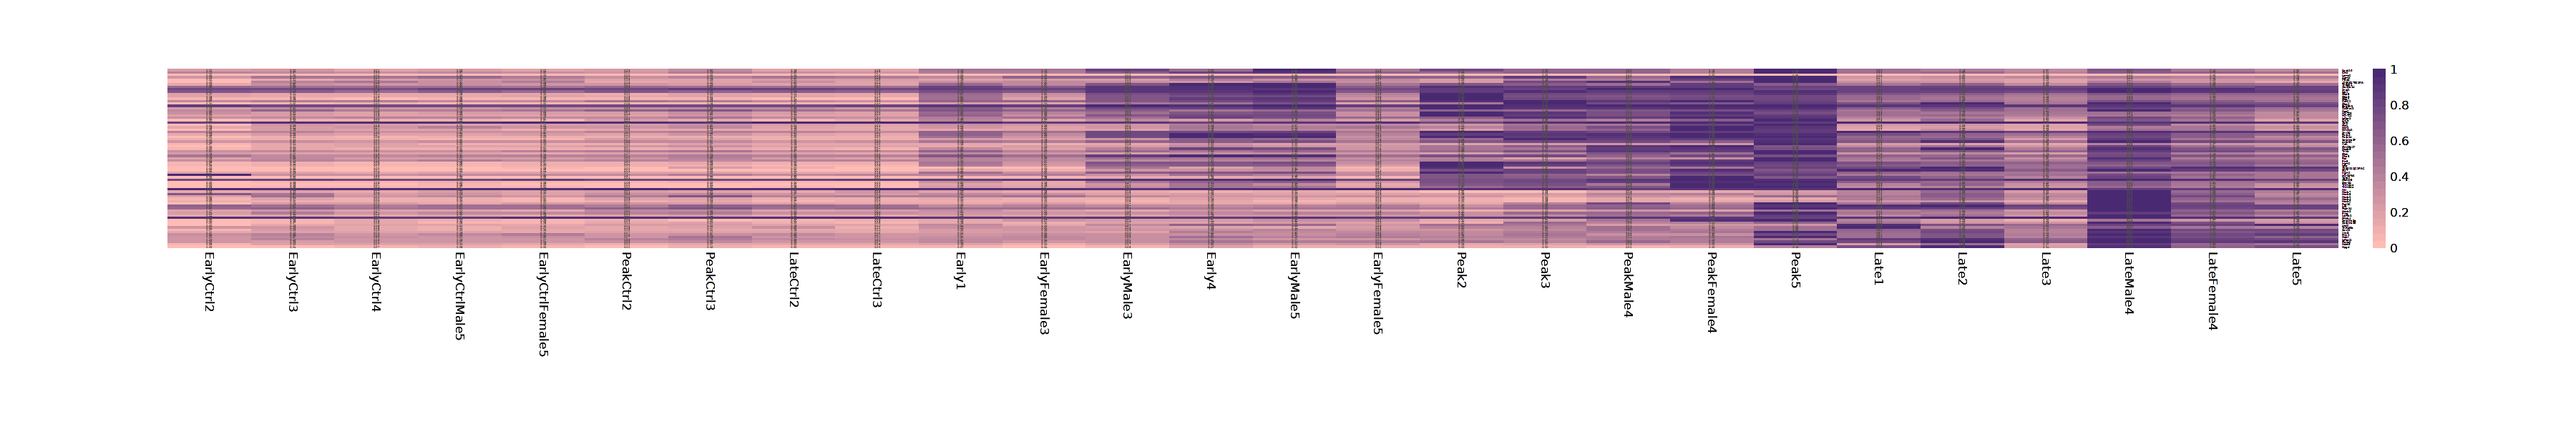

In [167]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [168]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [169]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [170]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [171]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [172]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [173]:
matrix <- matrix[correct_order,]

In [174]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

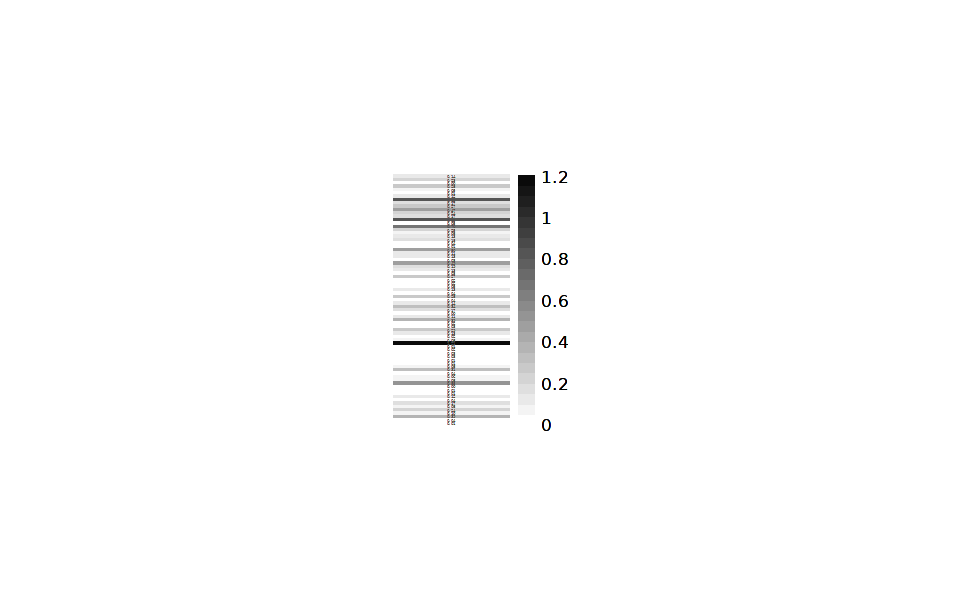

In [175]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [176]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [177]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [178]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [179]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [180]:
matrix <- matrix[correct_order,]

In [181]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

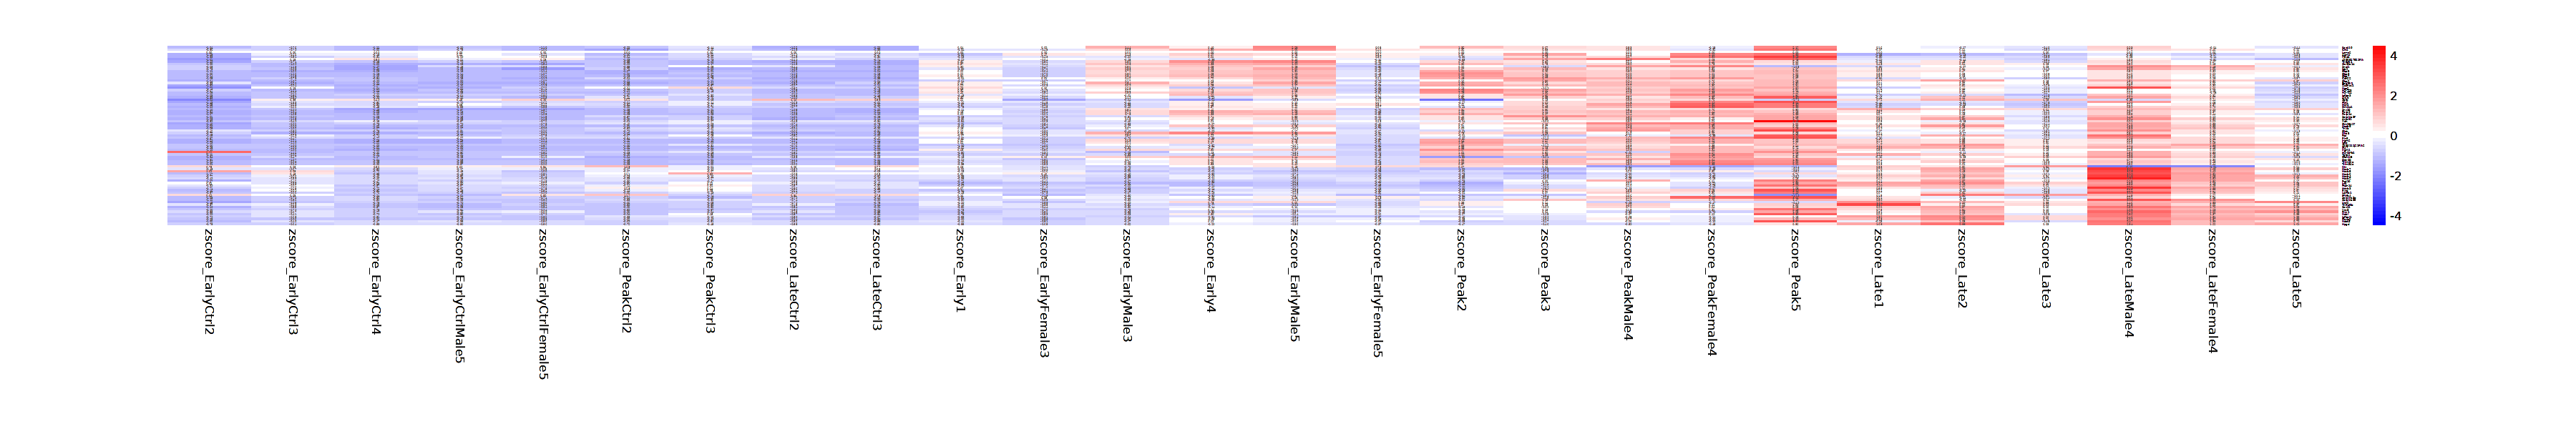

In [182]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [183]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

##### 3.1.1.2 Module dynamics

In [184]:
Idents(object = tmp) <- "orig.ident_merge"

In [185]:
sample_names <- levels(tmp$orig.ident_merge)

In [186]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [187]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [188]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [189]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [190]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [191]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [192]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [193]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [194]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [195]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [196]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [197]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [198]:
tmp_sample_markers_DORCs_scaled <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [199]:
tmp_sample_markers_RNA_sub_scaled <- tmp_sample_markers_RNA_sub/do.call(pmax, tmp_sample_markers_RNA_sub)

In [200]:
tmp_sample_markers_GenePromAcc_sub_scaled <- tmp_sample_markers_GenePromAcc_sub/do.call(pmax, tmp_sample_markers_GenePromAcc_sub)

###### Category 1

In [201]:
highest_cat <- "Ctrl"

In [202]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [203]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [204]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [205]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [206]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [207]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


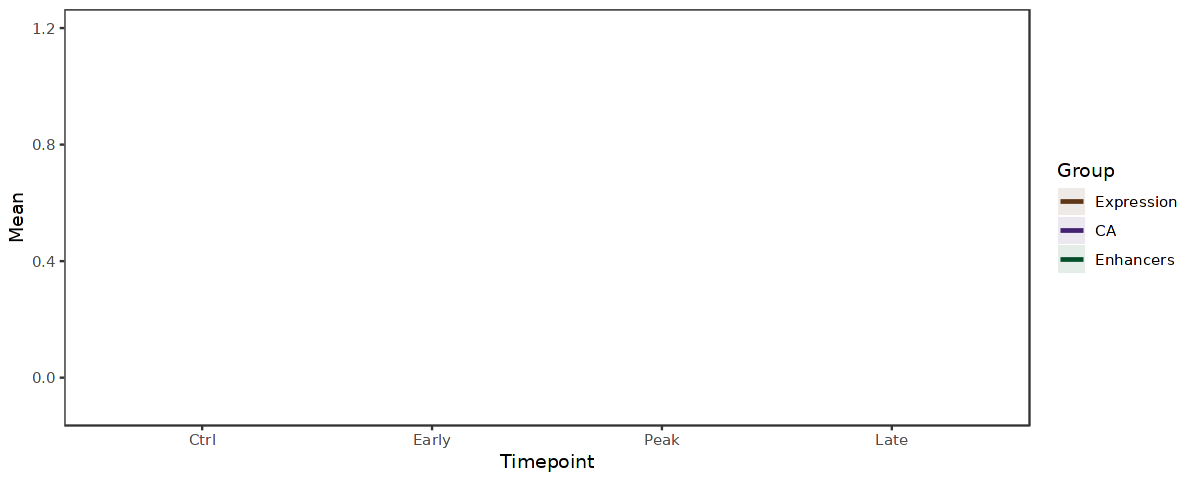

In [208]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 2

In [233]:
highest_cat <- "Early"

In [234]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [235]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [236]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [237]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [238]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [241]:
df

Mean       SD          Timepoint Group     
1  0.07429153 0.053090840 Ctrl      Expression
2  0.93253484 0.095410146 Early     Expression
3  0.46077799 0.200828683 Peak      Expression
4  0.54079461 0.649414484 Late      Expression
5  0.38425089 0.120381777 Ctrl      CA        
6  1.00000000 0.000000000 Early     CA        
7  0.95636129 0.013961626 Peak      CA        
8  0.69191664 0.088041385 Late      CA        
9  0.34986867 0.137182224 Ctrl      Enhancers 
10 1.00000000 0.000000000 Early     Enhancers 
11 0.87160698 0.001944329 Peak      Enhancers 
12 0.74595995 0.017331436 Late      Enhancers

In [239]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

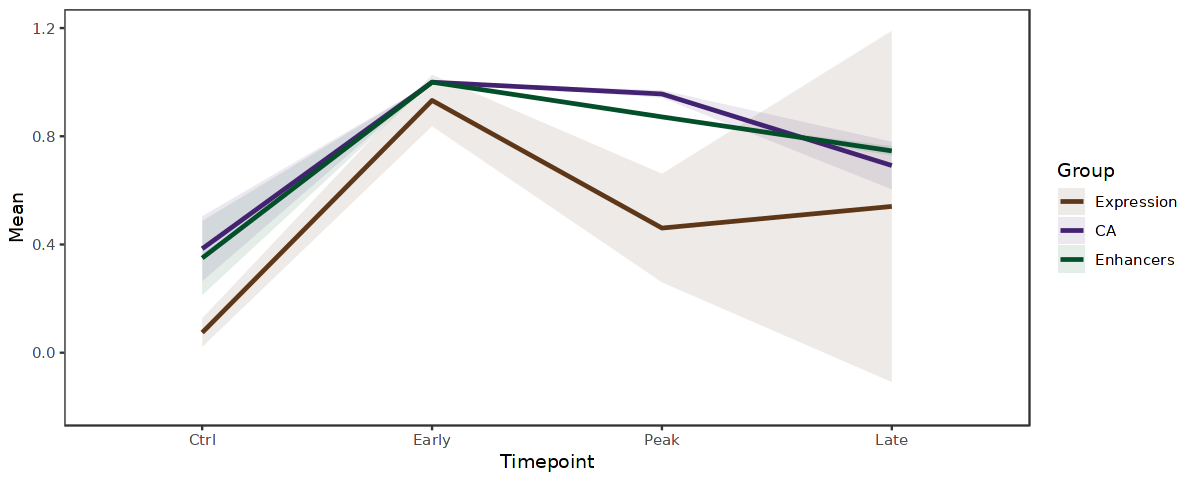

In [242]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 3

In [243]:
highest_cat <- "Peak"

In [244]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [245]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [246]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [247]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [248]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [249]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

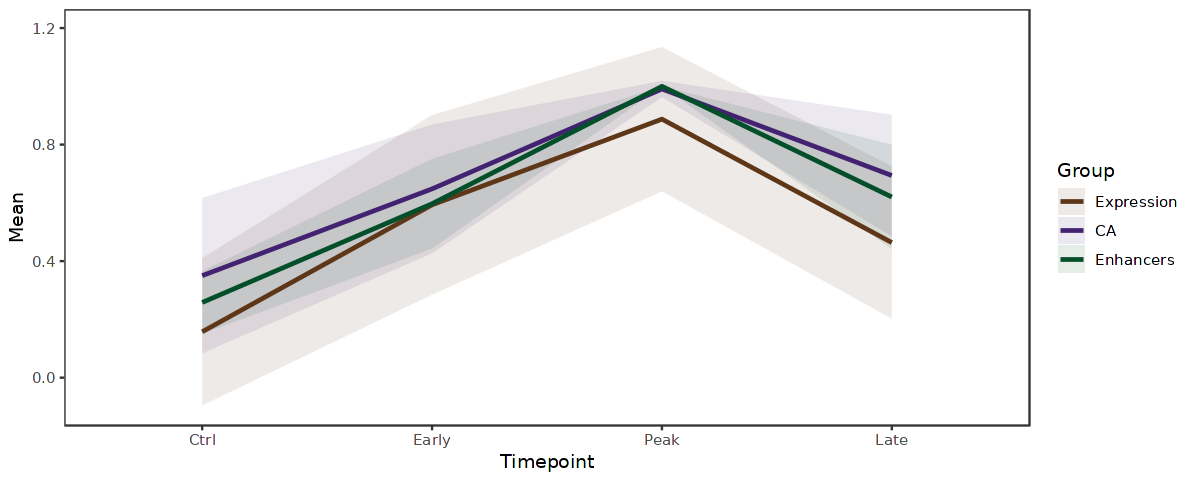

In [250]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 4

In [251]:
highest_cat <- "Late"

In [252]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [253]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [254]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [255]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [256]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [257]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

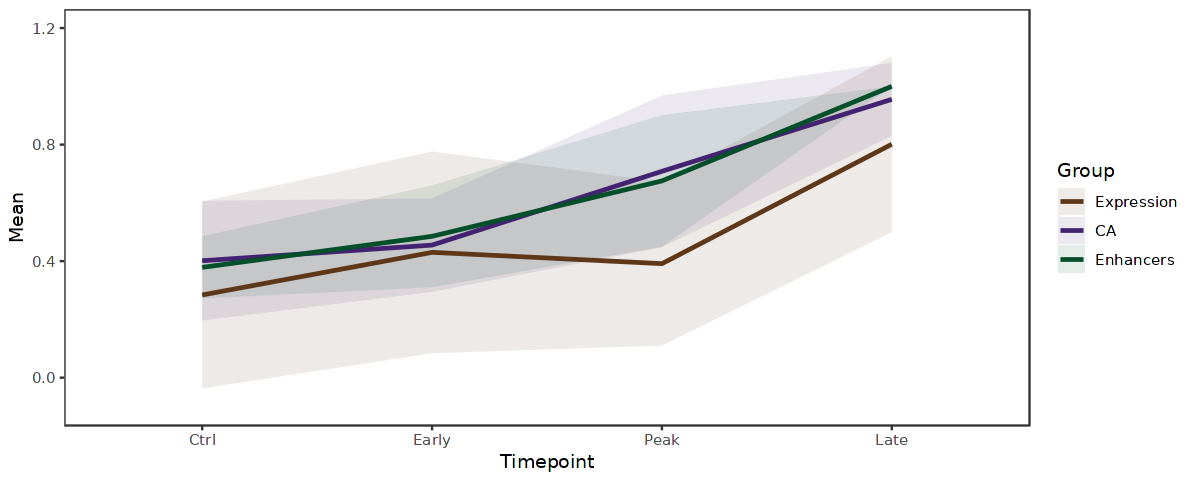

In [258]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 1

In [270]:
highest_cat <- "Ctrl"
second_highest_cat <- "Early"

In [271]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [272]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [273]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [274]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [275]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [276]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [277]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [278]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [279]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


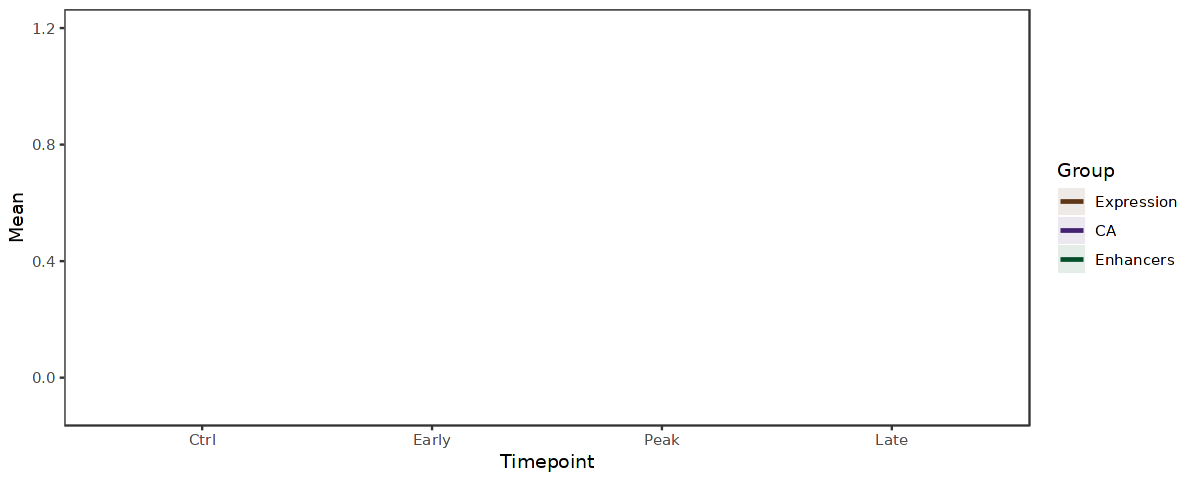

In [280]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 2

In [281]:
highest_cat <- "Ctrl"
second_highest_cat <- "Peak"

In [282]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [283]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [284]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [285]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [286]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [287]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [288]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [289]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [290]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


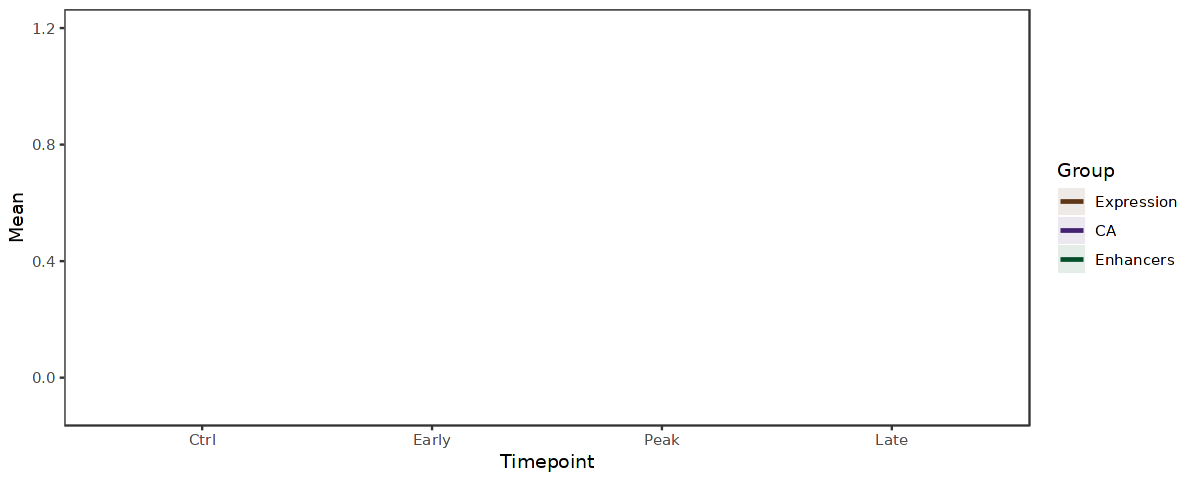

In [291]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 3

In [292]:
highest_cat <- "Ctrl"
second_highest_cat <- "Late"

In [293]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [294]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [295]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [296]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [297]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [298]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [299]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [300]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [301]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


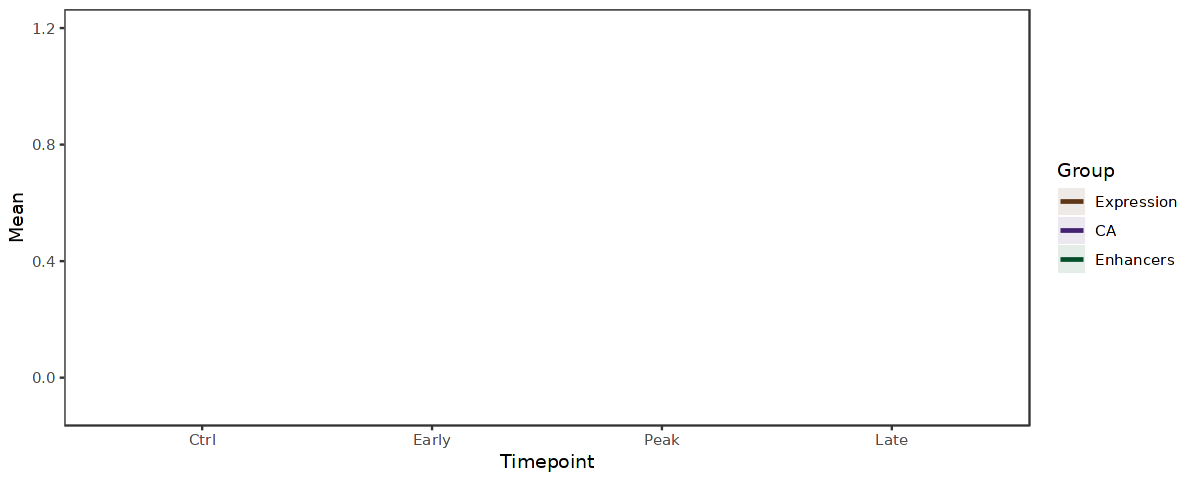

In [302]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 4

In [303]:
highest_cat <- "Early"
second_highest_cat <- "Ctrl"

In [304]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [305]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [306]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [307]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [308]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [309]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [310]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [311]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [312]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


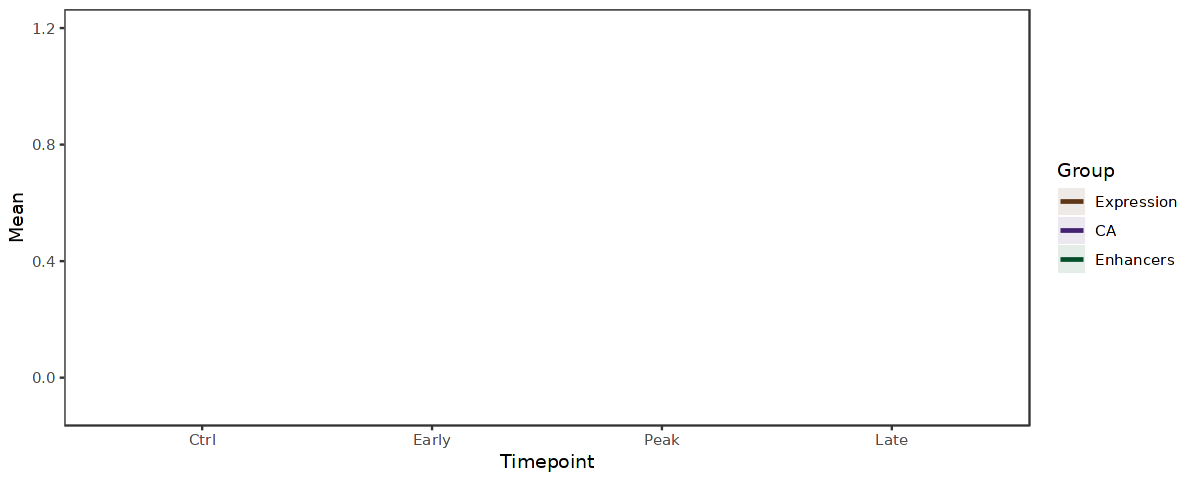

In [313]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 5

In [402]:
highest_cat <- "Early"
second_highest_cat <- "Peak"

In [403]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [404]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [405]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [406]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [407]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [408]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [409]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [410]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [411]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

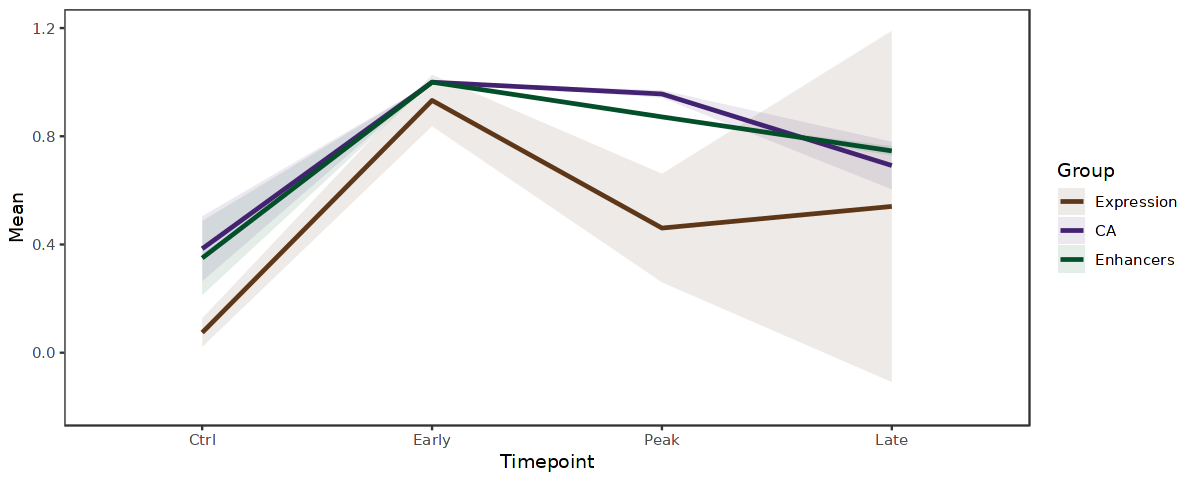

In [412]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 6

In [413]:
highest_cat <- "Early"
second_highest_cat <- "Late"

In [414]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [415]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [416]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [417]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [418]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [419]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [420]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [421]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [422]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


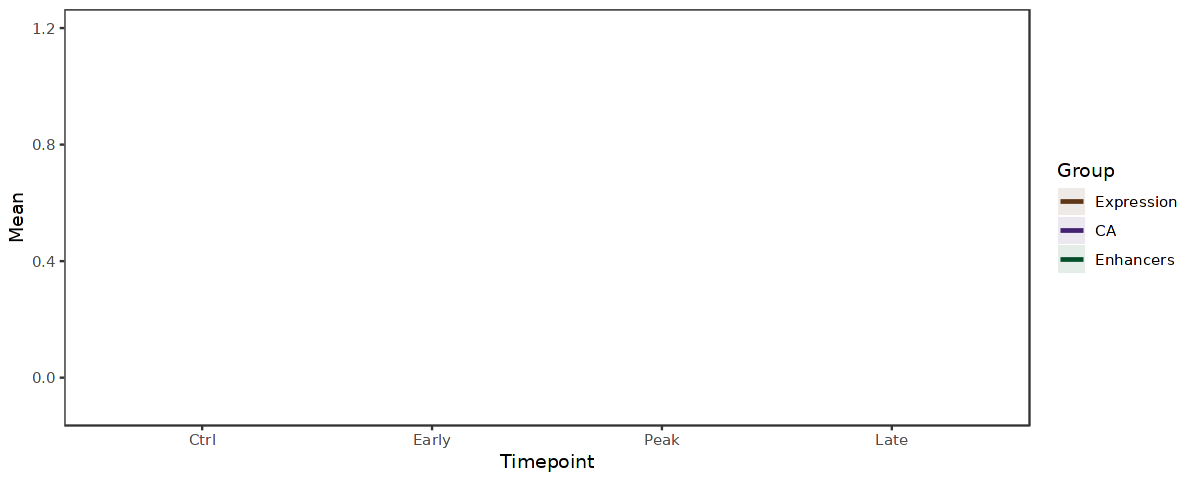

In [423]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 7

In [336]:
highest_cat <- "Peak"
second_highest_cat <- "Ctrl"

In [337]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [338]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [339]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [340]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [341]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [342]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [343]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [344]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [345]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


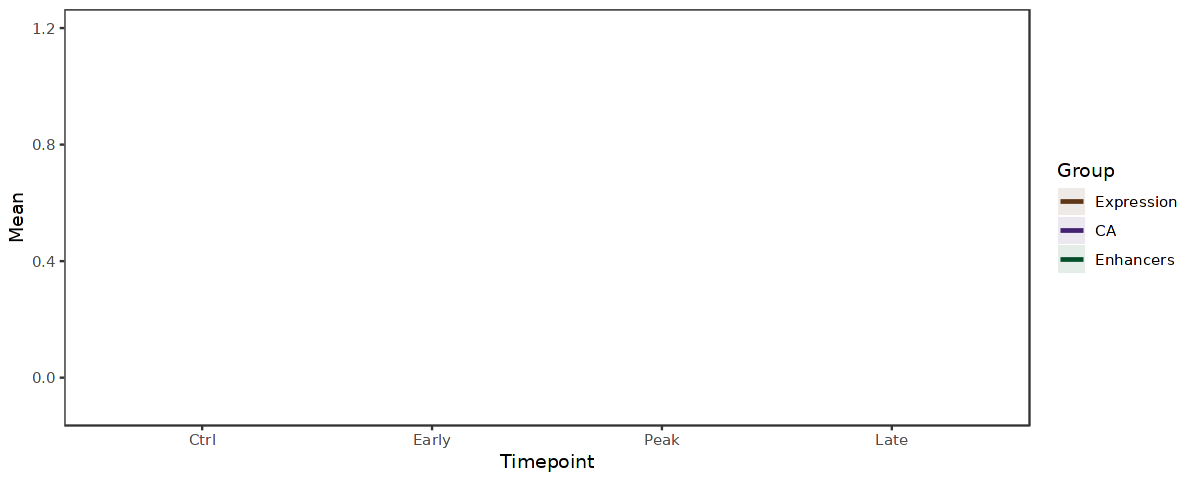

In [346]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 8

In [435]:
highest_cat <- "Peak"
second_highest_cat <- "Early"

In [436]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [437]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [438]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [439]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [440]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [441]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [442]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [443]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [444]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

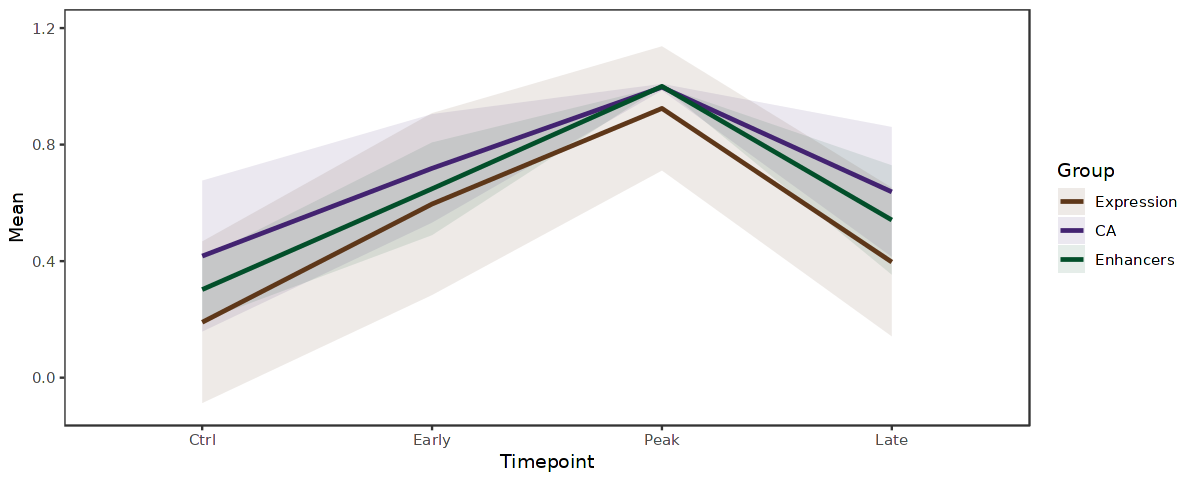

In [445]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 9

In [490]:
highest_cat <- "Peak"
second_highest_cat <- "Late"

In [491]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [492]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [493]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [494]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [495]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [496]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [497]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [498]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [499]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

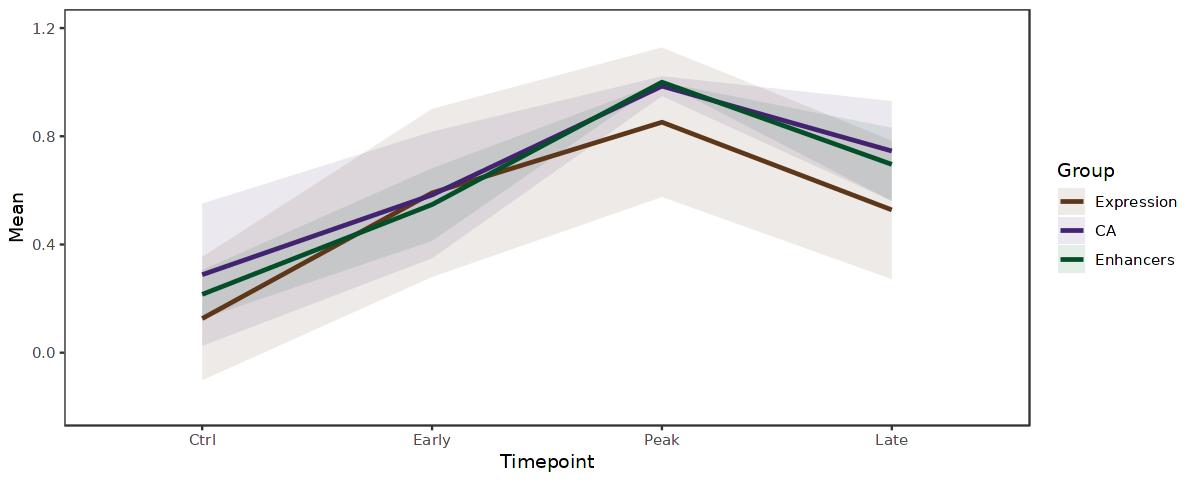

In [500]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 10

In [457]:
highest_cat <- "Late"
second_highest_cat <- "Ctrl"

In [458]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [459]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [460]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [461]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [462]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [463]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [464]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [465]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [466]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

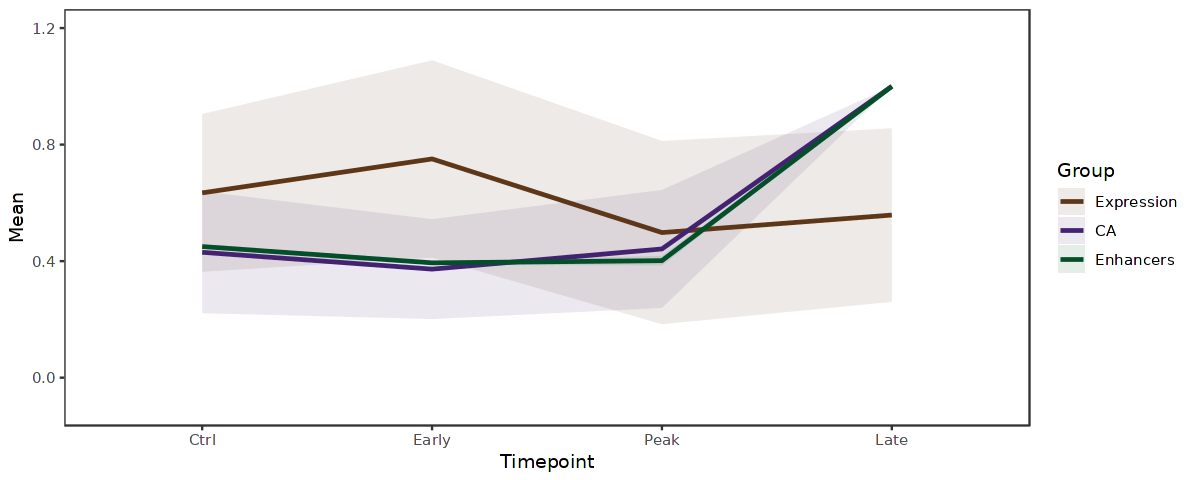

In [467]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 11

In [468]:
highest_cat <- "Late"
second_highest_cat <- "Early"

In [469]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [470]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [471]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [472]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [473]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [474]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [475]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [476]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [477]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


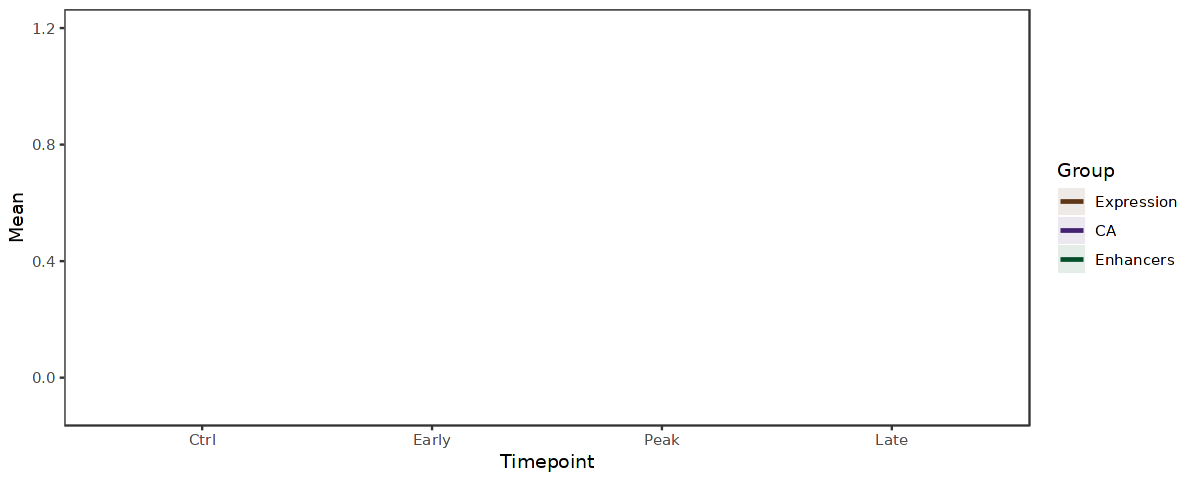

In [478]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 12

In [479]:
highest_cat <- "Late"
second_highest_cat <- "Peak"

In [480]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [481]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [482]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [483]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [484]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [485]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [486]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [487]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [488]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

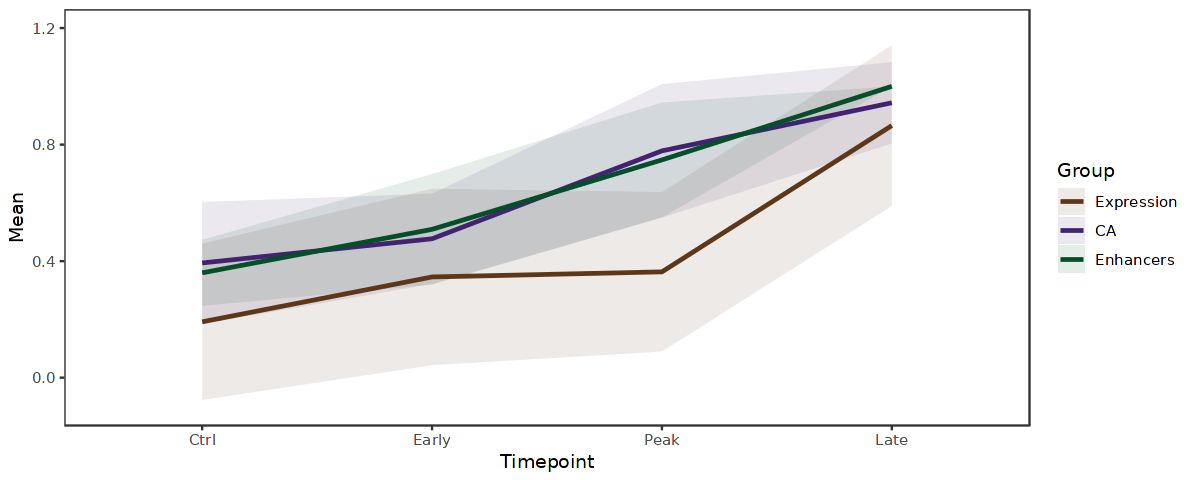

In [489]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

#### 3.1.2 MOL2

In [502]:
cluster_choice = "MOL2"

In [503]:
gene_list <- unique(unlist(DVDORC[[cluster_choice]]))

In [504]:
tmp <- subset(MORNAATACCOL, subset = cellType_OL_merge == cluster_choice)

In [505]:
table_sample_low <- table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,] <= 5]
table_sample_low

sample_keep <- names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)]

named integer(0)

In [506]:
#Remove sample with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident %in% (names(table_sample_low)),])
tmp <- subset(tmp, cells=keepcells)

In [507]:
table_group_low <-table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,] <= 30]
table_group_low

group_keep <- names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)]

named integer(0)

In [508]:
#Remove timepoint with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident_merge %in% (names(table_group_low)),])
tmp <- subset(tmp, cells=keepcells)

In [509]:
tmp$orig.ident <- factor(x = tmp$orig.ident, levels = names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)])
tmp$orig.ident_merge <- factor(x = tmp$orig.ident_merge, levels = names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)])

In [510]:
DefaultAssay(tmp) <- "GenePromAcc"

In [511]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


In [512]:
DefaultAssay(tmp) <- "RNA"

In [513]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


##### 3.1.2.1 Heatmaps

In [514]:
Idents(object = tmp) <- "orig.ident_merge"

In [515]:
sample_names <- levels(tmp$orig.ident_merge)

In [516]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [517]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [518]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [519]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [520]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [521]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [522]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [523]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [524]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [525]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [526]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [527]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [528]:
saveRDS(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".rds"))

In [529]:
write.csv(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".csv"), row.names=TRUE)
write.csv(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".csv"), row.names=TRUE)
write.csv(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".csv"), row.names=TRUE)

In [530]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [531]:
tmp_mat <- matrix
colnames(tmp_mat) <- c("A","B","C","D")
correct_order <- unlist(order_heatmap_genes(as.data.frame(tmp_mat)))

In [532]:
matrix <- matrix[correct_order,]

In [533]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [534]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

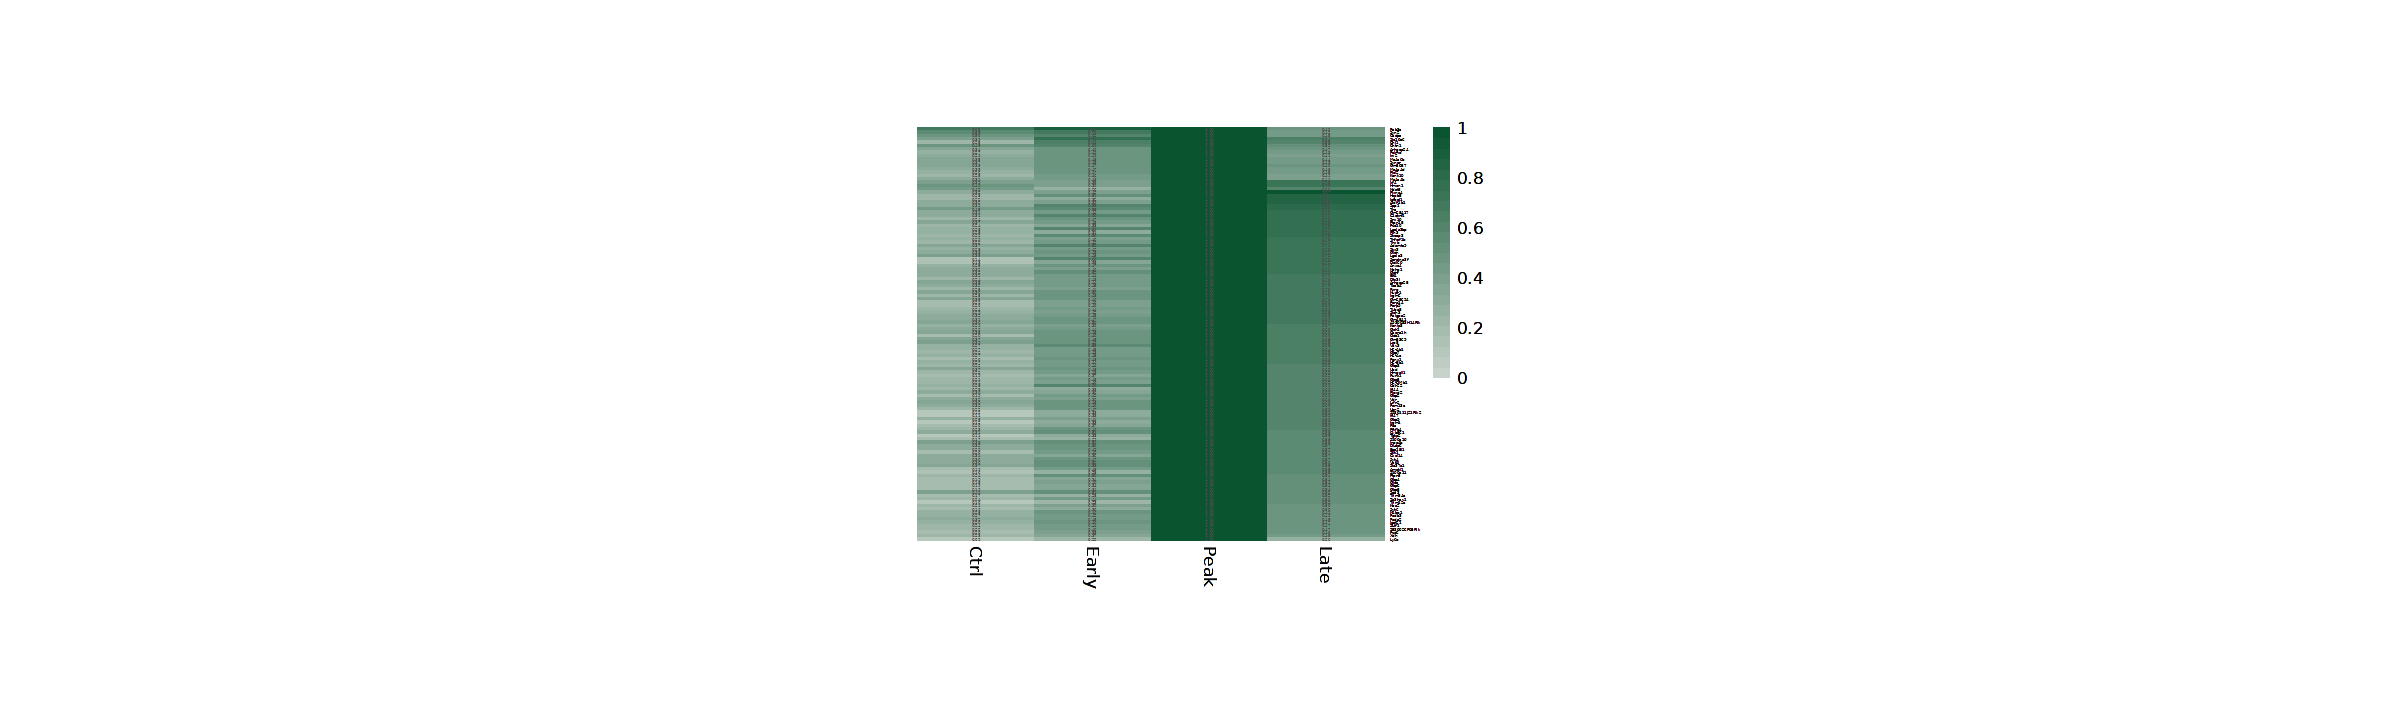

In [535]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [536]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [537]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [538]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [539]:
matrix <- tmp_sample_markers_DORCs_mean

In [540]:
matrix <- matrix[correct_order,]

In [541]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

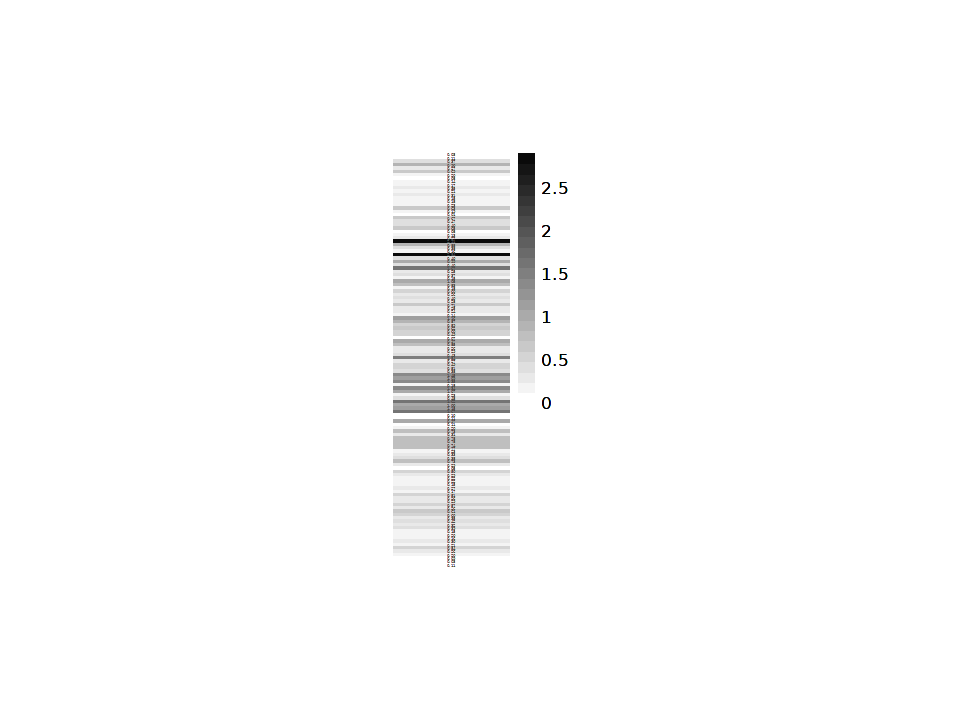

In [542]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [543]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [544]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [545]:
matrix <- matrix[correct_order,]

In [546]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

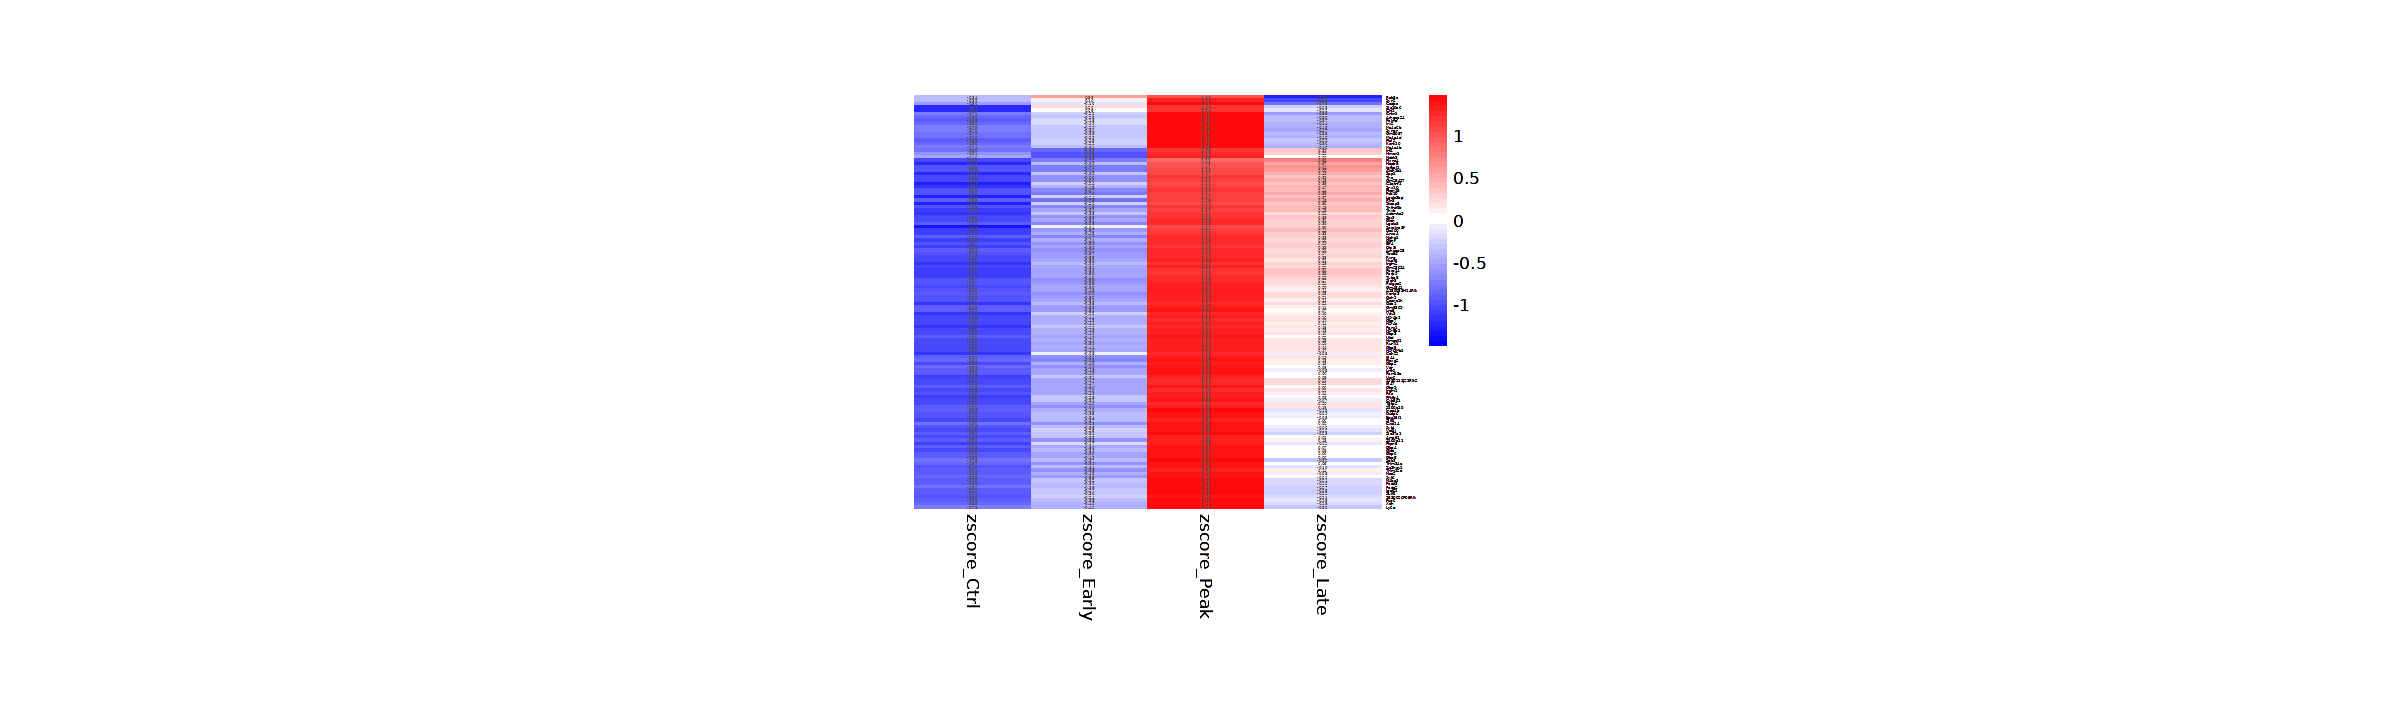

In [547]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [548]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [549]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [550]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [551]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [552]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [553]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

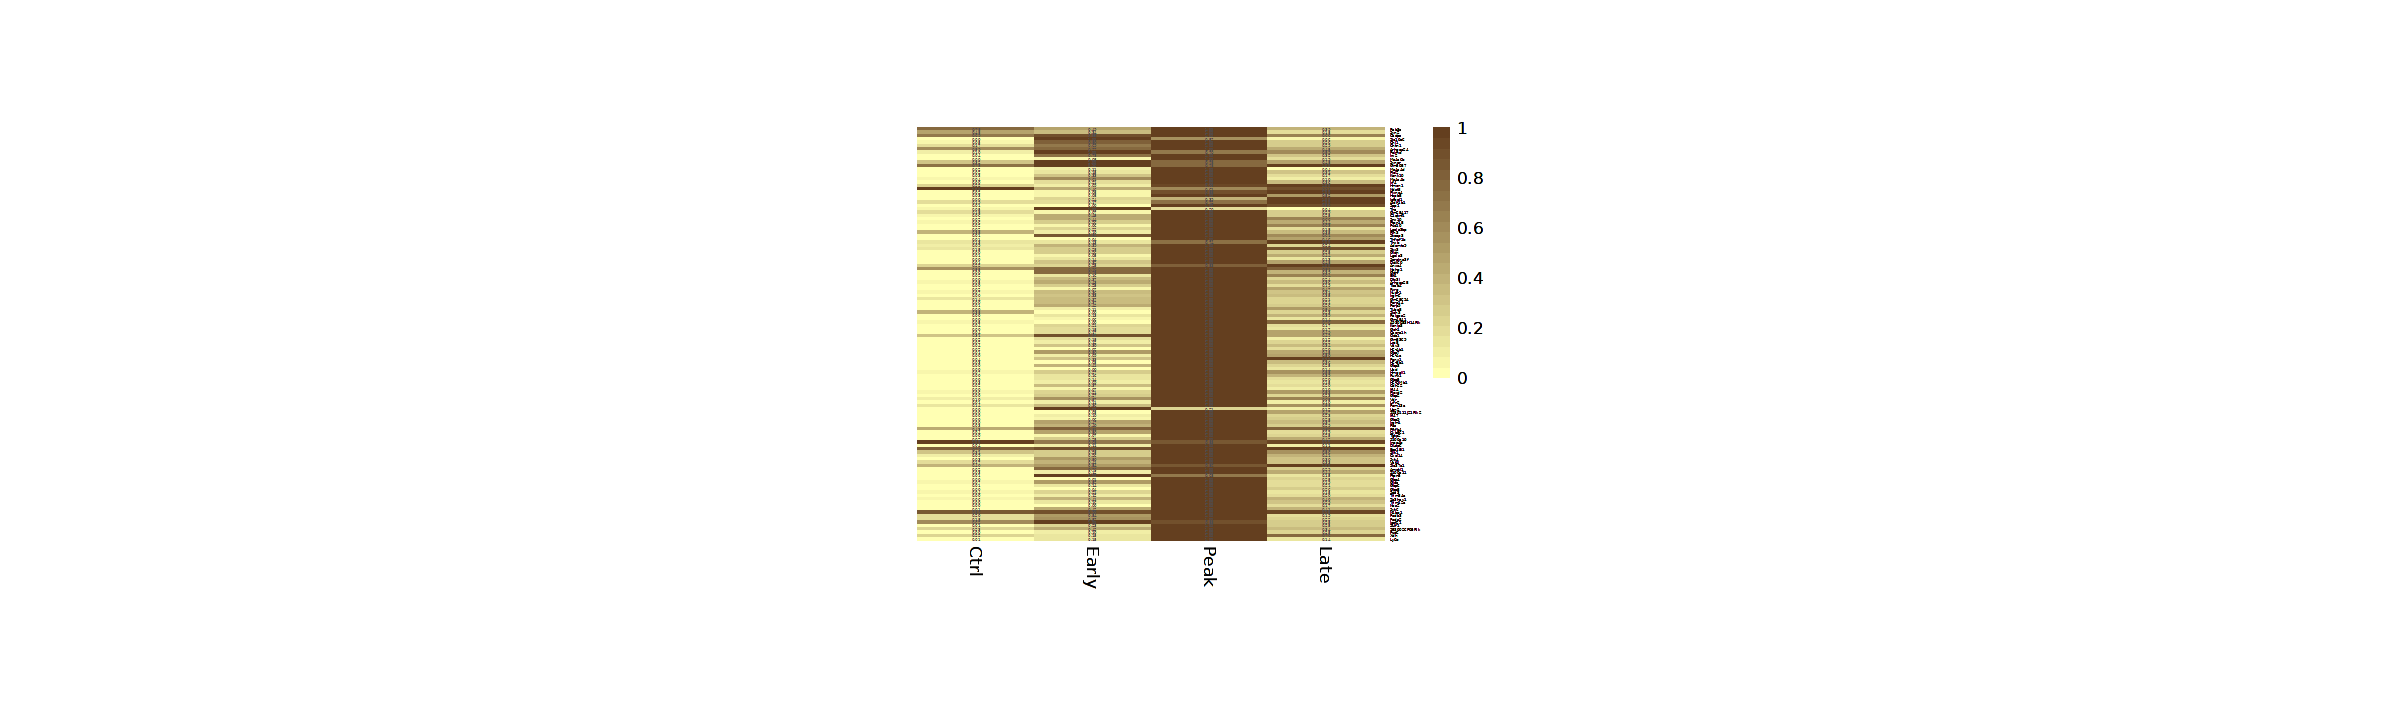

In [554]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [555]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [556]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [557]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [558]:
matrix <- tmp_sample_markers_RNA_mean

In [559]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [560]:
matrix <- matrix[correct_order,]

In [561]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

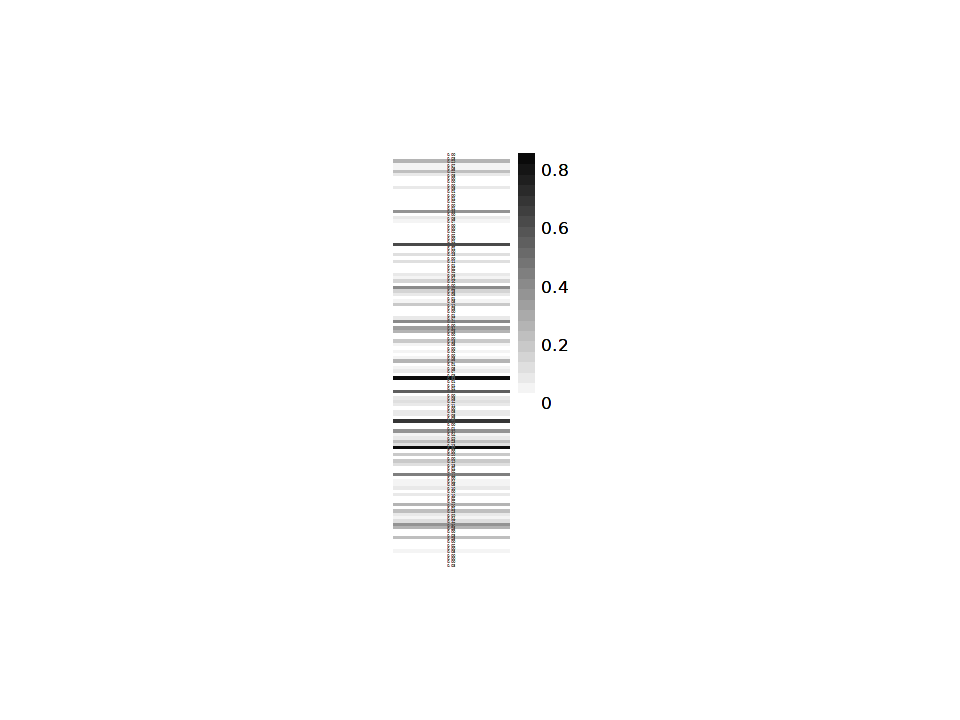

In [562]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [563]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [564]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [565]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [566]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [567]:
matrix <- matrix[correct_order,]

In [568]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

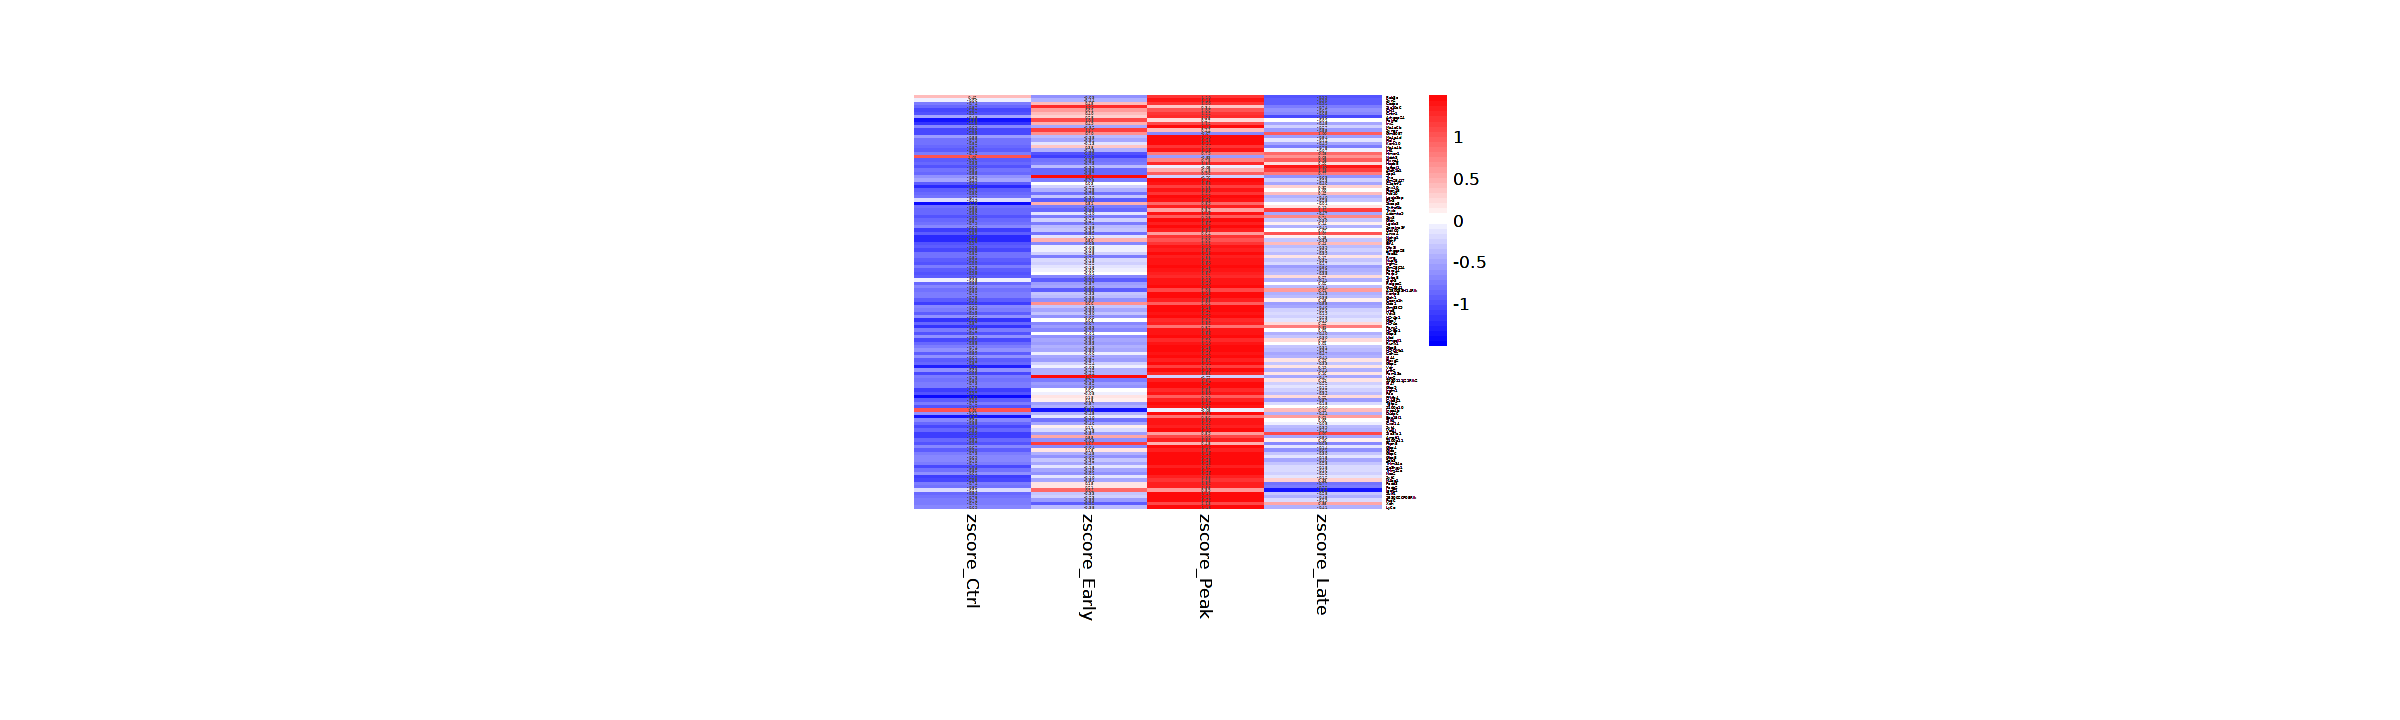

In [569]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [570]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [571]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [572]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [573]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [574]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [575]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

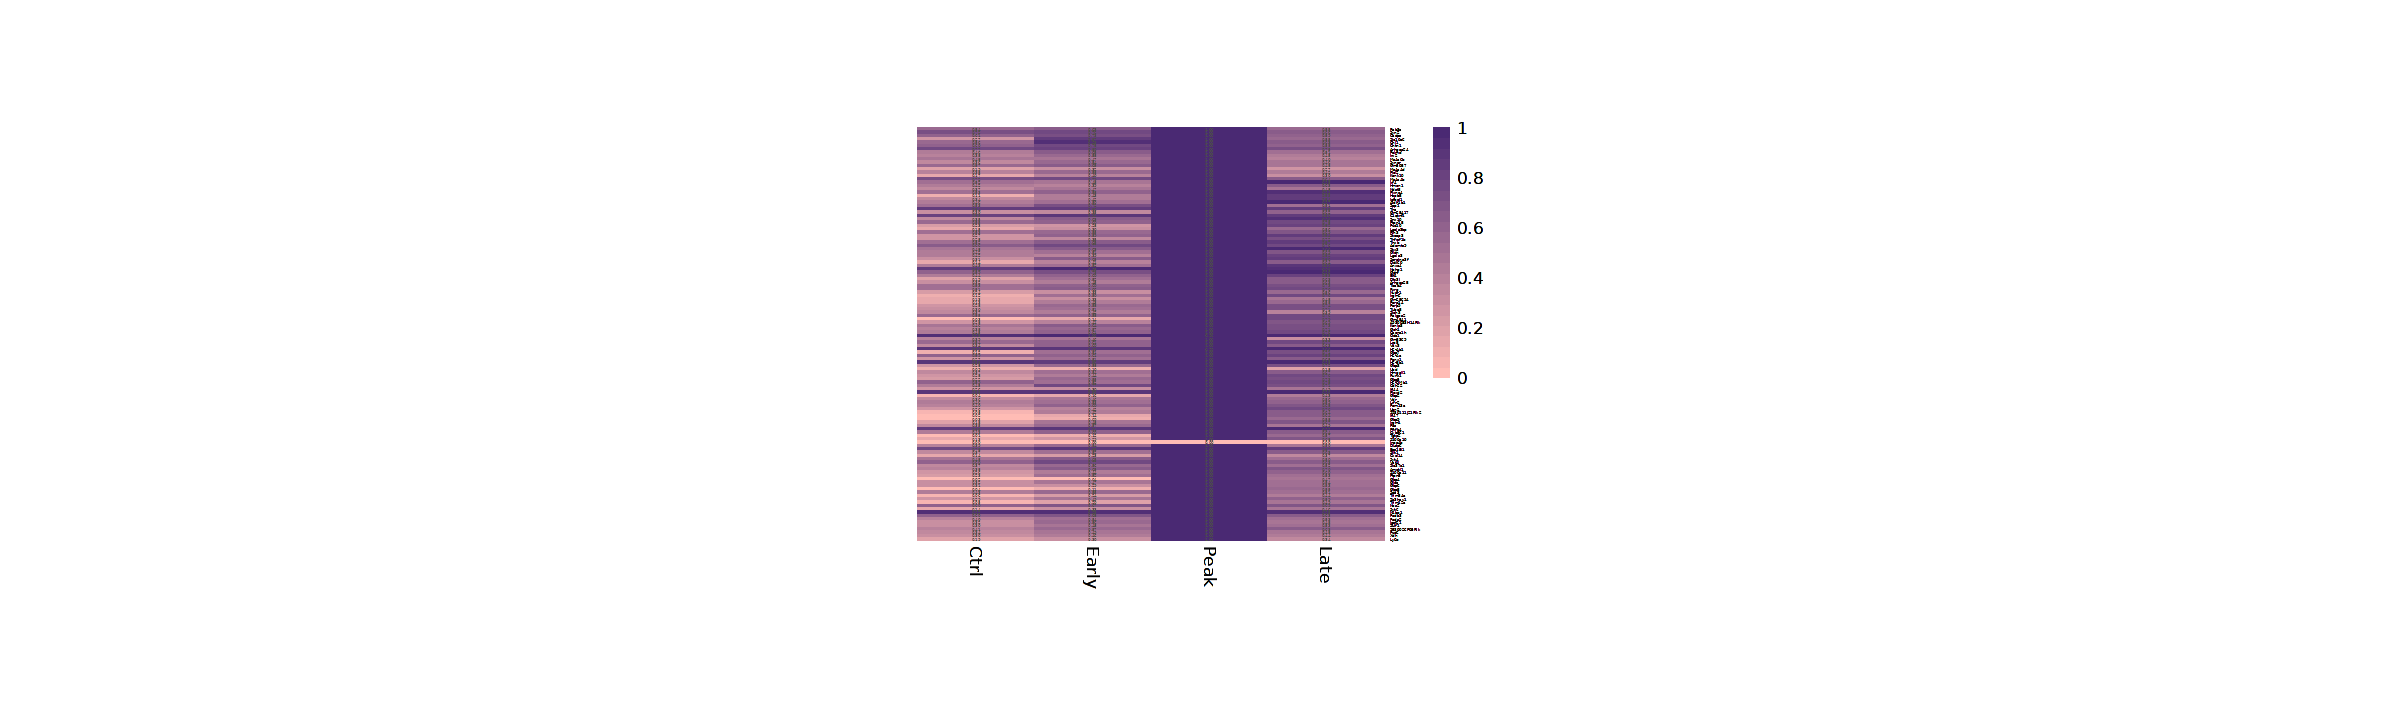

In [576]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [577]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [578]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [579]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [580]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [581]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [582]:
matrix <- matrix[correct_order,]

In [583]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

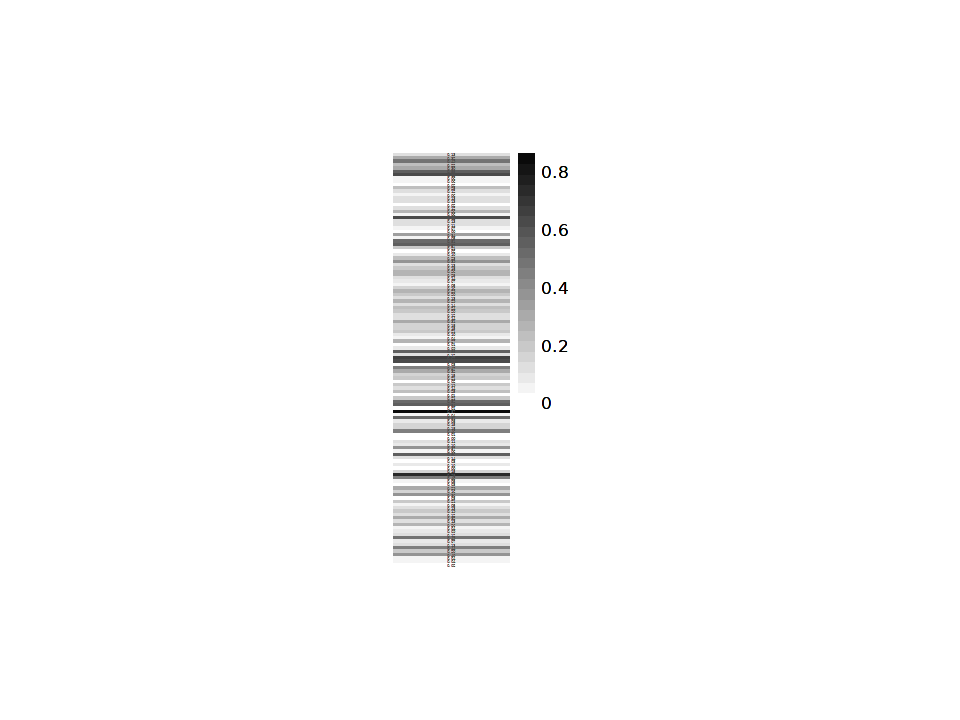

In [584]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [585]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [586]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [587]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [588]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [589]:
matrix <- matrix[correct_order,]

In [590]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

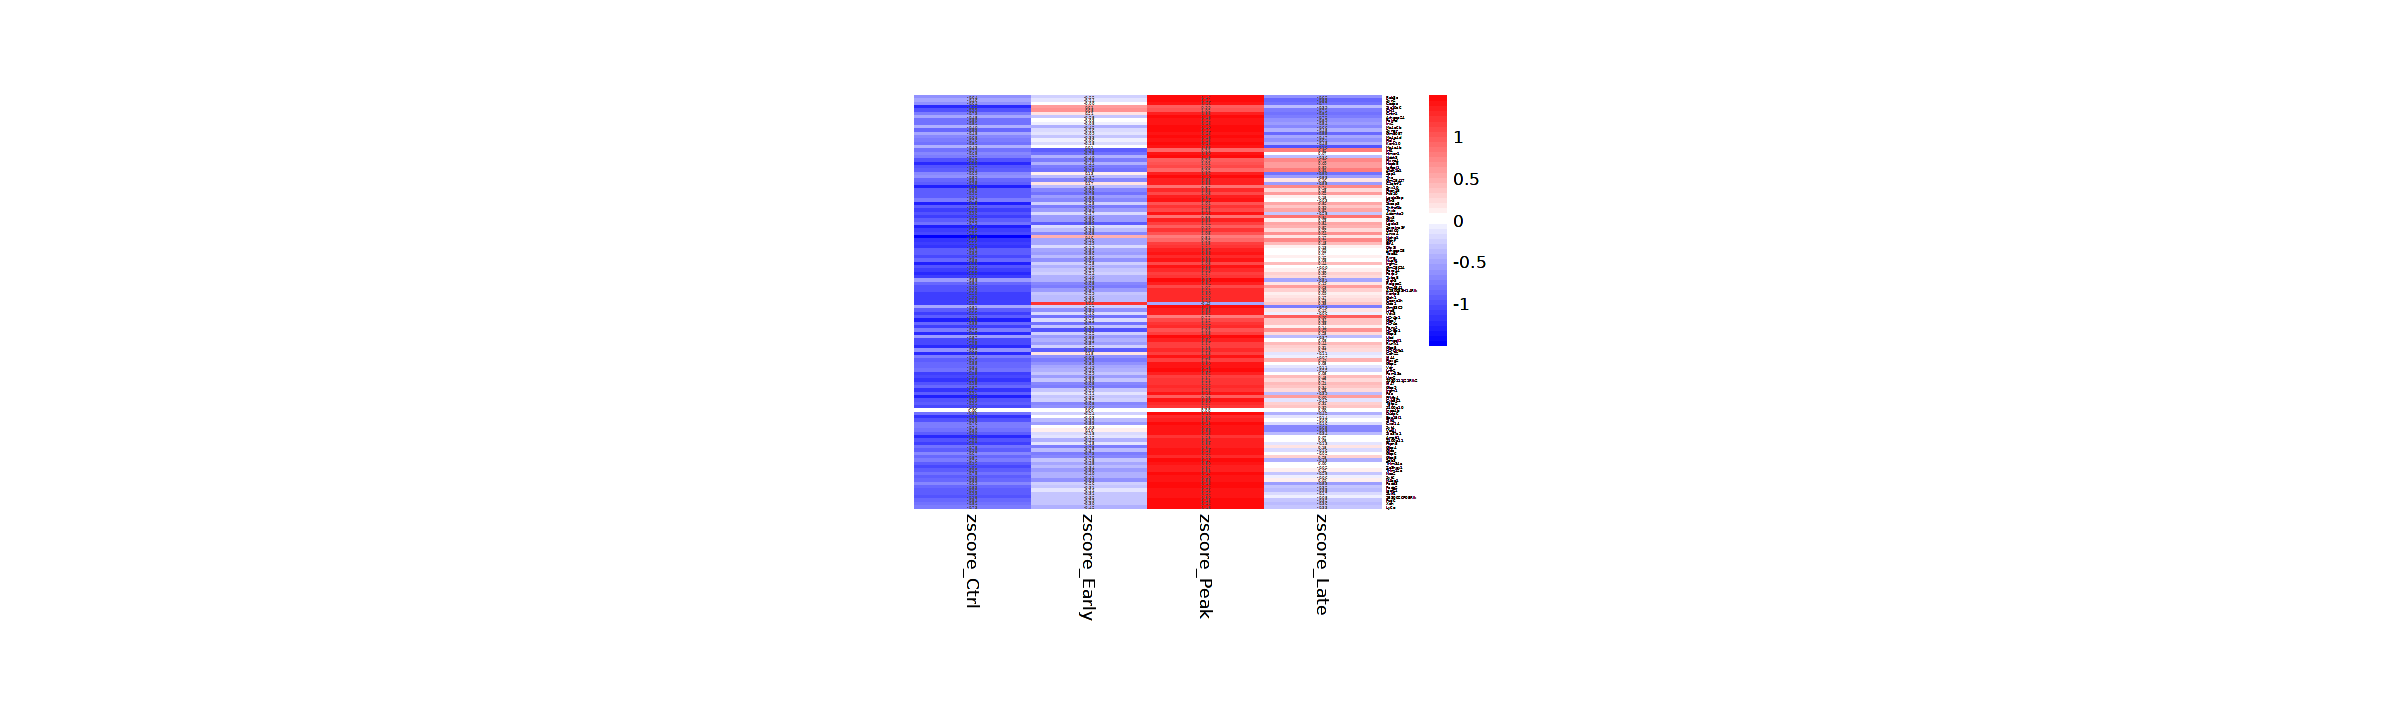

In [591]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [592]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [593]:
Idents(object = tmp) <- "orig.ident"

In [594]:
sample_names <- levels(tmp$orig.ident)

In [595]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [596]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [597]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [598]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [599]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [600]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [601]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [602]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [603]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [604]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [605]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [606]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [607]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [608]:
matrix <- matrix[correct_order,]

In [609]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [610]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

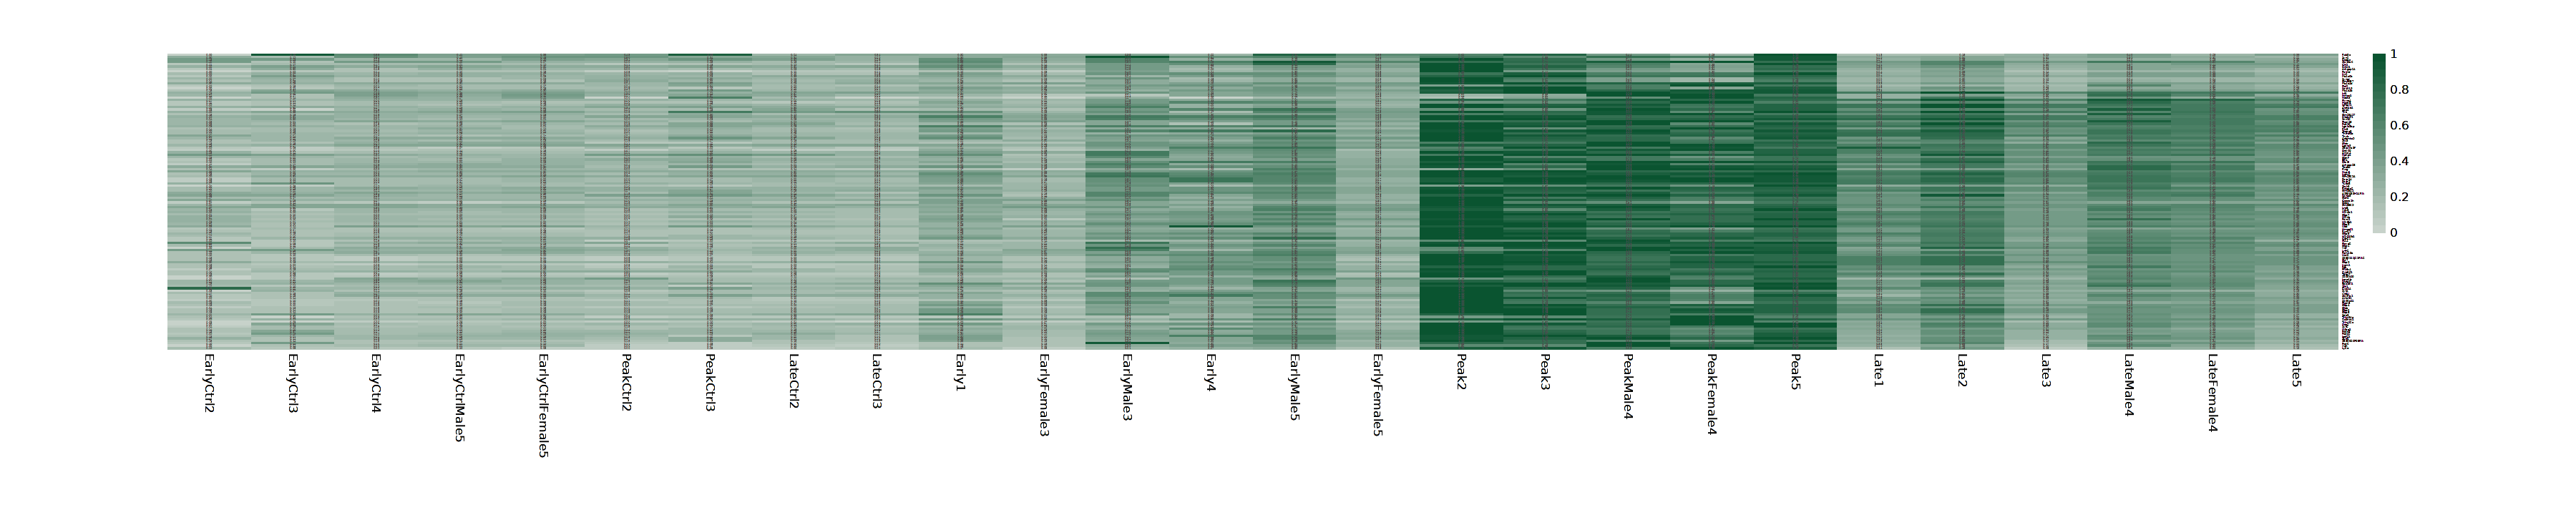

In [611]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [612]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [613]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [614]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [615]:
matrix <- tmp_sample_markers_DORCs_mean

In [616]:
matrix <- matrix[correct_order,]

In [617]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

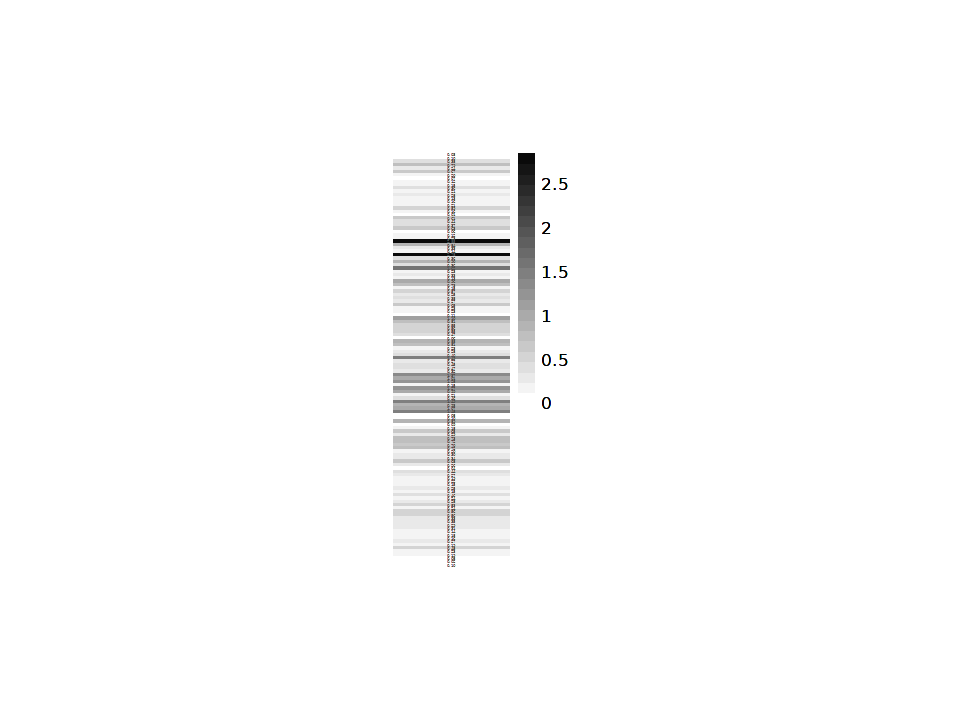

In [618]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [619]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [620]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [621]:
matrix <- matrix[correct_order,]

In [622]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

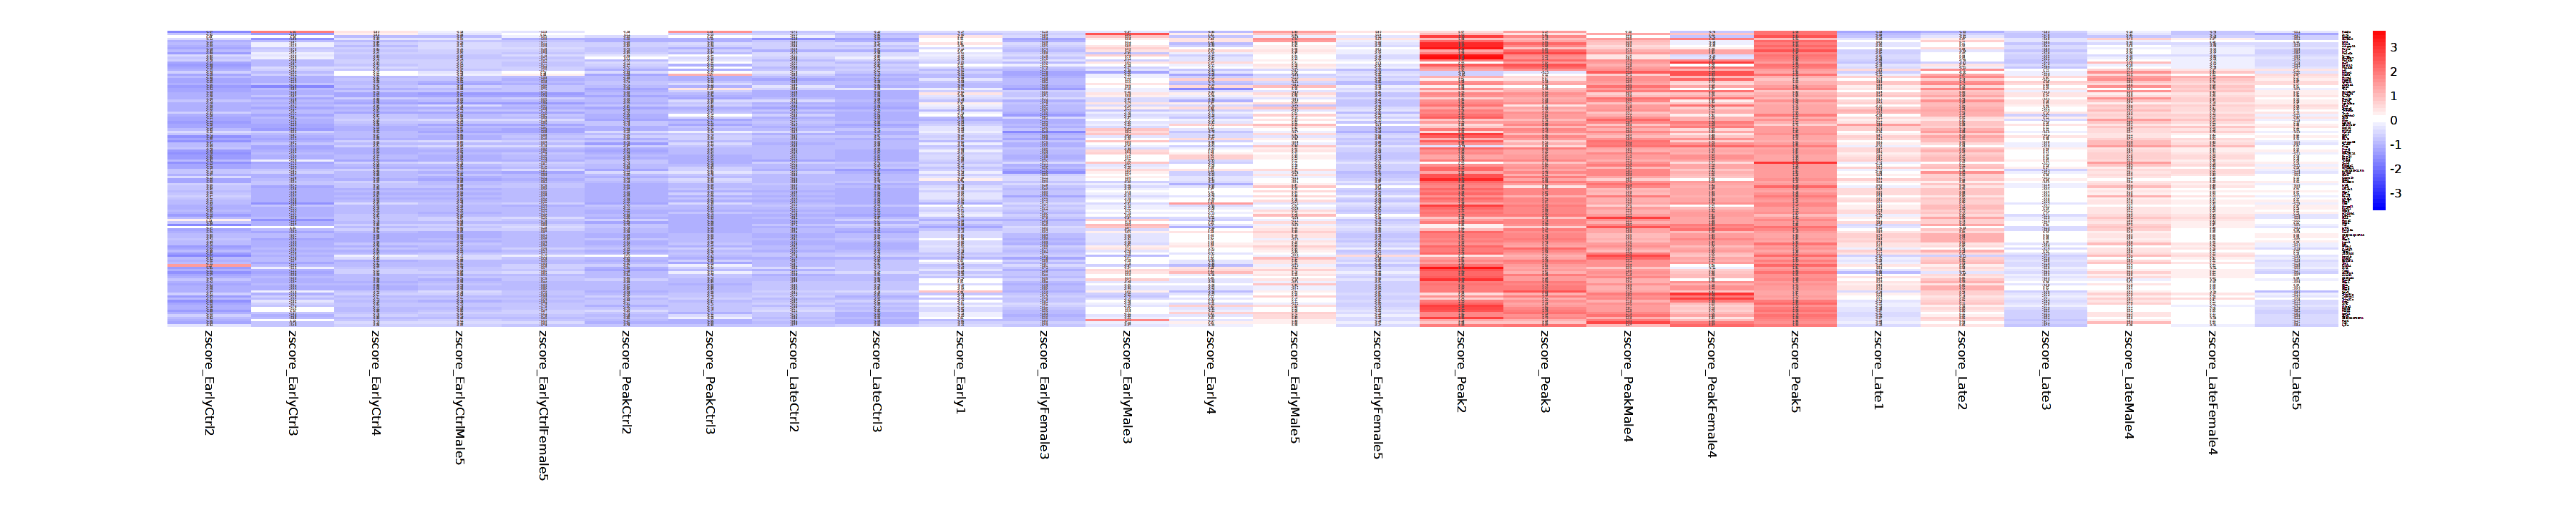

In [623]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [624]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [625]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [626]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [627]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [628]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [629]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

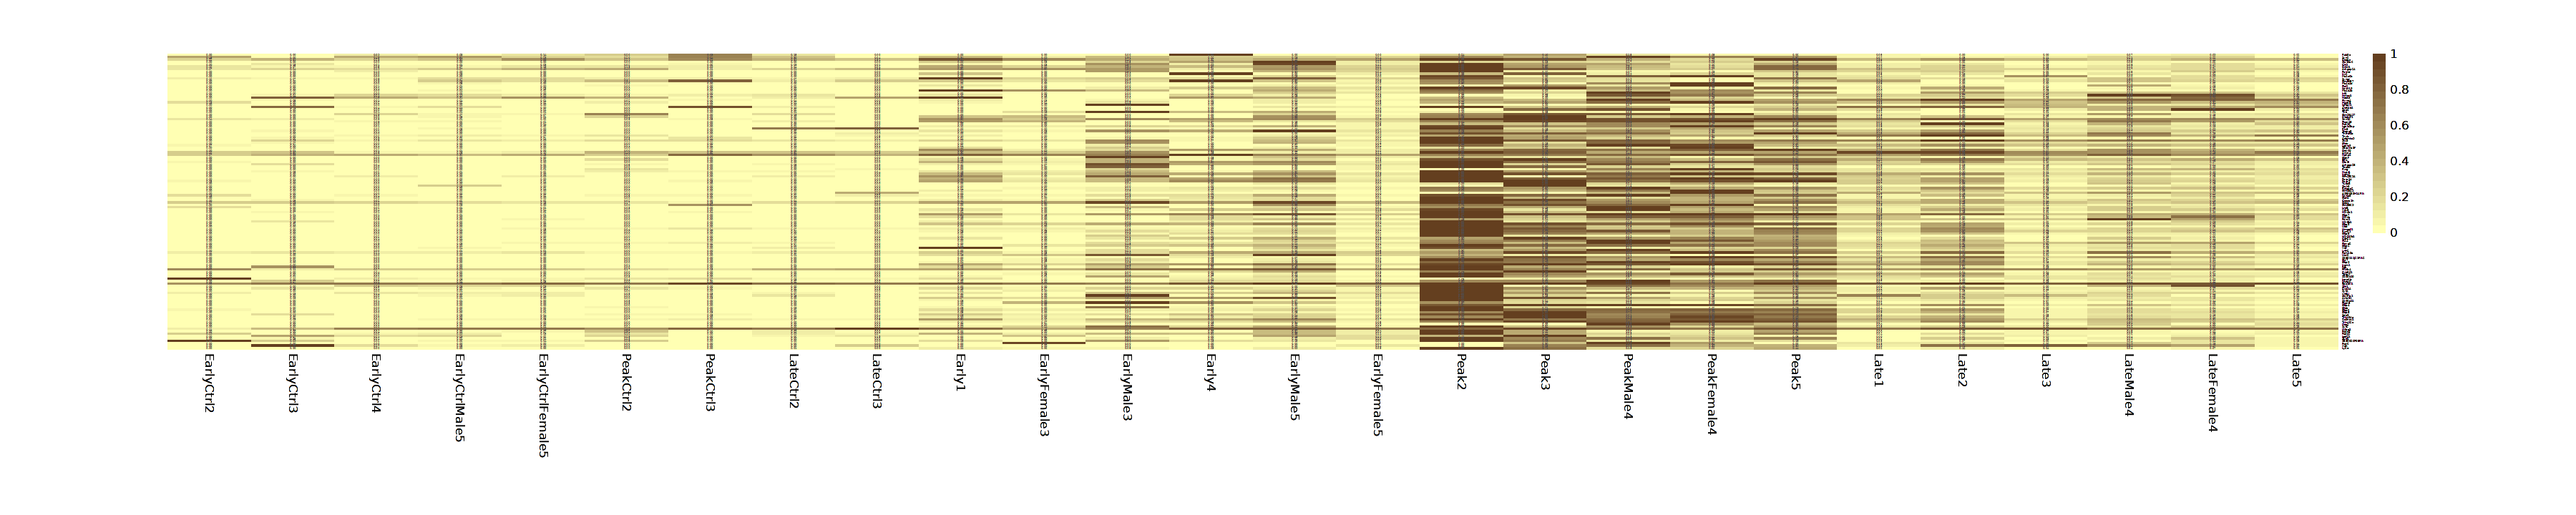

In [630]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [631]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [632]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [633]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [634]:
matrix <- tmp_sample_markers_RNA_mean

In [635]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [636]:
matrix <- matrix[correct_order,]

In [637]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

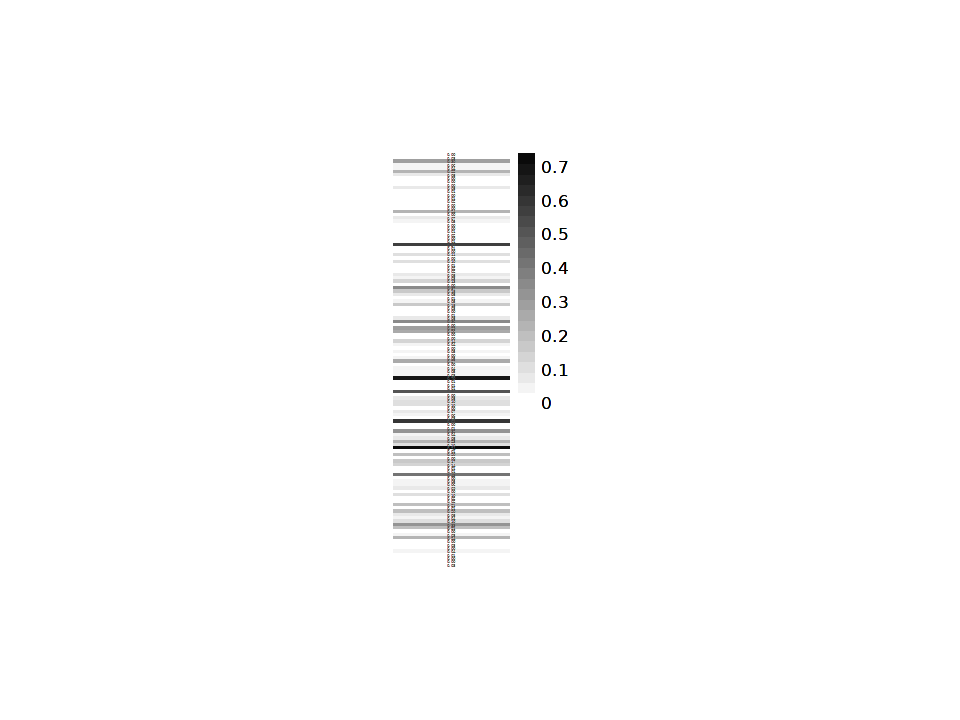

In [638]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [639]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [640]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [641]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [642]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [643]:
matrix <- matrix[correct_order,]

In [644]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

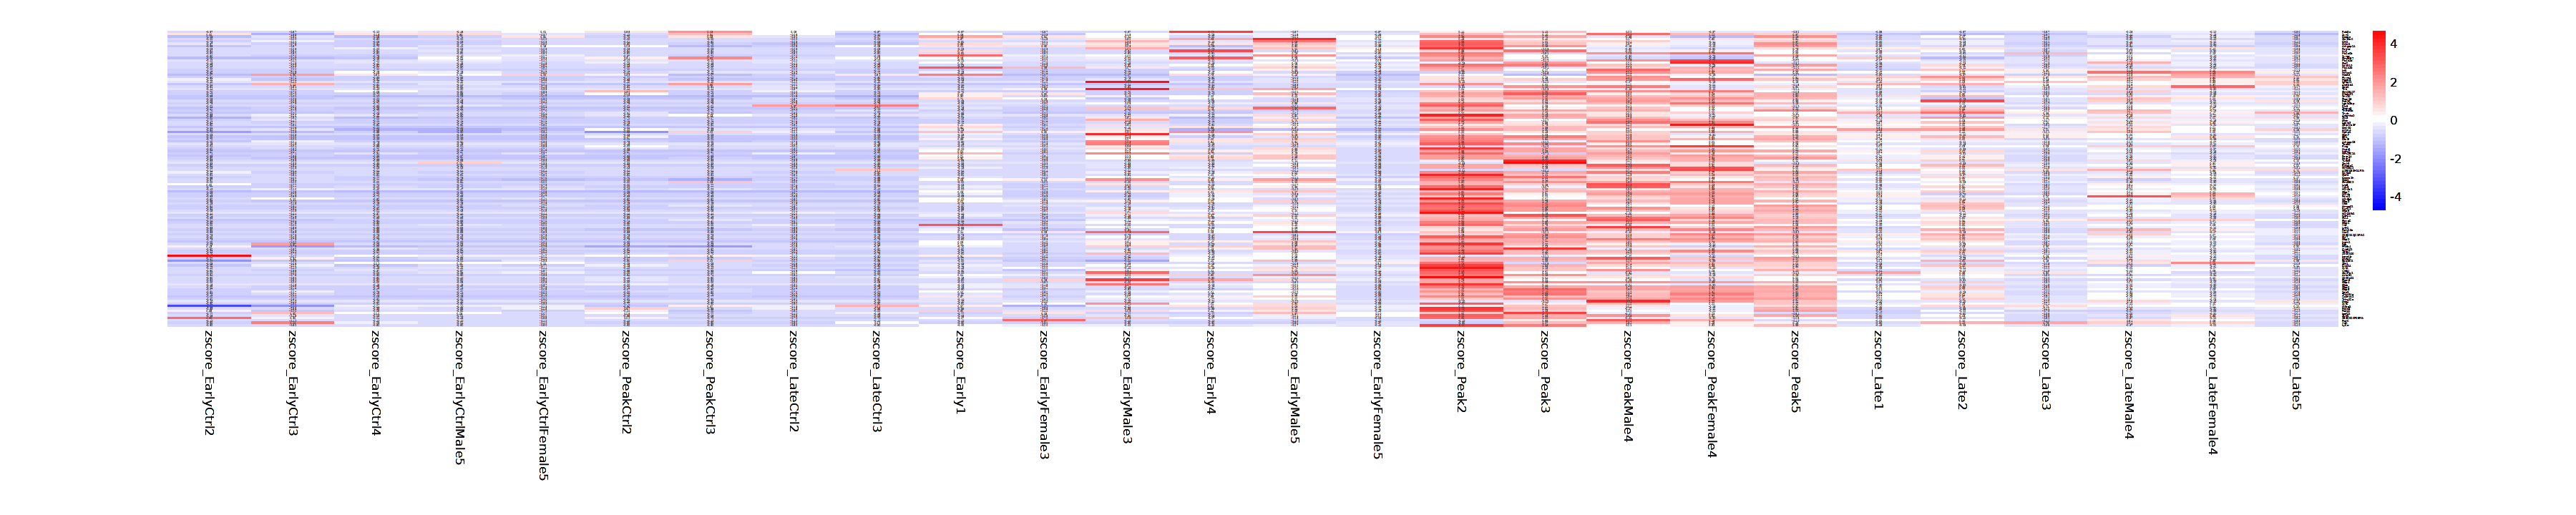

In [645]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [646]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_zscore.pdf"), width=30, height=plot_height)

png 
  2

In [647]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [648]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [649]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [650]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [651]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

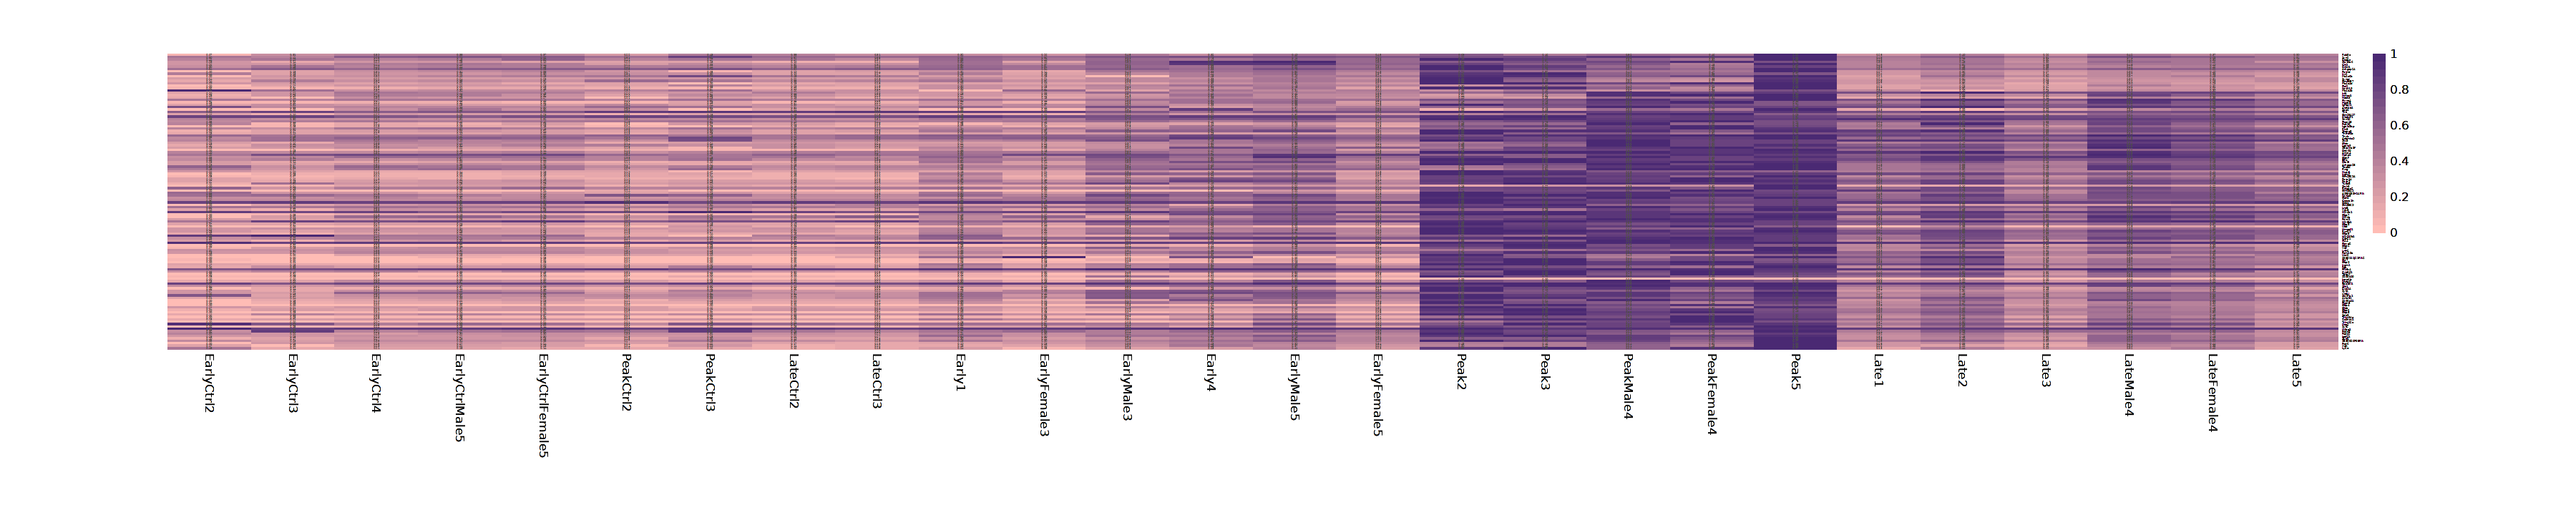

In [652]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [653]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [654]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [655]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [656]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [657]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [658]:
matrix <- matrix[correct_order,]

In [659]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

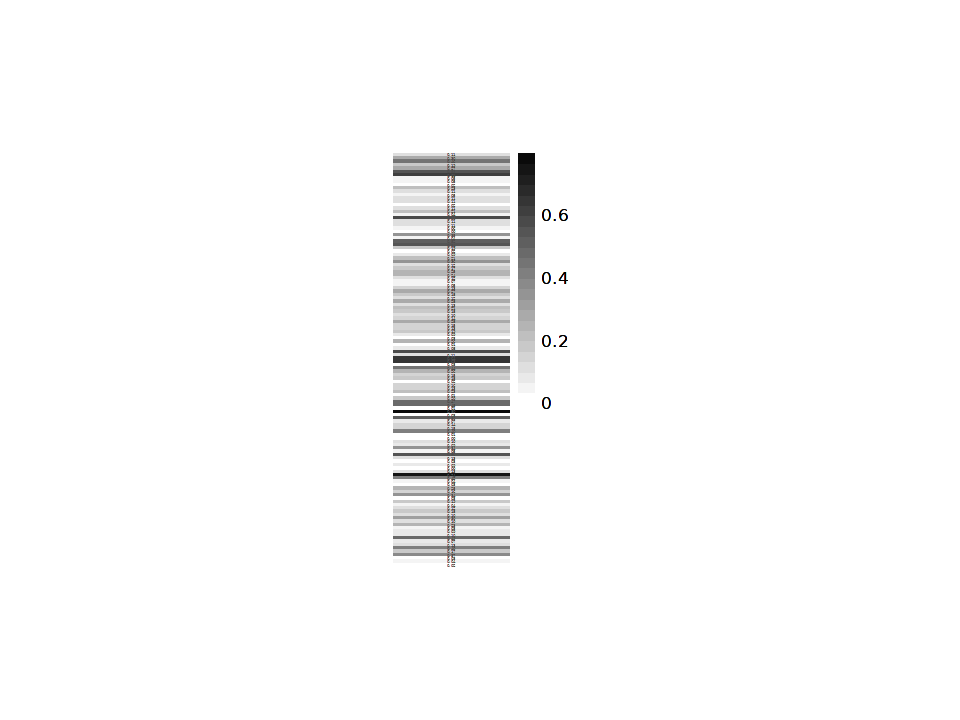

In [660]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [661]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [662]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [663]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [664]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [665]:
matrix <- matrix[correct_order,]

In [666]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

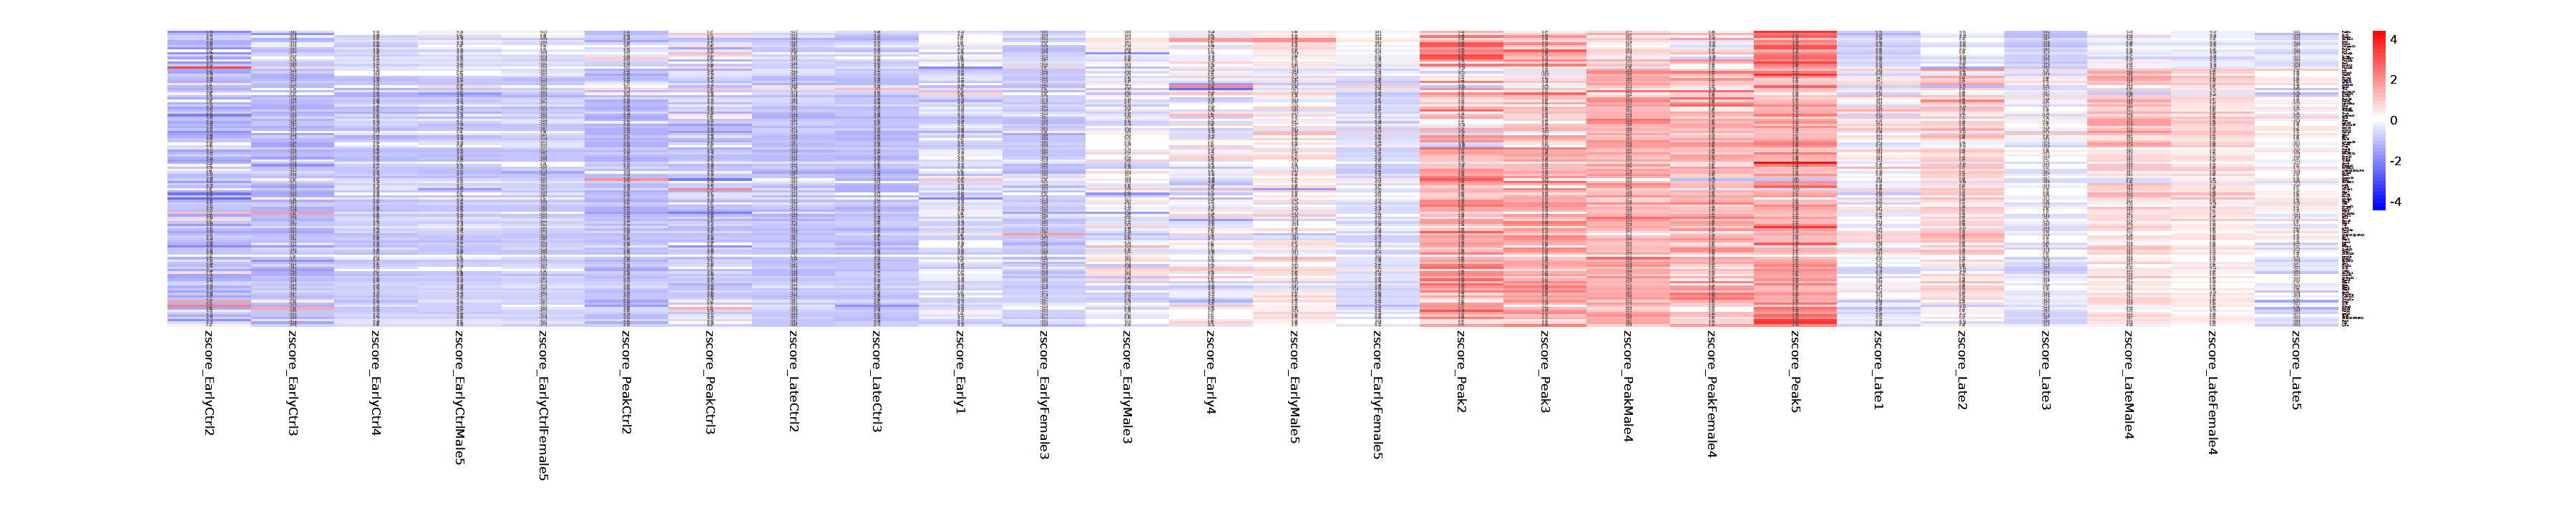

In [667]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [668]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

##### 3.1.2.2 Module dynamics

In [669]:
Idents(object = tmp) <- "orig.ident_merge"

In [670]:
sample_names <- levels(tmp$orig.ident_merge)

In [671]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [672]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [673]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [674]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [675]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [676]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [677]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [678]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [679]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [680]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [681]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [682]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [683]:
tmp_sample_markers_DORCs_scaled <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [684]:
tmp_sample_markers_RNA_sub_scaled <- tmp_sample_markers_RNA_sub/do.call(pmax, tmp_sample_markers_RNA_sub)

In [685]:
tmp_sample_markers_GenePromAcc_sub_scaled <- tmp_sample_markers_GenePromAcc_sub/do.call(pmax, tmp_sample_markers_GenePromAcc_sub)

###### Category 1

In [686]:
highest_cat <- "Ctrl"

In [687]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [688]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [689]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [690]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [691]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [692]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


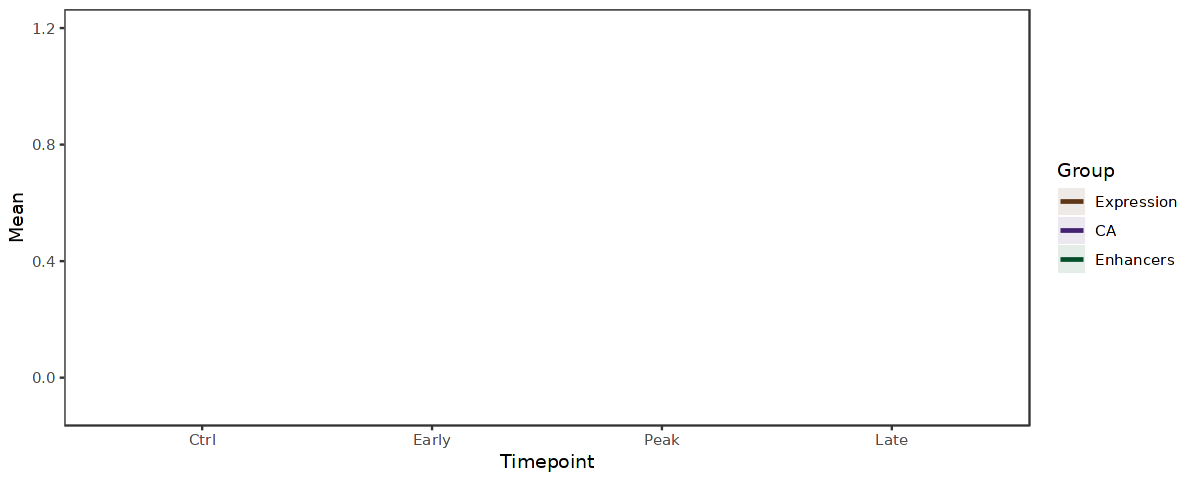

In [693]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 2

In [694]:
highest_cat <- "Early"

In [695]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [696]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [697]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [698]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [699]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [700]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


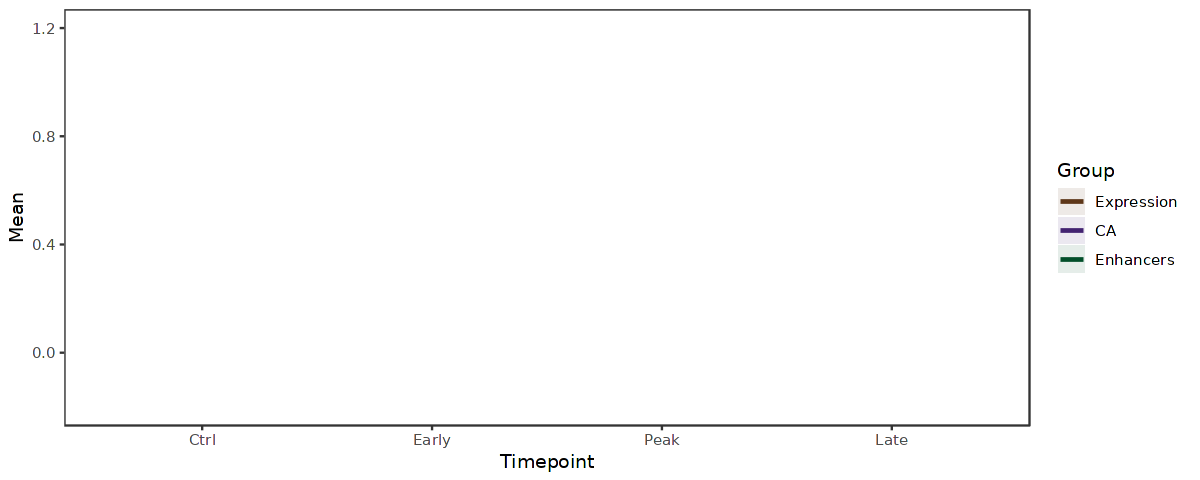

In [701]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 3

In [702]:
highest_cat <- "Peak"

In [703]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [704]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [705]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [706]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [707]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [708]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

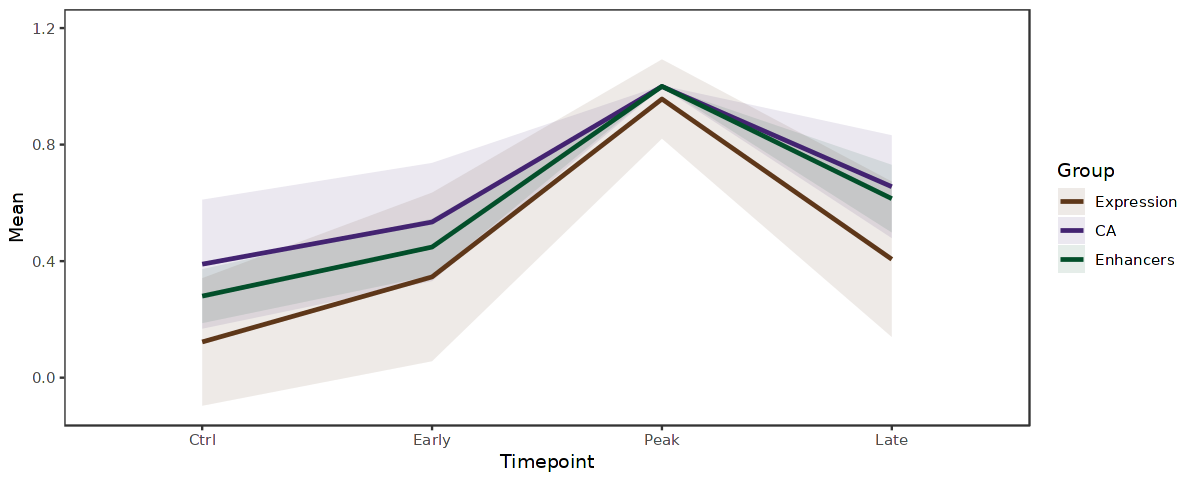

In [709]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 4

In [710]:
highest_cat <- "Late"

In [711]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [712]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [713]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [714]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [715]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [716]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


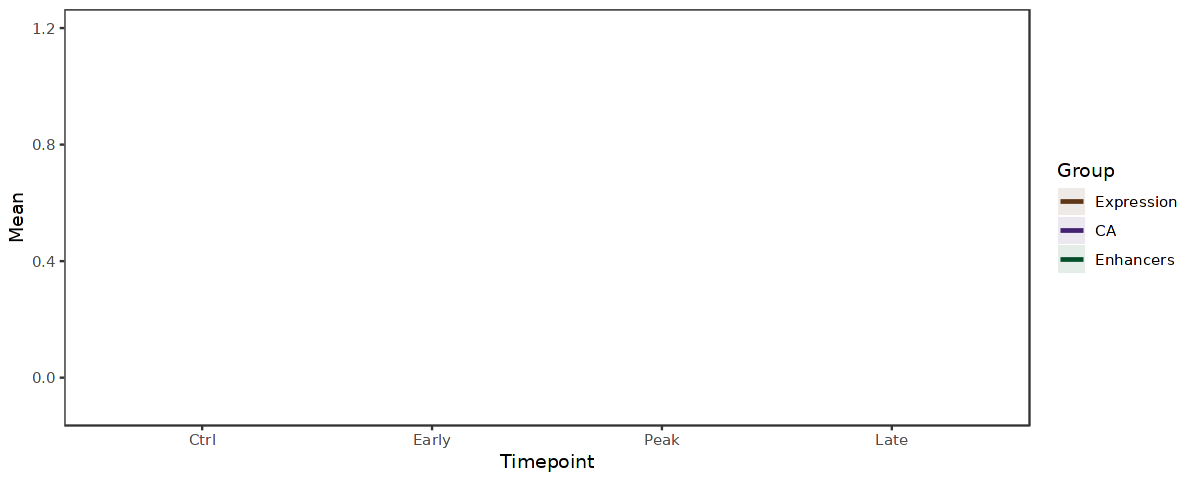

In [717]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 1

In [718]:
highest_cat <- "Ctrl"
second_highest_cat <- "Early"

In [719]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [720]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [721]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [722]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [723]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [724]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [725]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [726]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [727]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


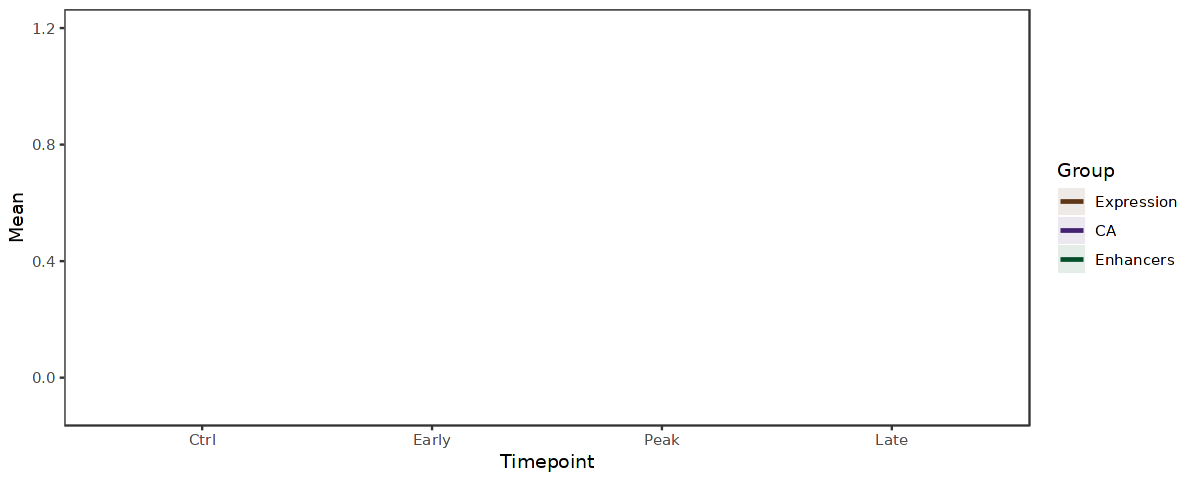

In [728]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 2

In [729]:
highest_cat <- "Ctrl"
second_highest_cat <- "Peak"

In [730]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [731]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [732]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [733]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [734]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [735]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [736]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [737]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [738]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


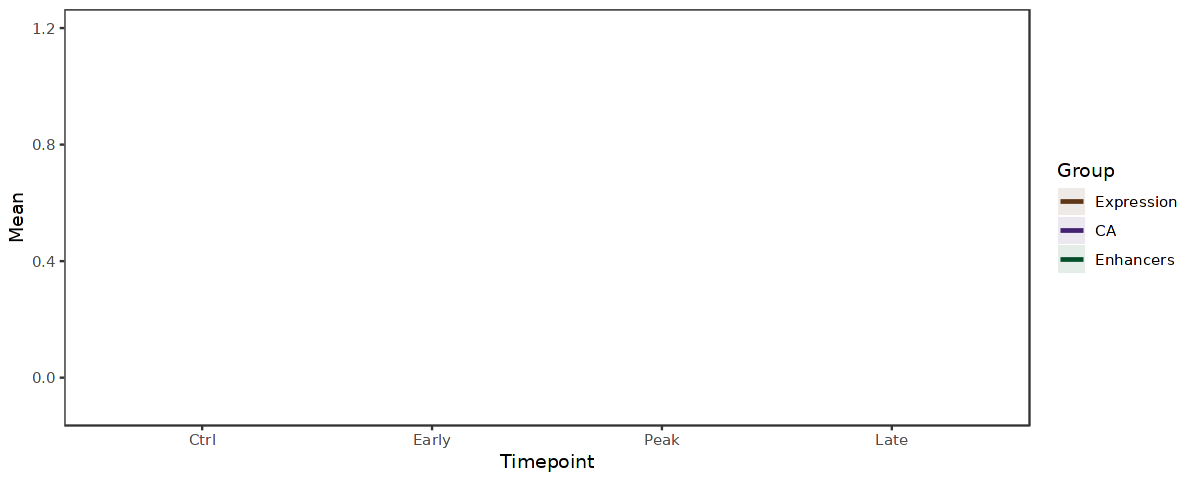

In [739]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 3

In [740]:
highest_cat <- "Ctrl"
second_highest_cat <- "Late"

In [741]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [742]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [743]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [744]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [745]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [746]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [747]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [748]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [749]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


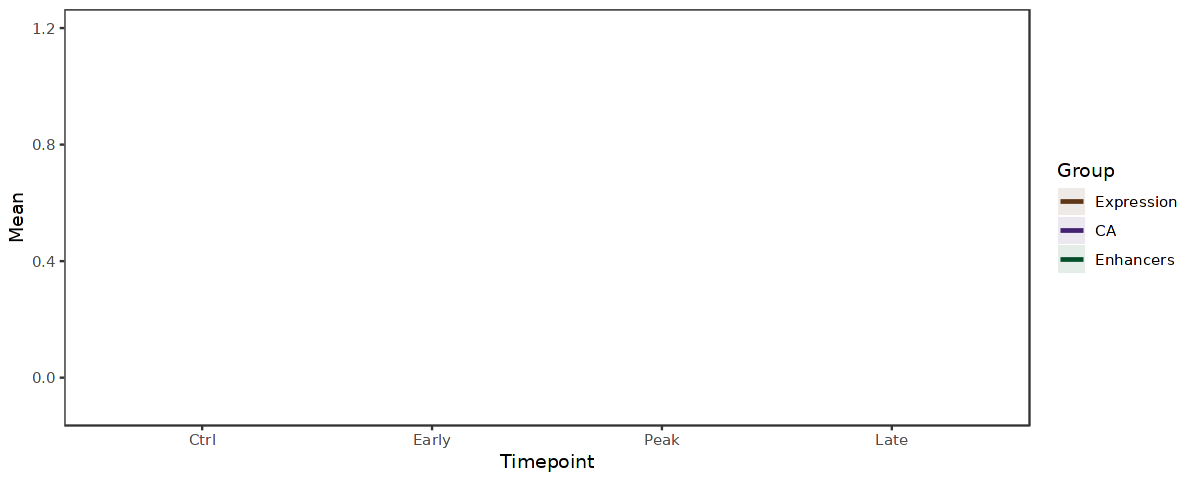

In [750]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 4

In [751]:
highest_cat <- "Early"
second_highest_cat <- "Ctrl"

In [752]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [753]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [754]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [755]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [756]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [757]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [758]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [759]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [760]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


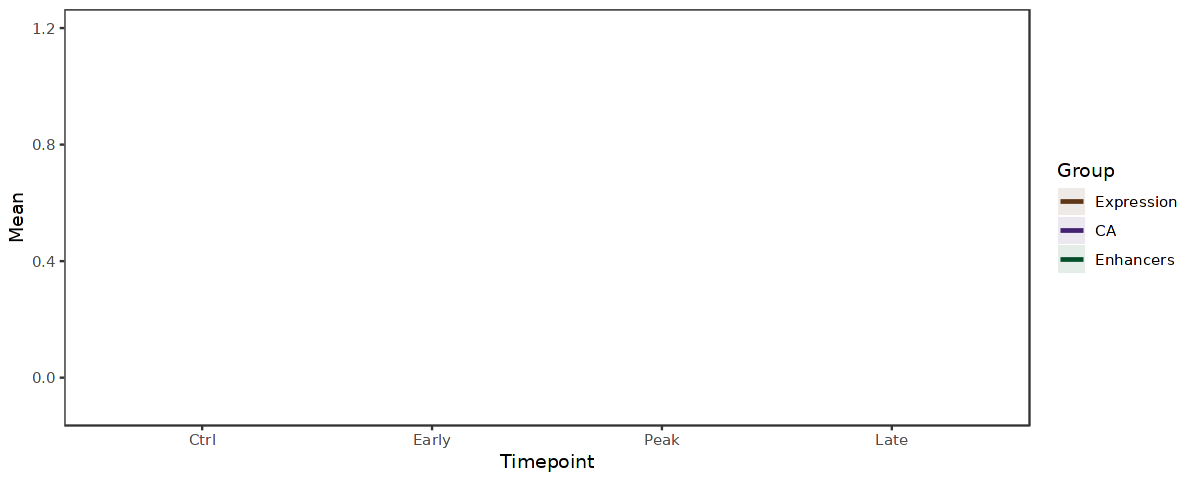

In [761]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 5

In [762]:
highest_cat <- "Early"
second_highest_cat <- "Peak"

In [763]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [764]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [765]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [766]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [767]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [768]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [769]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [770]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [771]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


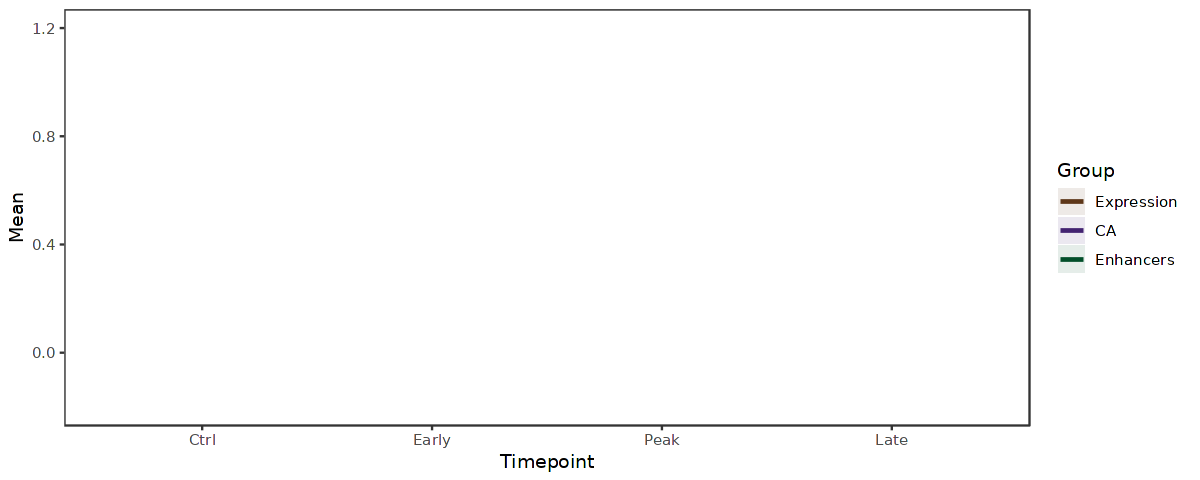

In [772]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 6

In [773]:
highest_cat <- "Early"
second_highest_cat <- "Late"

In [774]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [775]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [776]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [777]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [778]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [779]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [780]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [781]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [782]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


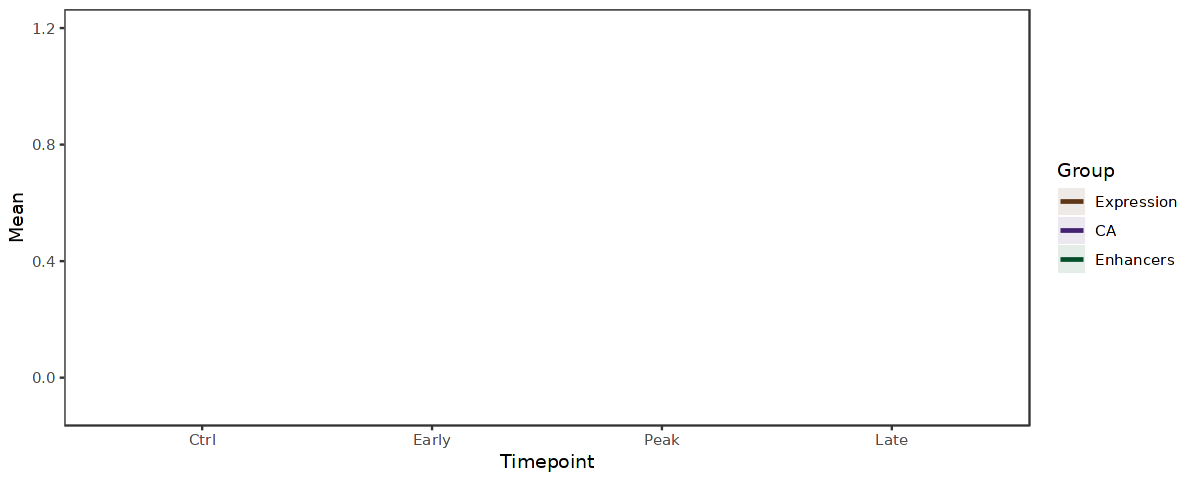

In [783]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 7

In [784]:
highest_cat <- "Peak"
second_highest_cat <- "Ctrl"

In [785]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [786]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [787]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [788]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [789]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [790]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [791]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [792]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [793]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


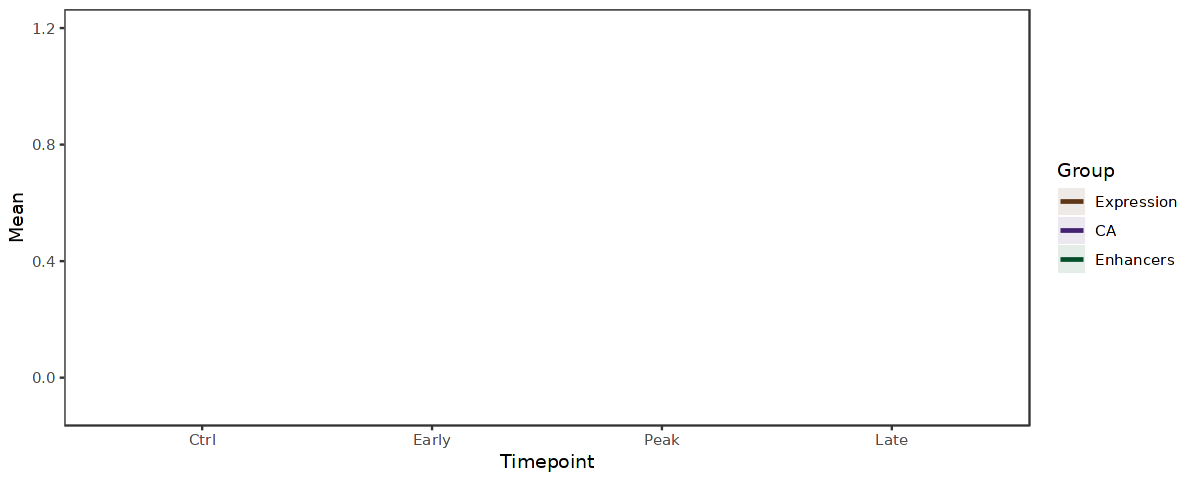

In [794]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 8

In [795]:
highest_cat <- "Peak"
second_highest_cat <- "Early"

In [796]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [797]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [798]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [799]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [800]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [801]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [802]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [803]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [804]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

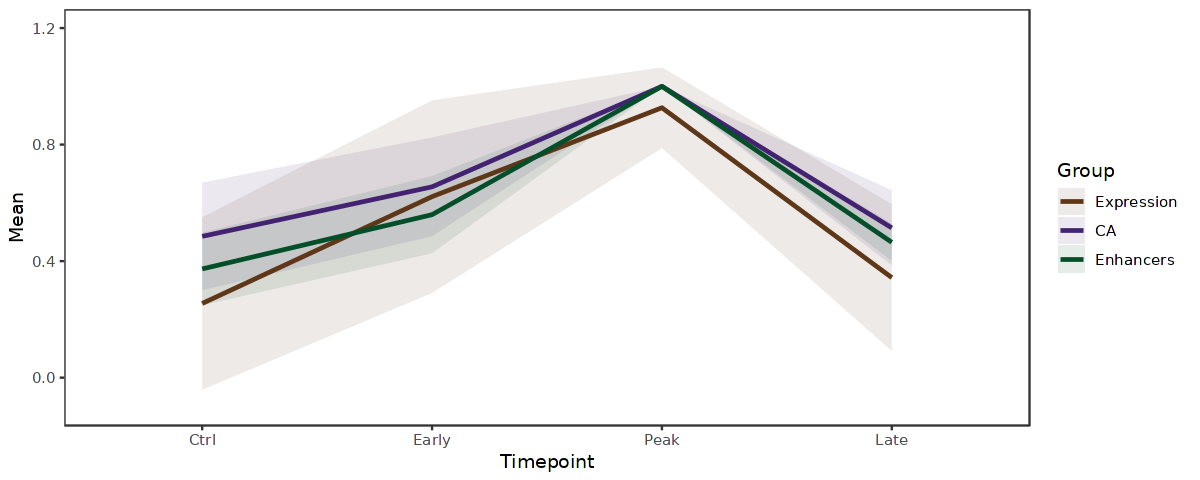

In [805]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 9

In [806]:
highest_cat <- "Peak"
second_highest_cat <- "Late"

In [807]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [808]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [809]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [810]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [811]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [812]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [813]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [814]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [815]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

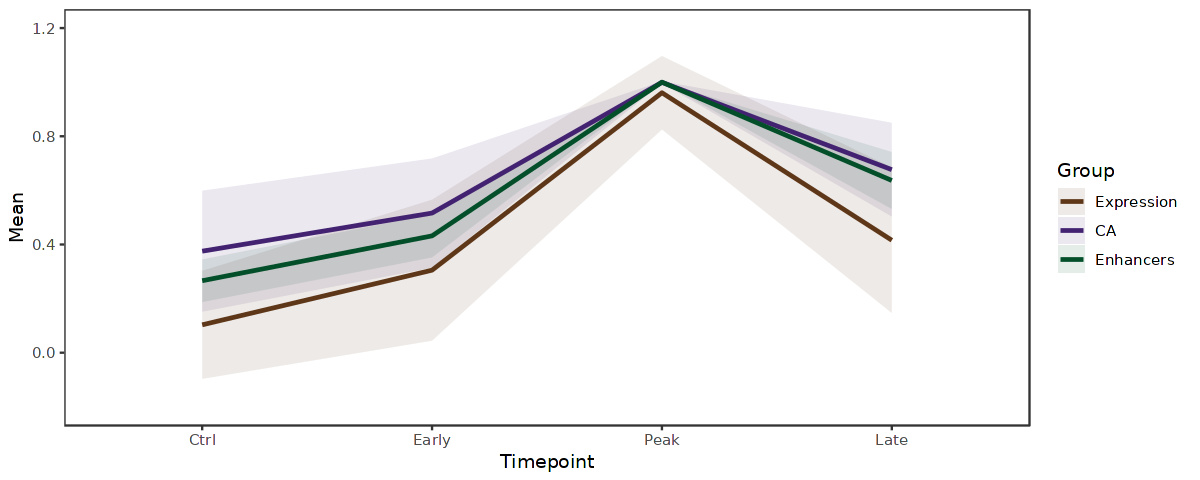

In [816]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 10

In [817]:
highest_cat <- "Late"
second_highest_cat <- "Ctrl"

In [818]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [819]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [820]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [821]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [822]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [823]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [824]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [825]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [826]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


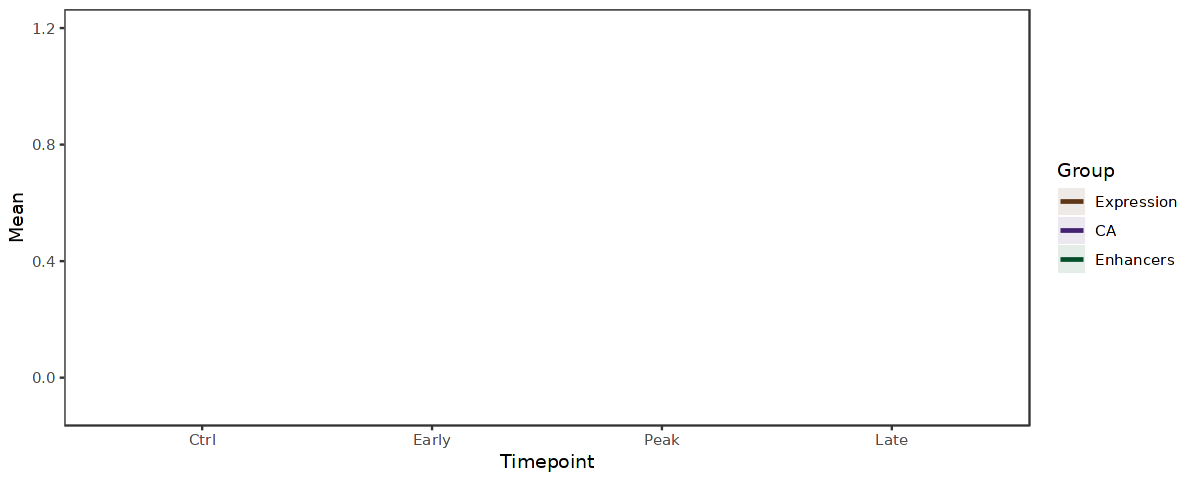

In [827]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 11

In [828]:
highest_cat <- "Late"
second_highest_cat <- "Early"

In [829]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [830]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [831]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [832]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [833]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [834]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [835]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [836]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [837]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


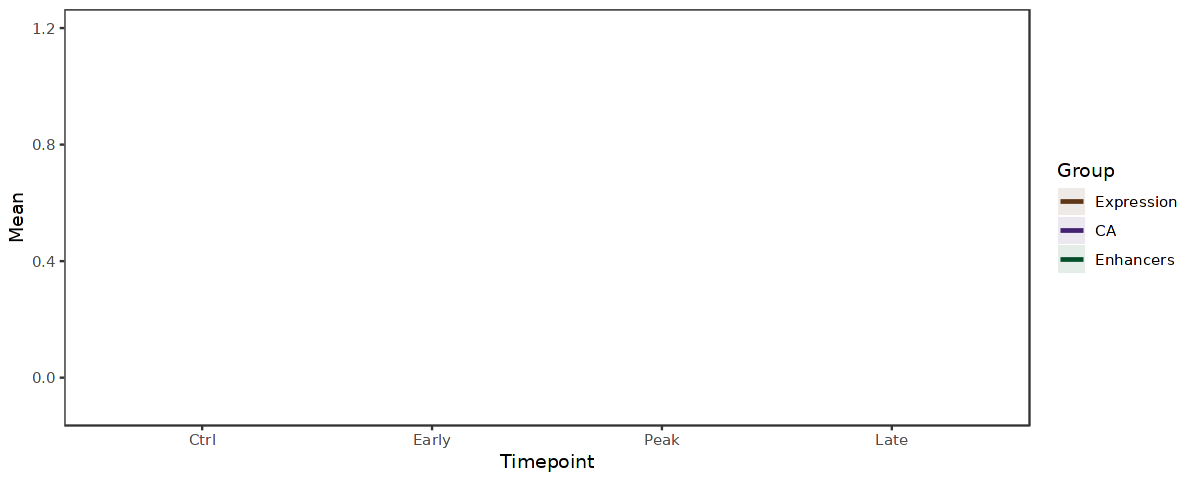

In [838]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 12

In [839]:
highest_cat <- "Late"
second_highest_cat <- "Peak"

In [840]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [841]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [842]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [843]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [844]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [845]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [846]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [847]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [848]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


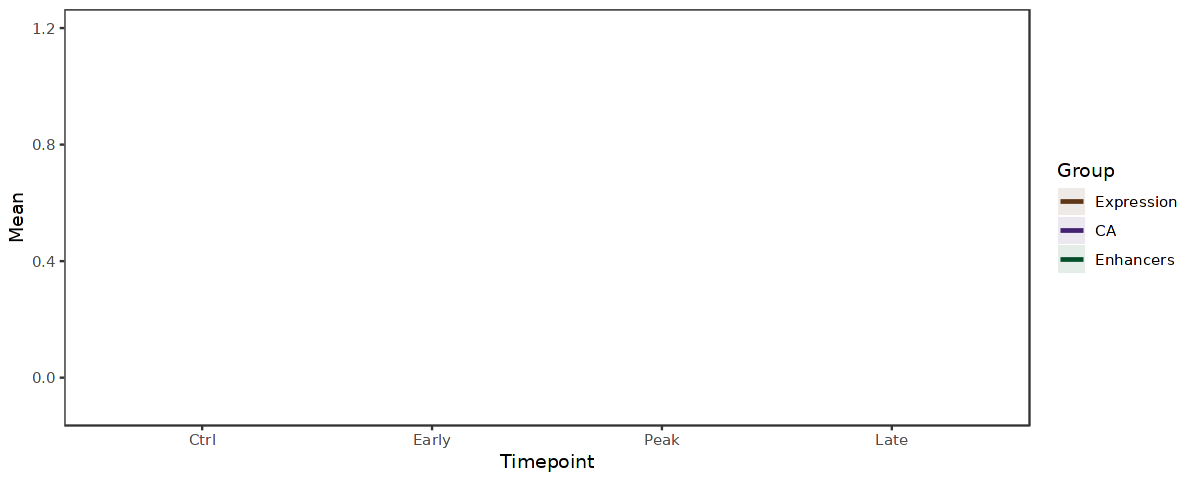

In [849]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

#### 3.1.3 OPC

In [850]:
cluster_choice = "OPC"

In [851]:
gene_list <- unique(unlist(DVDORC[[cluster_choice]]))

In [852]:
tmp <- subset(MORNAATACCOL, subset = cellType_OL_merge == cluster_choice)

In [853]:
table_sample_low <- table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,] <= 5]
table_sample_low

sample_keep <- names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)]

EarlyCtrl2   EarlyCtrl3    PeakCtrl3 EarlyFemale3 
           1            2            4            1

In [854]:
#Remove sample with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident %in% (names(table_sample_low)),])
tmp <- subset(tmp, cells=keepcells)

In [855]:
table_group_low <-table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,] <= 30]
table_group_low

group_keep <- names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)]

named integer(0)

In [856]:
#Remove timepoint with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident_merge %in% (names(table_group_low)),])
tmp <- subset(tmp, cells=keepcells)

In [857]:
tmp$orig.ident <- factor(x = tmp$orig.ident, levels = names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)])
tmp$orig.ident_merge <- factor(x = tmp$orig.ident_merge, levels = names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)])

In [858]:
DefaultAssay(tmp) <- "GenePromAcc"

In [859]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


In [860]:
DefaultAssay(tmp) <- "RNA"

In [861]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|


##### 3.1.3.1 Heatmaps

In [862]:
Idents(object = tmp) <- "orig.ident_merge"

In [863]:
sample_names <- levels(tmp$orig.ident_merge)

In [864]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [865]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [866]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [867]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [868]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [869]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [870]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [871]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [872]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [873]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [874]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [875]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [876]:
saveRDS(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".rds"))

In [877]:
write.csv(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".csv"), row.names=TRUE)
write.csv(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".csv"), row.names=TRUE)
write.csv(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".csv"), row.names=TRUE)

In [878]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [879]:
tmp_mat <- matrix
colnames(tmp_mat) <- c("A","B","C","D")
correct_order <- unlist(order_heatmap_genes(as.data.frame(tmp_mat)))

In [880]:
matrix <- matrix[correct_order,]

In [881]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [882]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

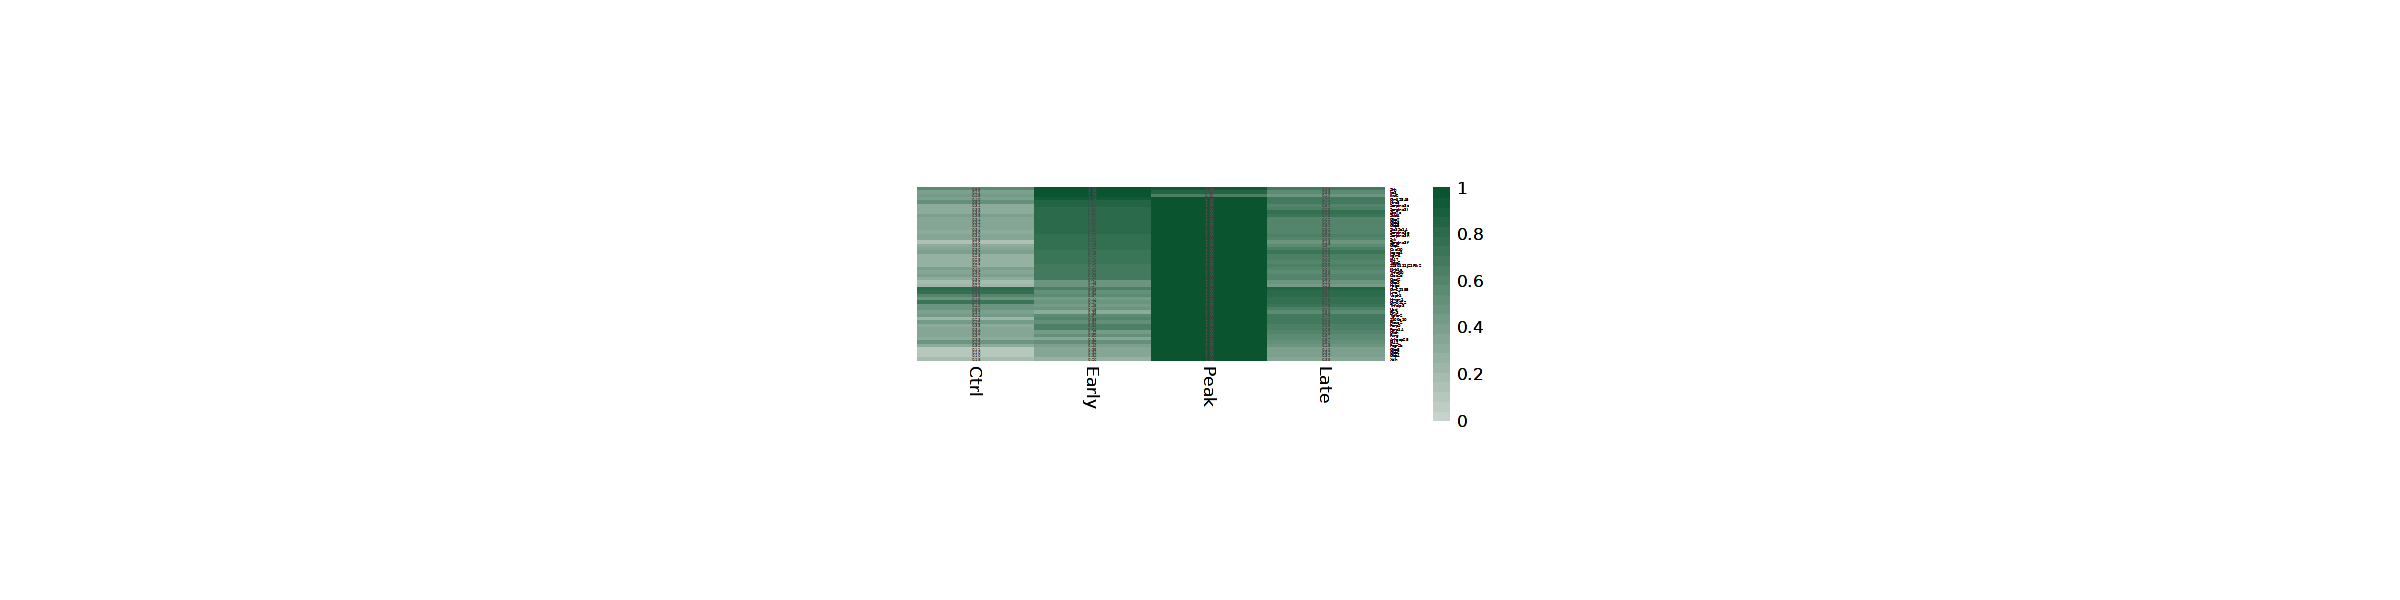

In [883]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [884]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [885]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [886]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [887]:
matrix <- tmp_sample_markers_DORCs_mean

In [888]:
matrix <- matrix[correct_order,]

In [889]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

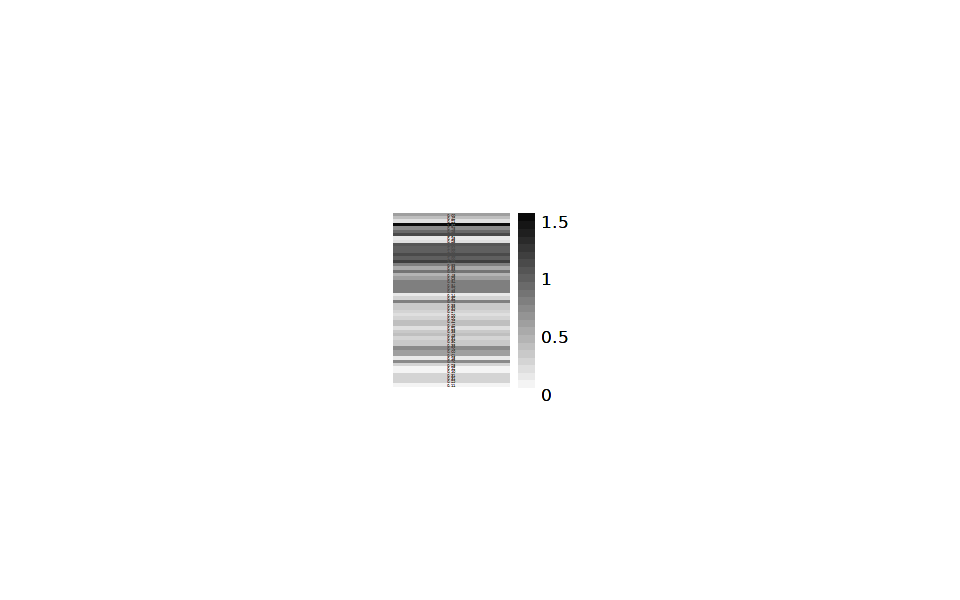

In [890]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [891]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [892]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [893]:
matrix <- matrix[correct_order,]

In [894]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

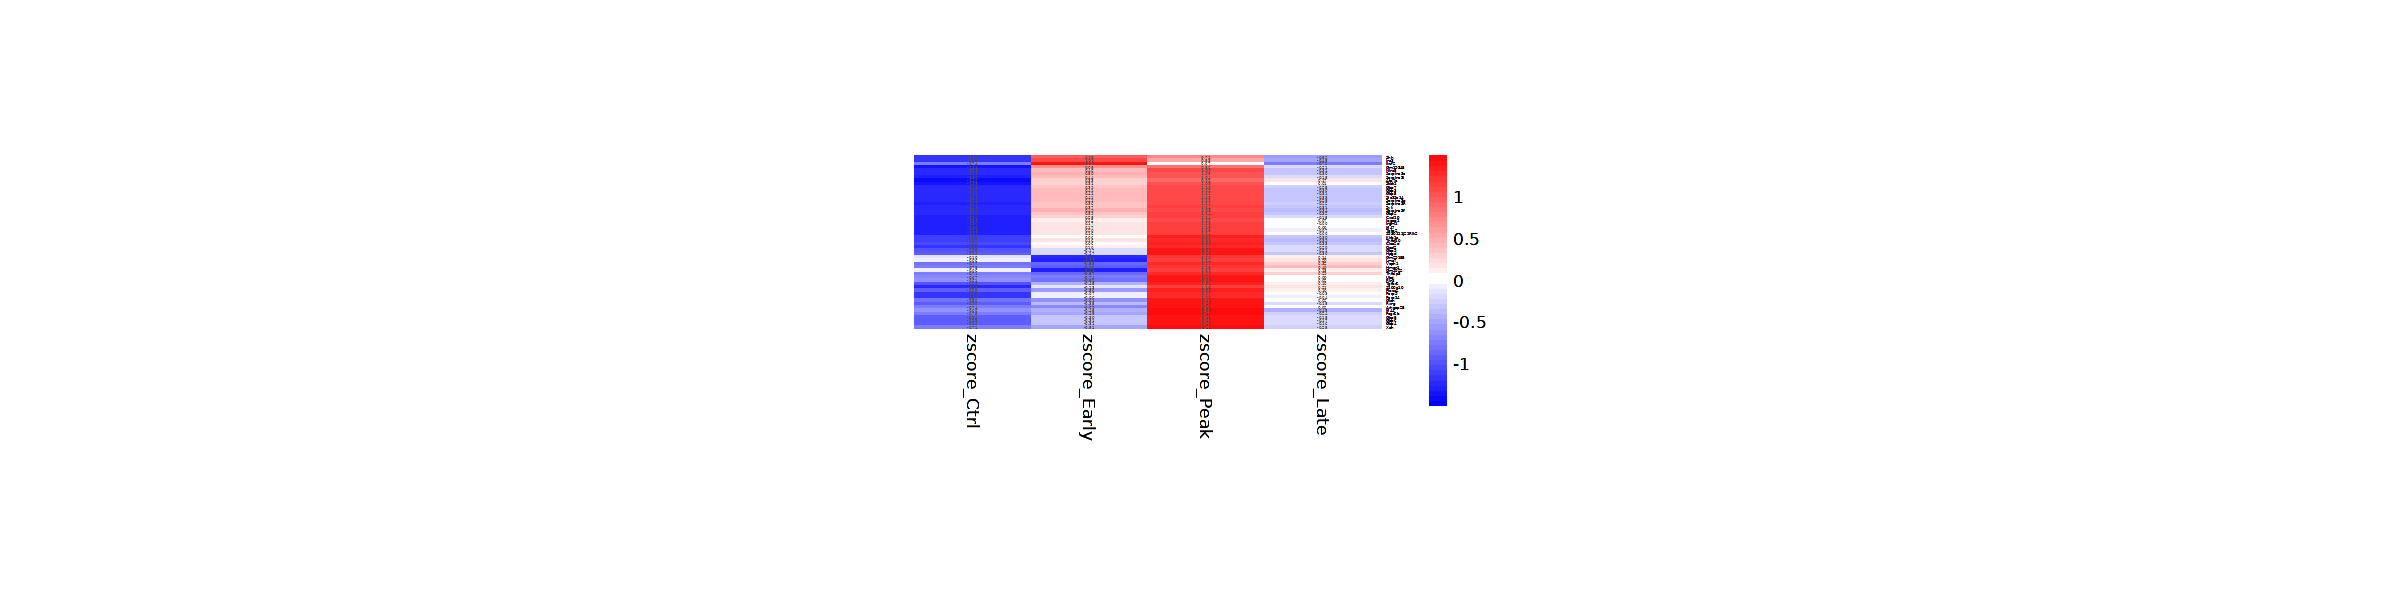

In [895]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [896]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [897]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [898]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [899]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [900]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [901]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

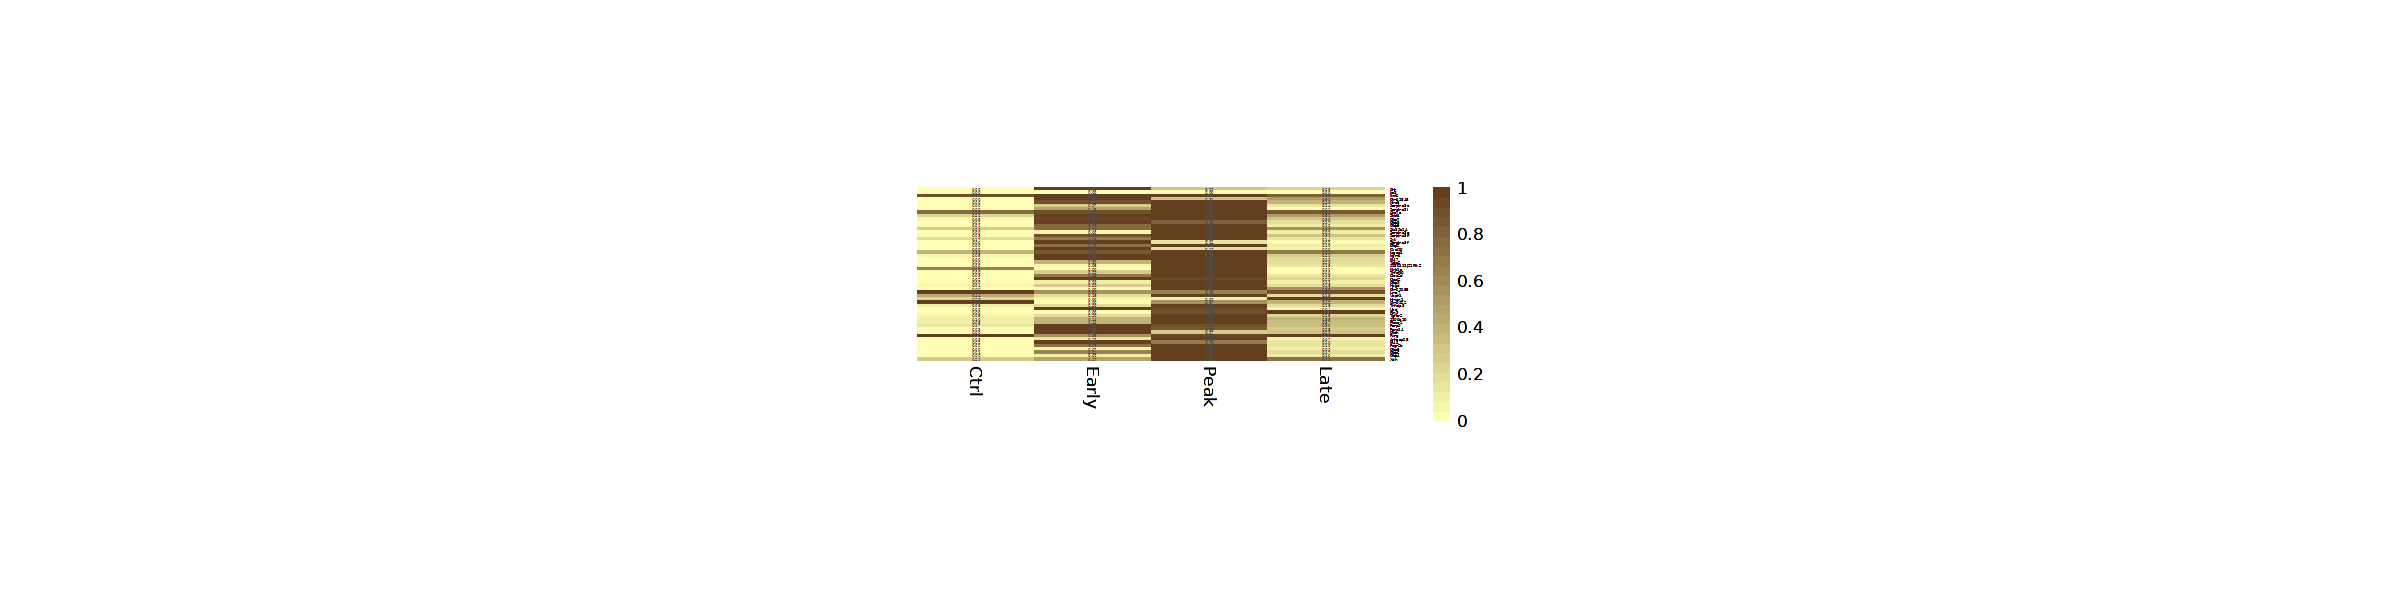

In [902]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [903]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [904]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [905]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [906]:
matrix <- tmp_sample_markers_RNA_mean

In [907]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [908]:
matrix <- matrix[correct_order,]

In [909]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

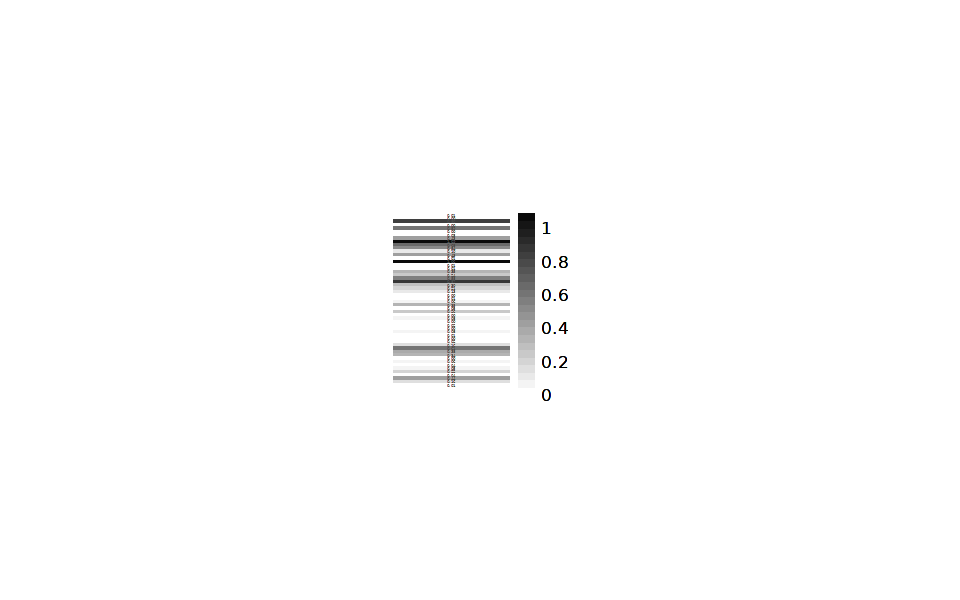

In [910]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [911]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [912]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [913]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [914]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [915]:
matrix <- matrix[correct_order,]

In [916]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

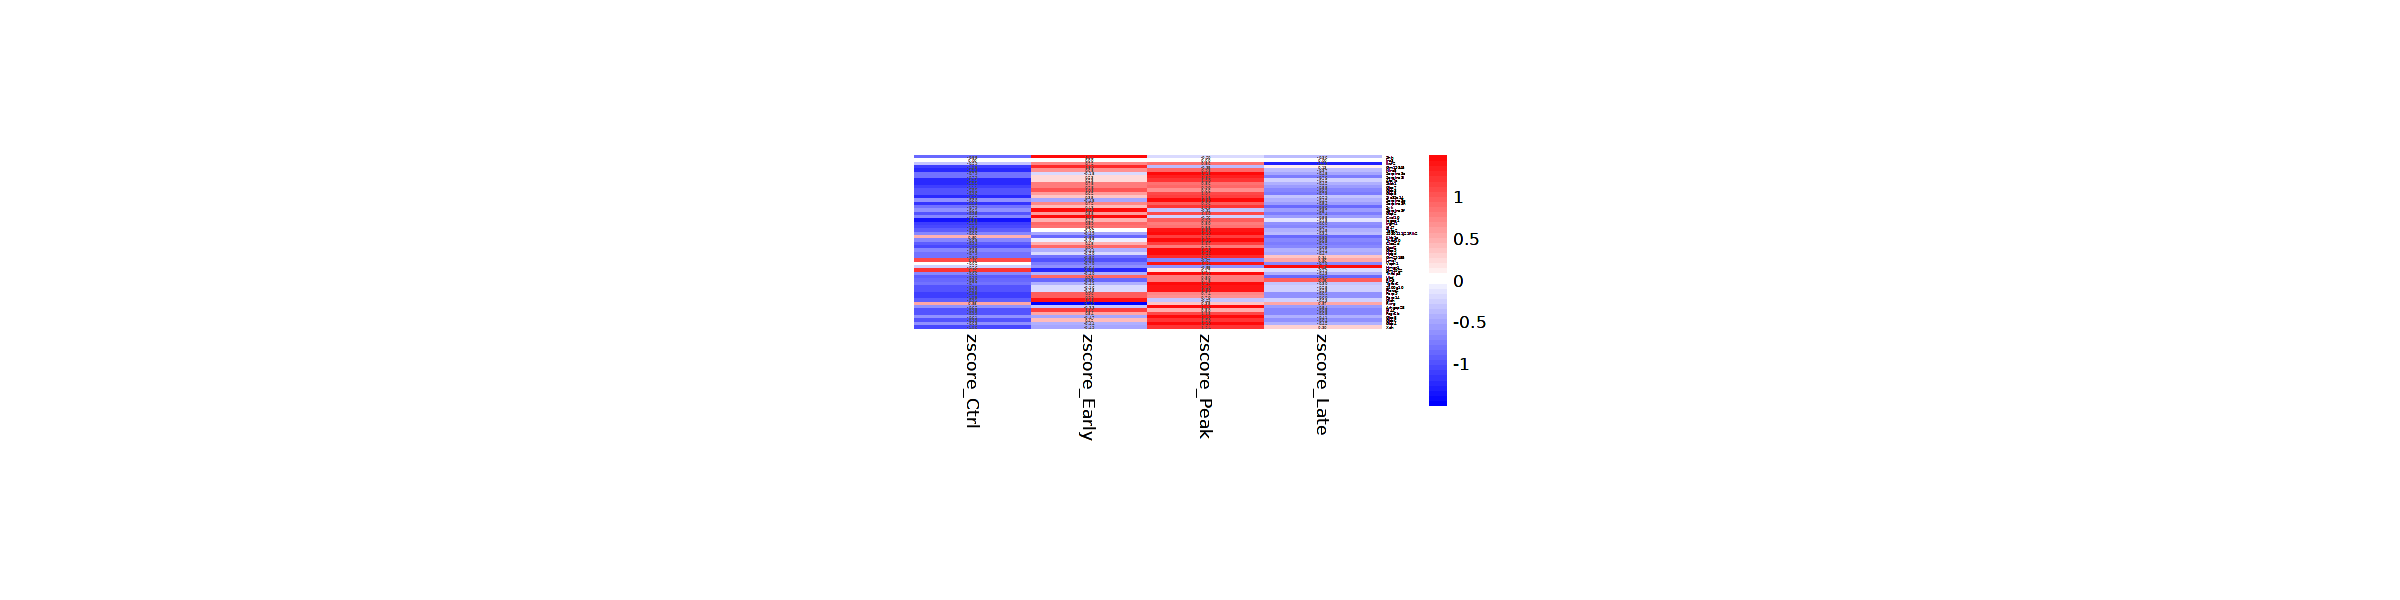

In [917]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [918]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [919]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [920]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [921]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [922]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [923]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

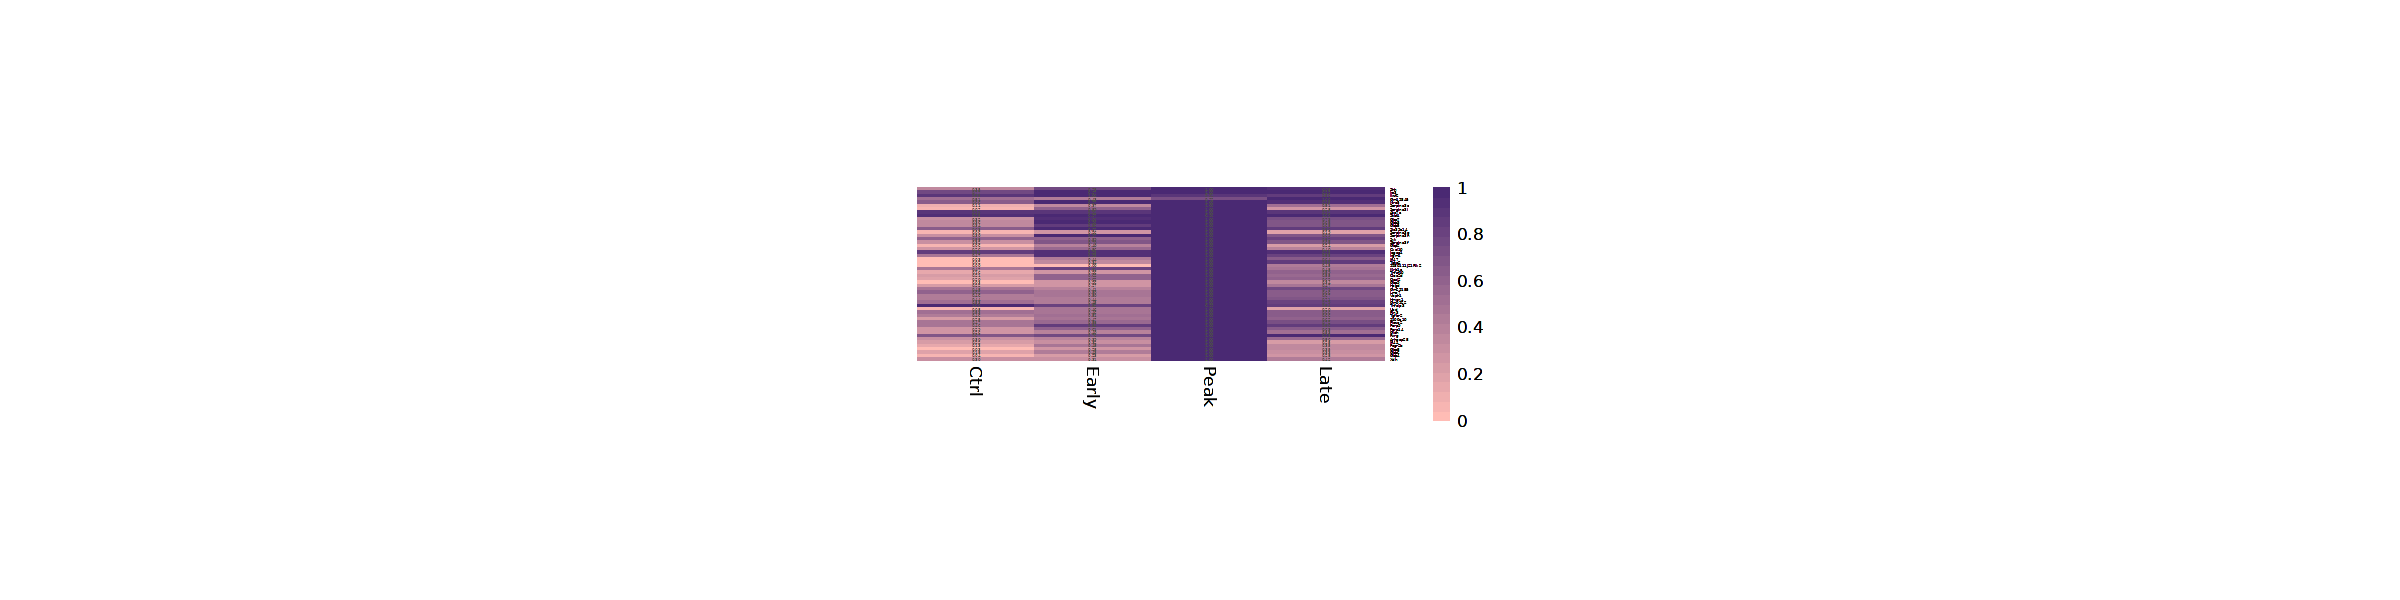

In [924]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [925]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [926]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [927]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [928]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [929]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [930]:
matrix <- matrix[correct_order,]

In [931]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

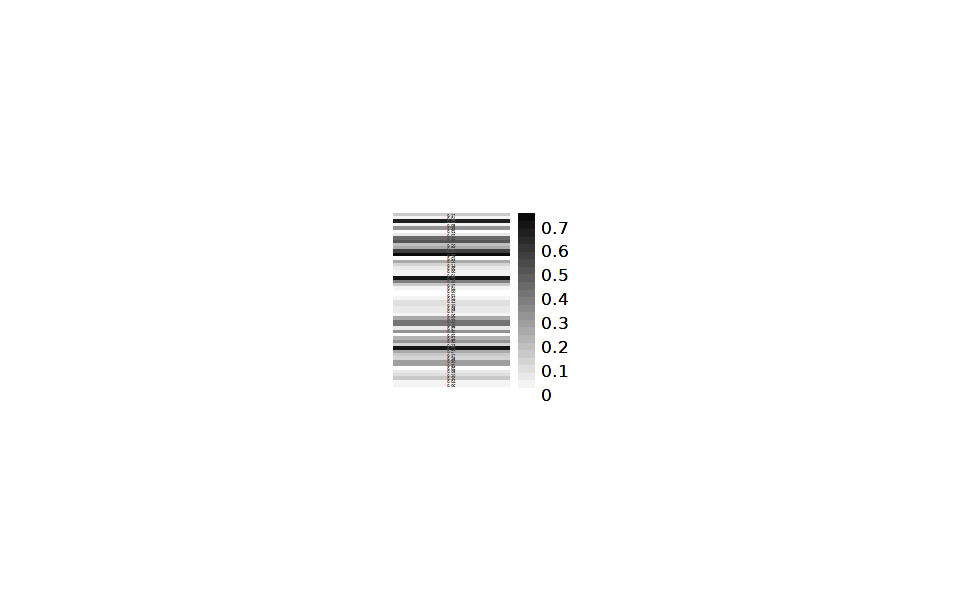

In [932]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [933]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [934]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [935]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [936]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [937]:
matrix <- matrix[correct_order,]

In [938]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

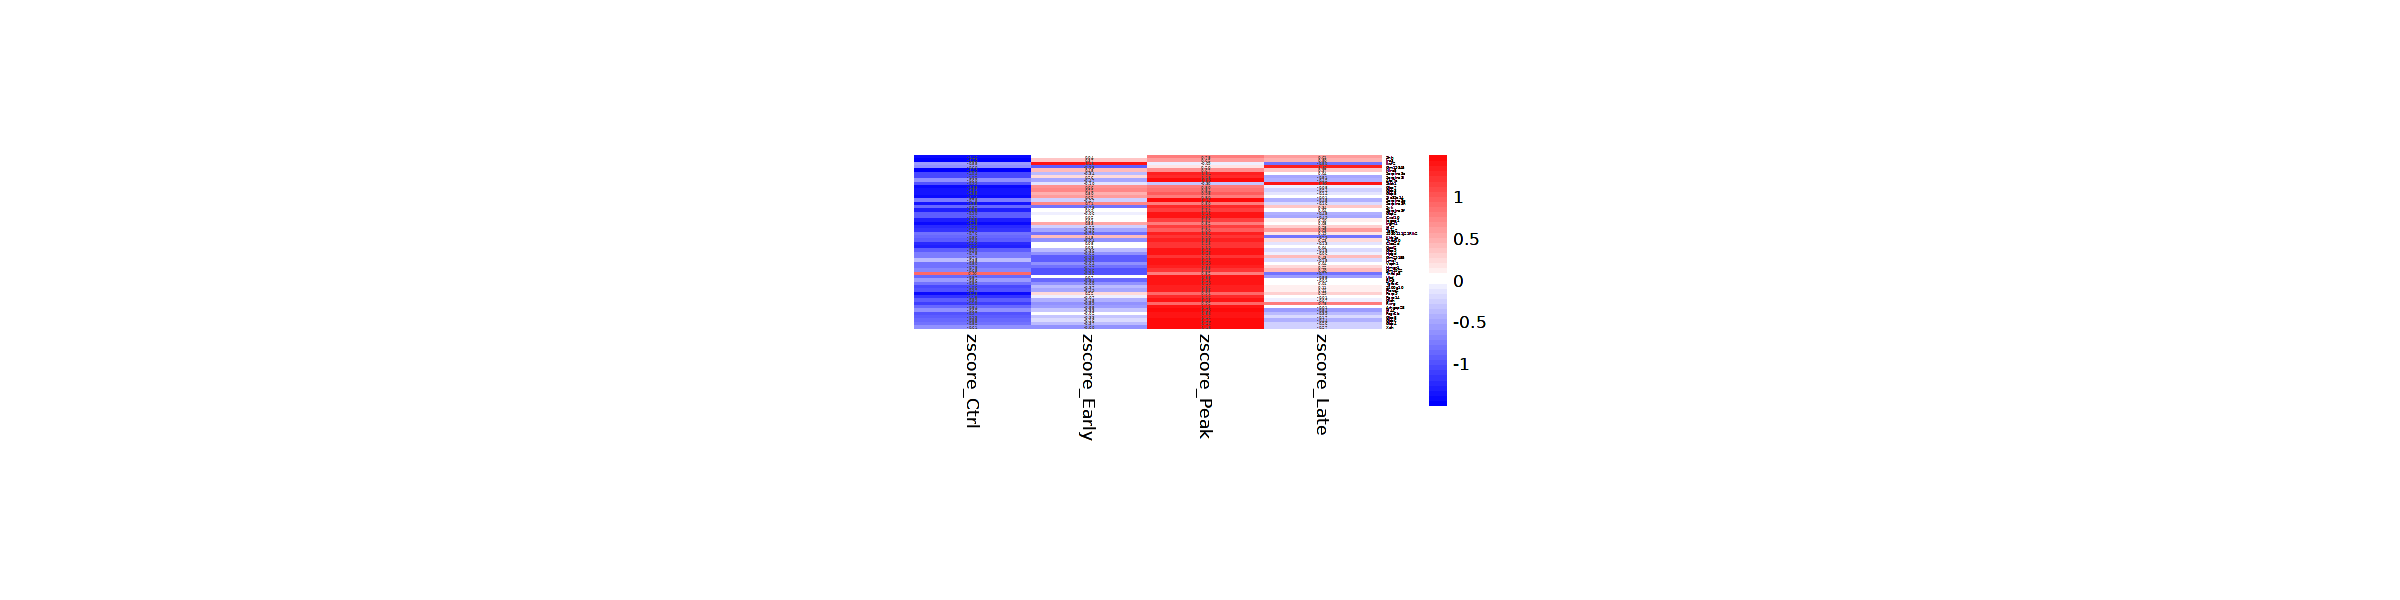

In [939]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [940]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [941]:
Idents(object = tmp) <- "orig.ident"

In [942]:
sample_names <- levels(tmp$orig.ident)

In [943]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [944]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [945]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [946]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [947]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [948]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [949]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [950]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [951]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [952]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [953]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [954]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [955]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [956]:
matrix <- matrix[correct_order,]

In [957]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [958]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

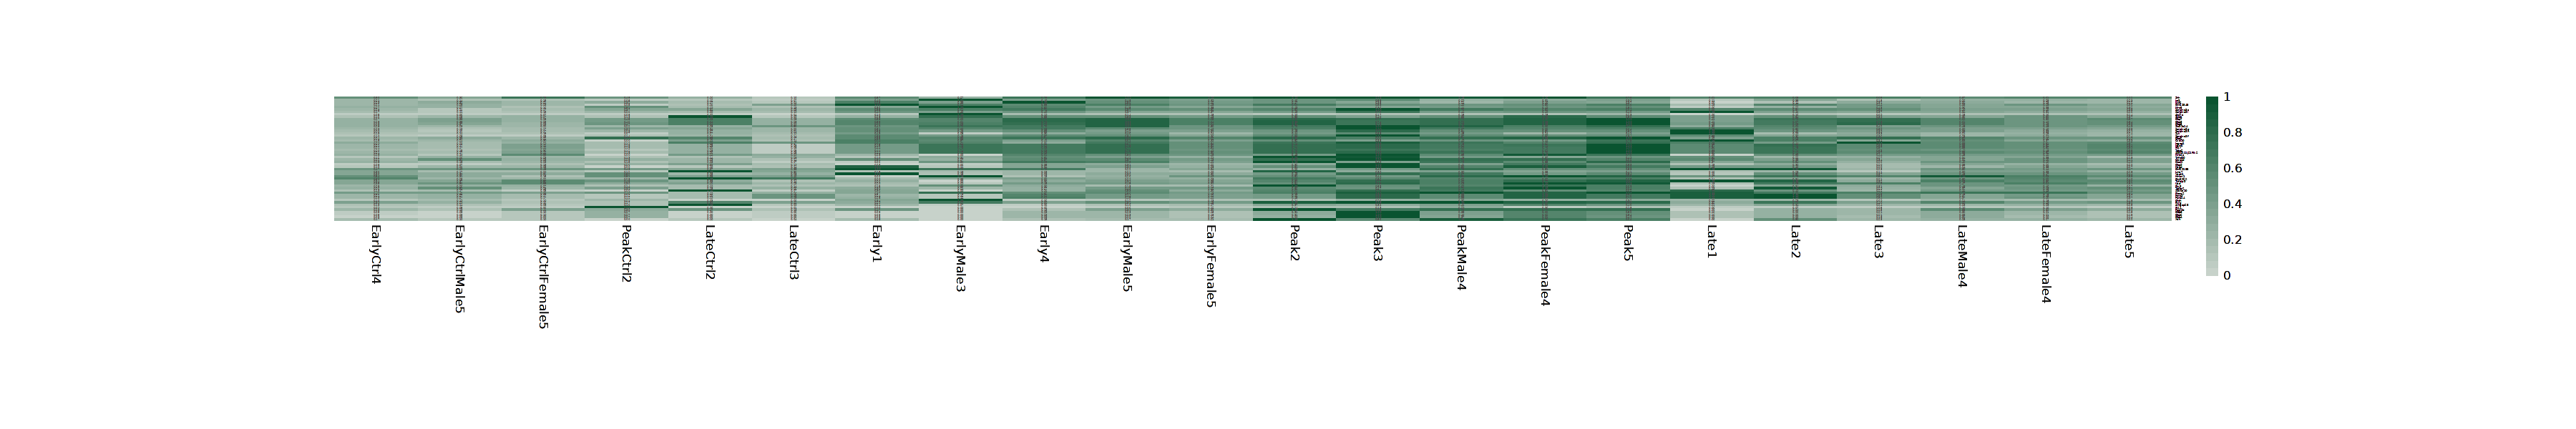

In [959]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [960]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [961]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [962]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [963]:
matrix <- tmp_sample_markers_DORCs_mean

In [964]:
matrix <- matrix[correct_order,]

In [965]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

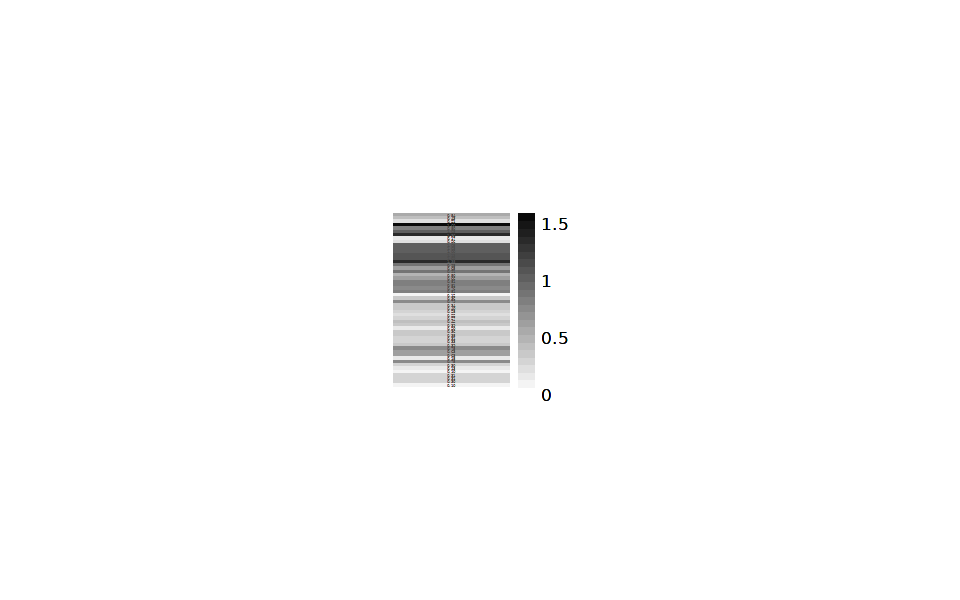

In [966]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [967]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [968]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [969]:
matrix <- matrix[correct_order,]

In [970]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

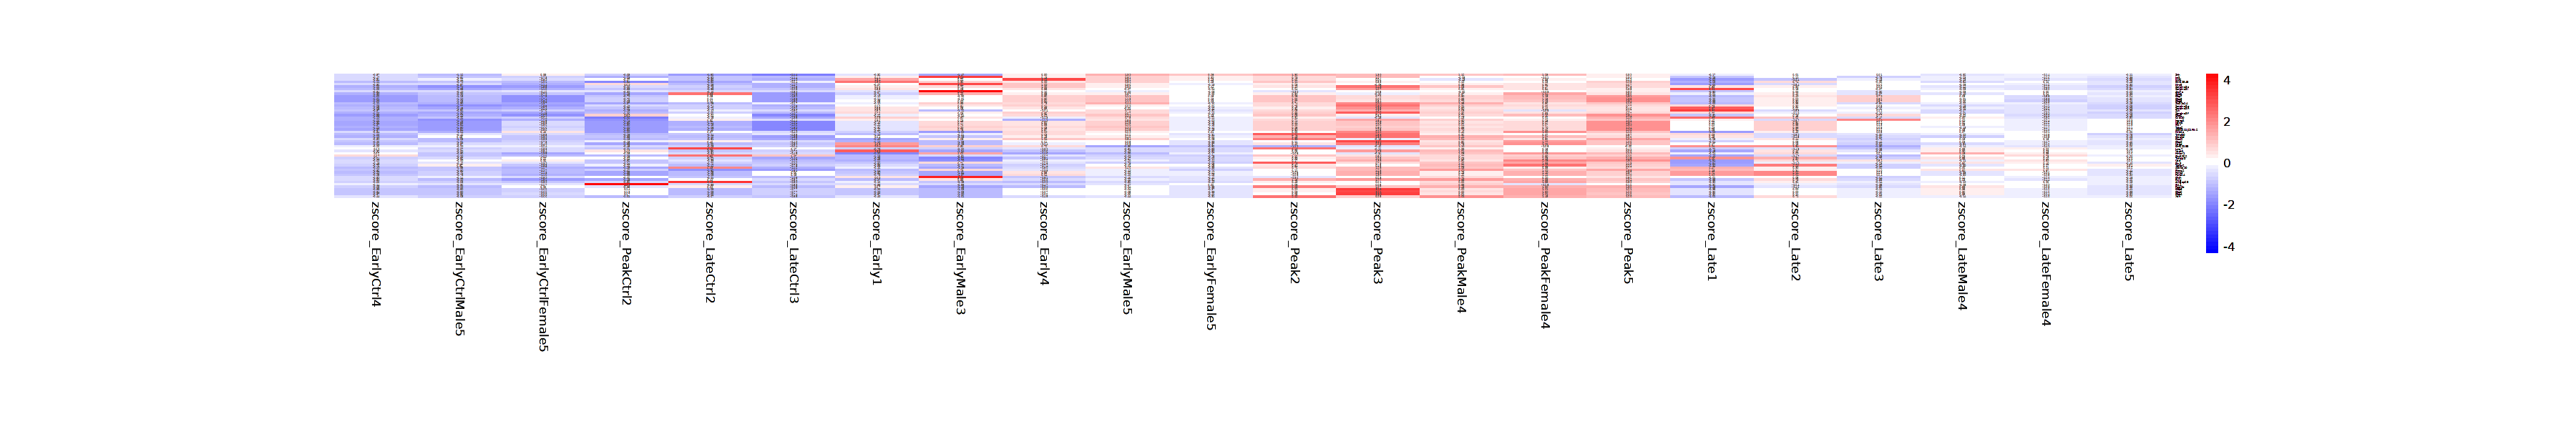

In [971]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [972]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [973]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [974]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [975]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [976]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [977]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

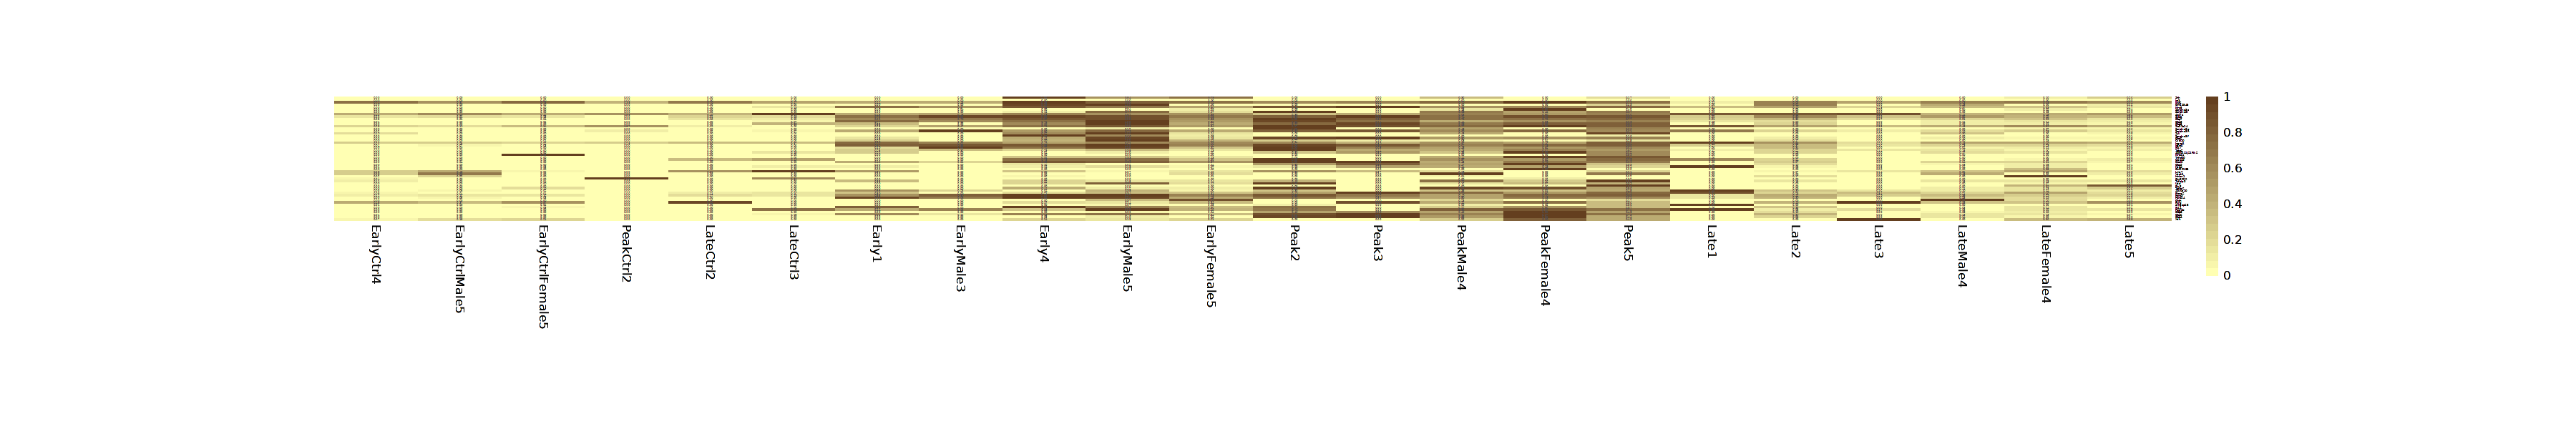

In [978]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [979]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [980]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [981]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [982]:
matrix <- tmp_sample_markers_RNA_mean

In [983]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [984]:
matrix <- matrix[correct_order,]

In [985]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

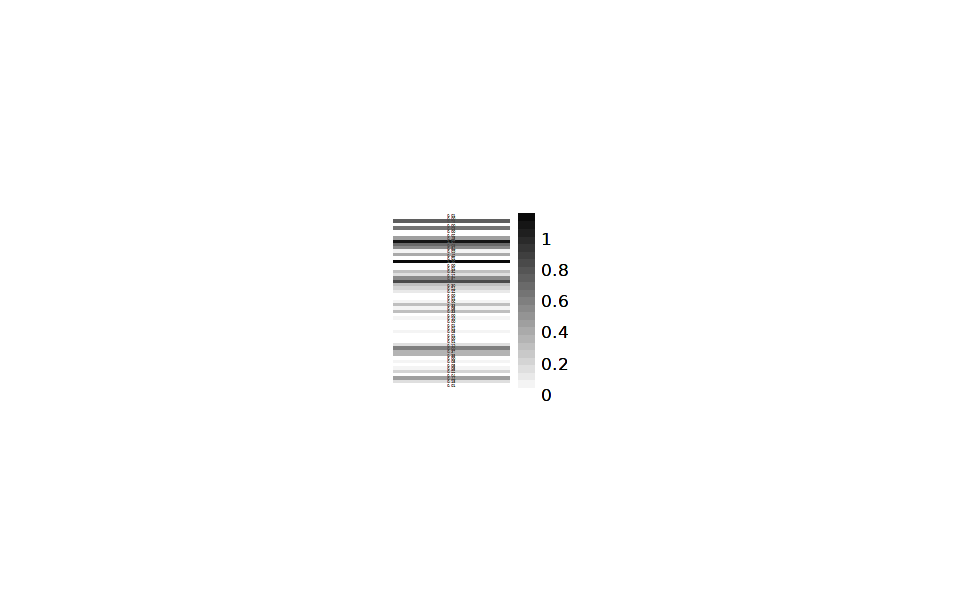

In [986]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [987]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [988]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [989]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [990]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [991]:
matrix <- matrix[correct_order,]

In [992]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

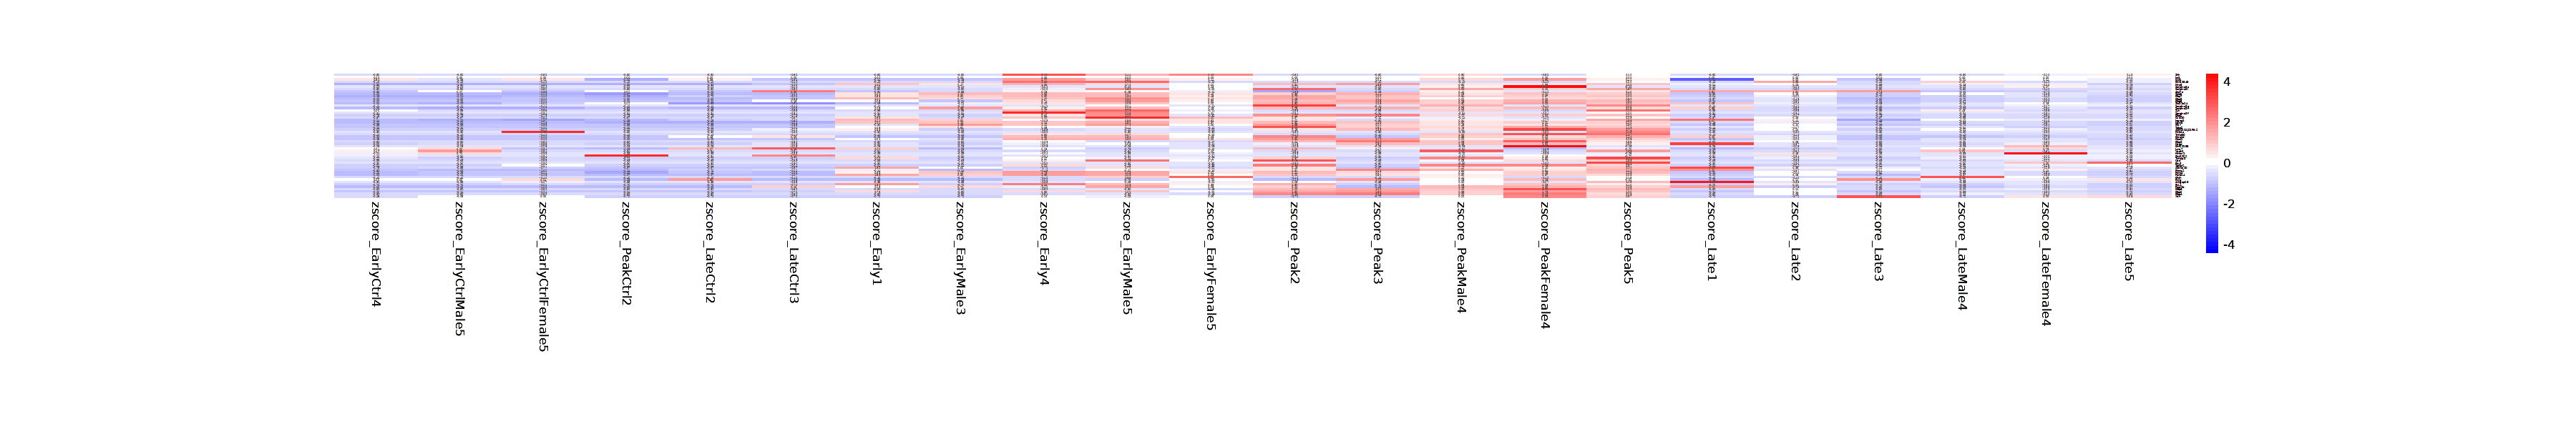

In [993]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [994]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_zscore.pdf"), width=30, height=plot_height)

png 
  2

In [995]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [996]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [997]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [998]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[correct_order,]

In [999]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

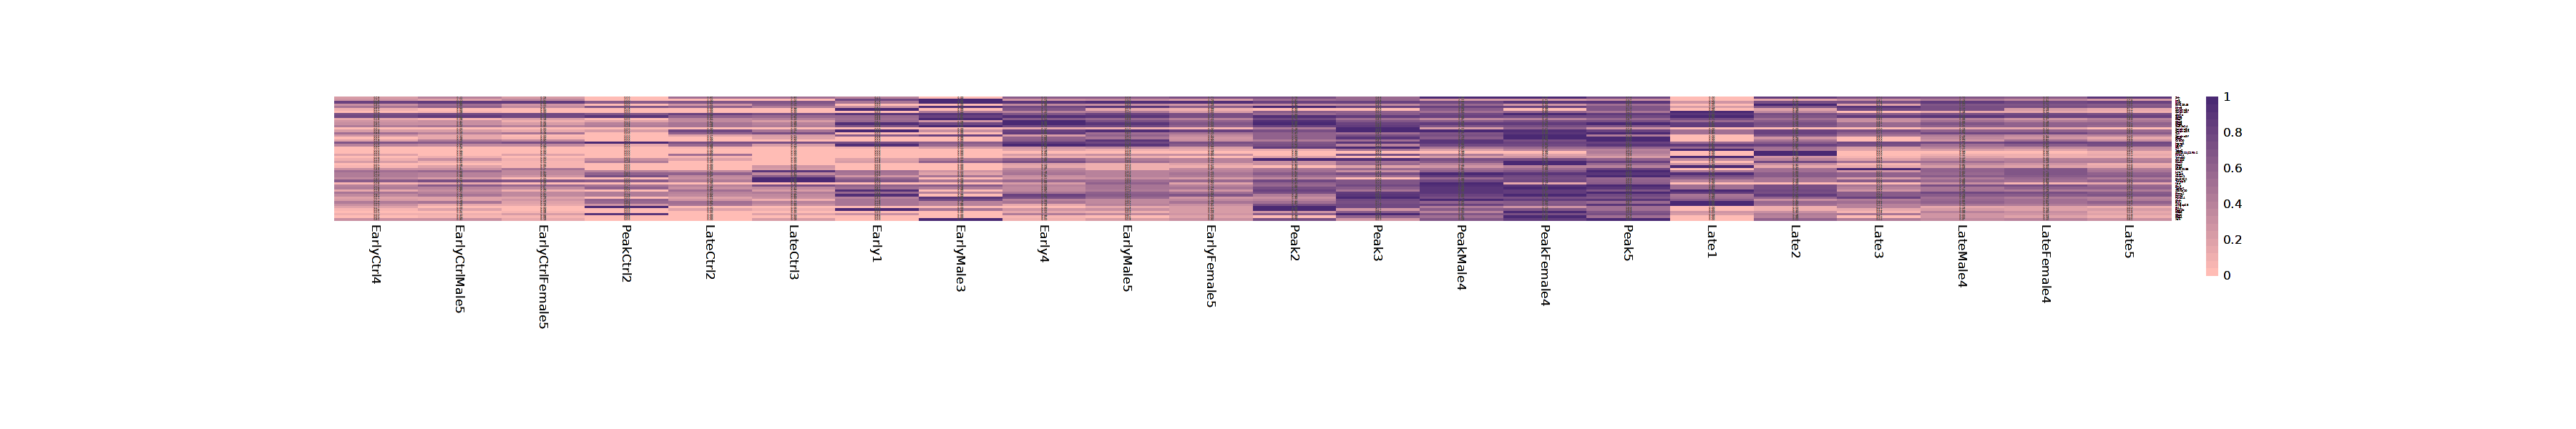

In [1000]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [1001]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep.pdf"), width=30, height=plot_height)

png 
  2

In [1002]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [1003]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [1004]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [1005]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [1006]:
matrix <- matrix[correct_order,]

In [1007]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

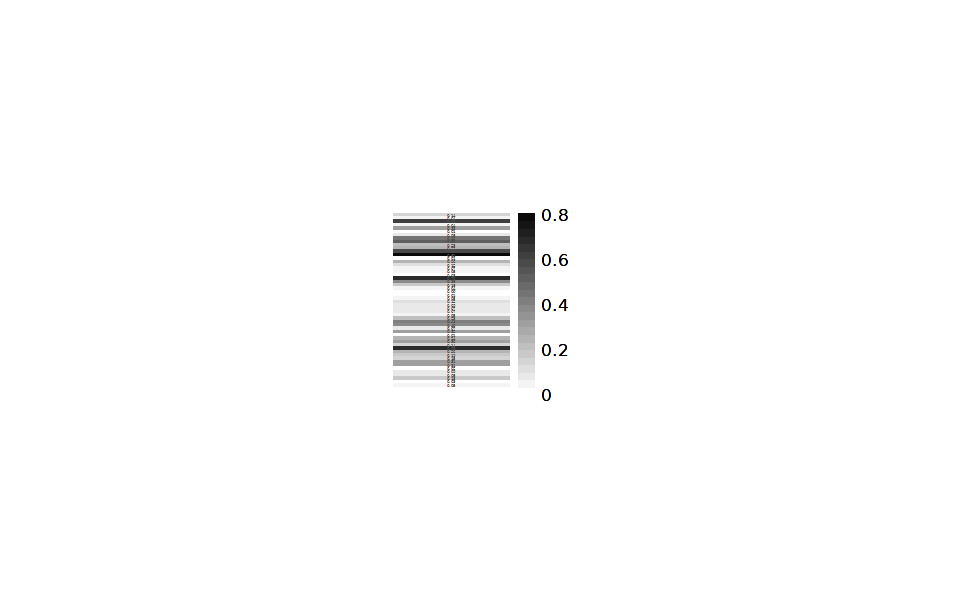

In [1008]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [1009]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [1010]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [1011]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [1012]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [1013]:
matrix <- matrix[correct_order,]

In [1014]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

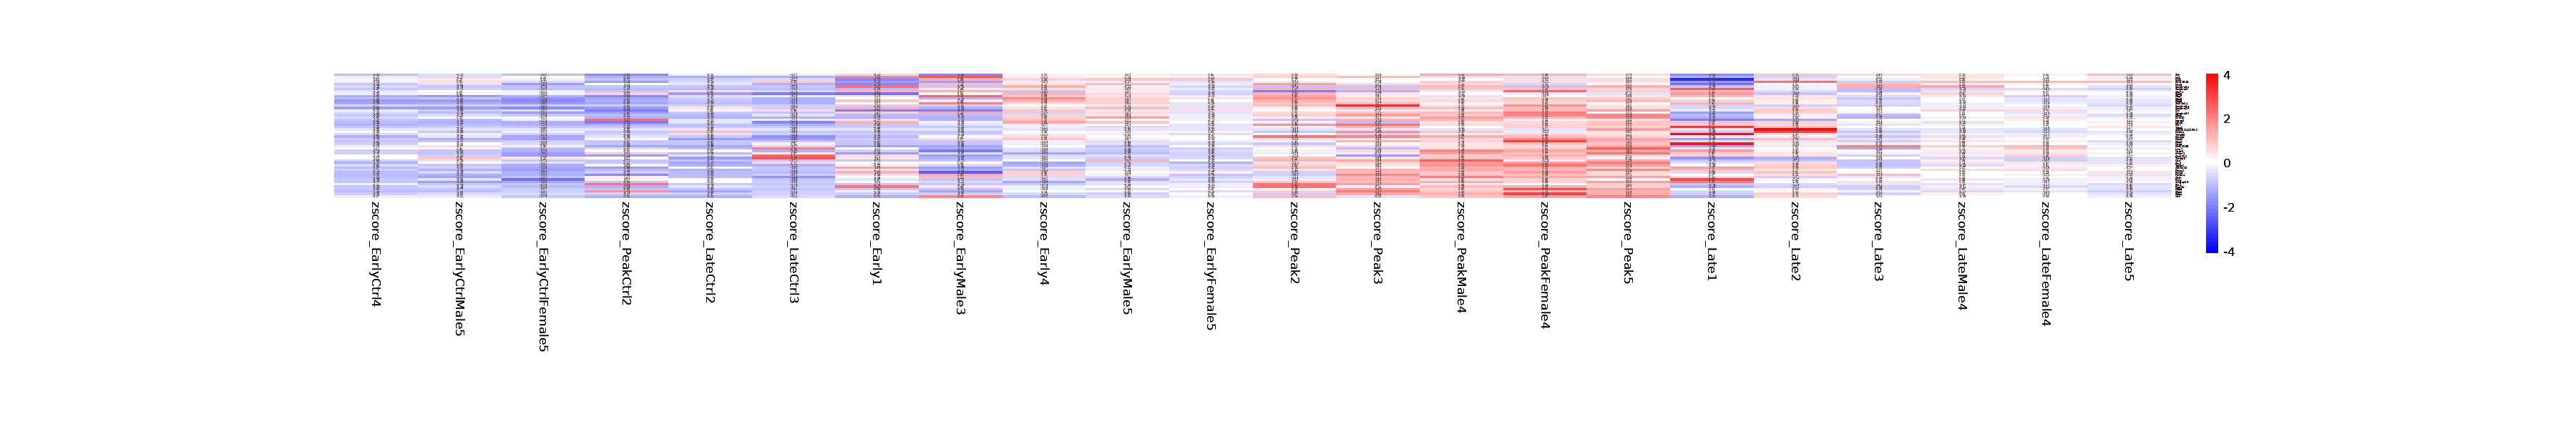

In [1015]:
options(repr.plot.width=30, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [1016]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

##### 3.1.3.2 Module dynamics

In [1017]:
Idents(object = tmp) <- "orig.ident_merge"

In [1018]:
sample_names <- levels(tmp$orig.ident_merge)

In [1019]:
tmp_sample_markers_DORCs<- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [1020]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [1021]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [1022]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [1023]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [1024]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [1025]:
tmp_sample_markers_RNA_sub <- as.data.frame(AggregateExpression(tmp, assays = "RNA", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["RNA"]]$data[gene_list_RNA,])

Centering and scaling data matrix

  |======================================================================| 100%
  |======================================================================| 100%


In [1026]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, sample_names)))

In [1027]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [1028]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [1029]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [1030]:
tmp_sample_markers_GenePromAcc_sub <- as.data.frame(AggregateExpression(tmp, assays = "GenePromAcc", group.by = "orig.ident_merge", normalization.method = "LogNormalize", scale.factor = 10000, return.seurat = TRUE)[["GenePromAcc"]]$data[gene_list_GenePromAcc,])

  |======================================================================| 100%


In [1031]:
tmp_sample_markers_DORCs_scaled <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [1032]:
tmp_sample_markers_RNA_sub_scaled <- tmp_sample_markers_RNA_sub/do.call(pmax, tmp_sample_markers_RNA_sub)

In [1033]:
tmp_sample_markers_GenePromAcc_sub_scaled <- tmp_sample_markers_GenePromAcc_sub/do.call(pmax, tmp_sample_markers_GenePromAcc_sub)

###### Category 1

In [1034]:
highest_cat <- "Ctrl"

In [1035]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1036]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1037]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1038]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1039]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1040]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


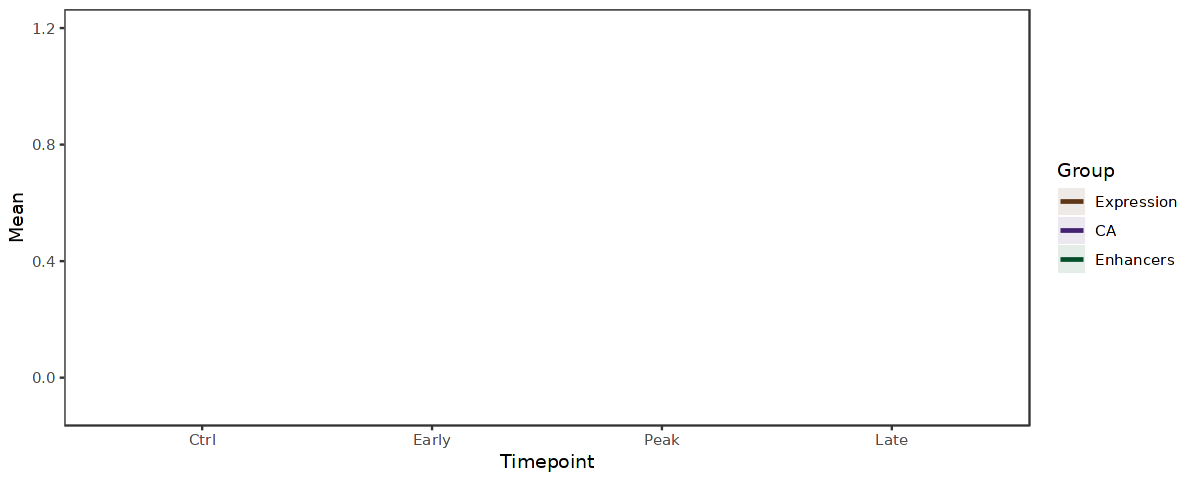

In [1041]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 2

In [1042]:
highest_cat <- "Early"

In [1043]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1044]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1045]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1046]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1047]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1049]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

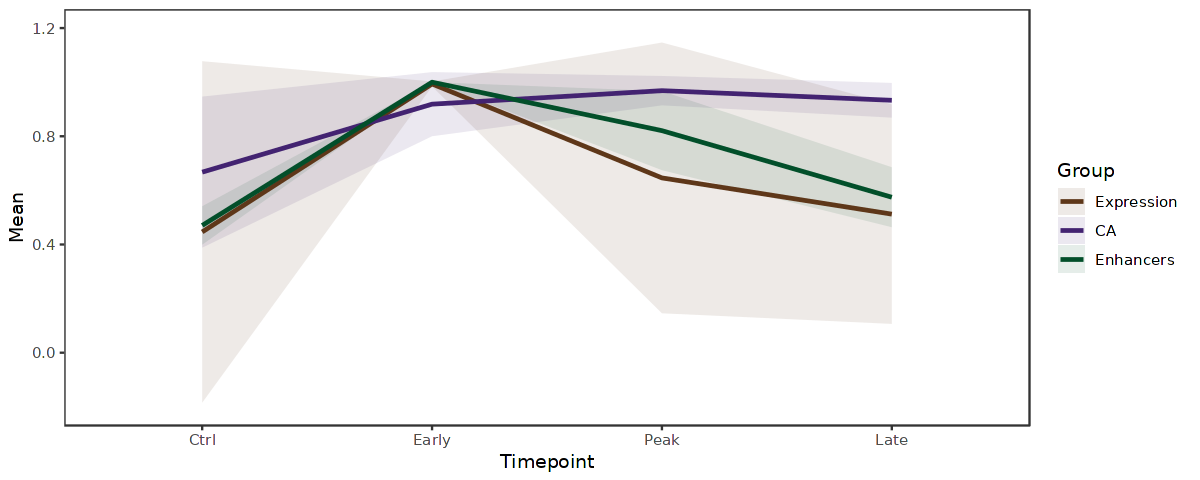

In [1050]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 3

In [1067]:
highest_cat <- "Peak"

In [1068]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1069]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1070]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1071]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1072]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1073]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

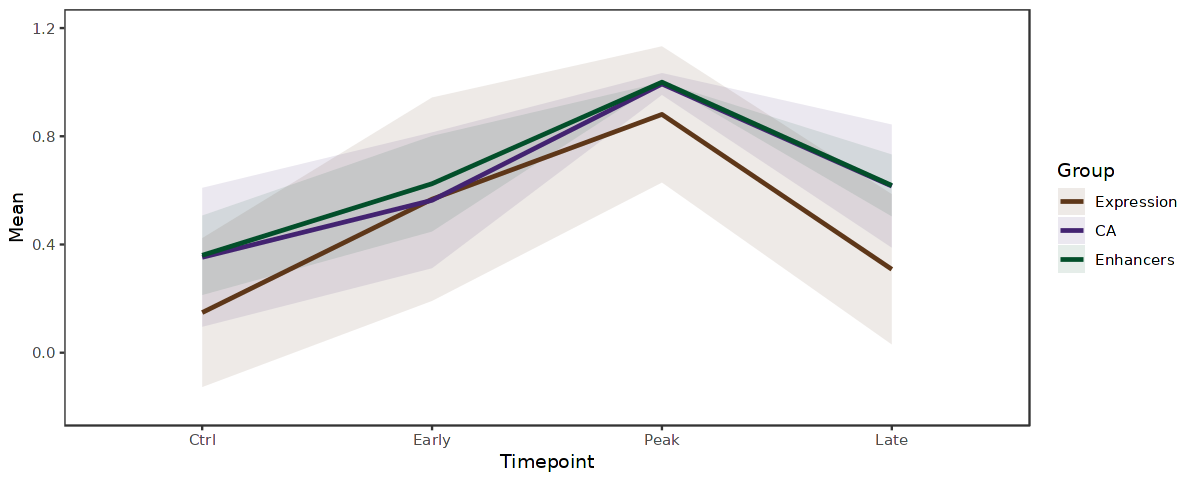

In [1074]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Category 4

In [1059]:
highest_cat <- "Late"

In [1060]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1061]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1062]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1063]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1064]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1065]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


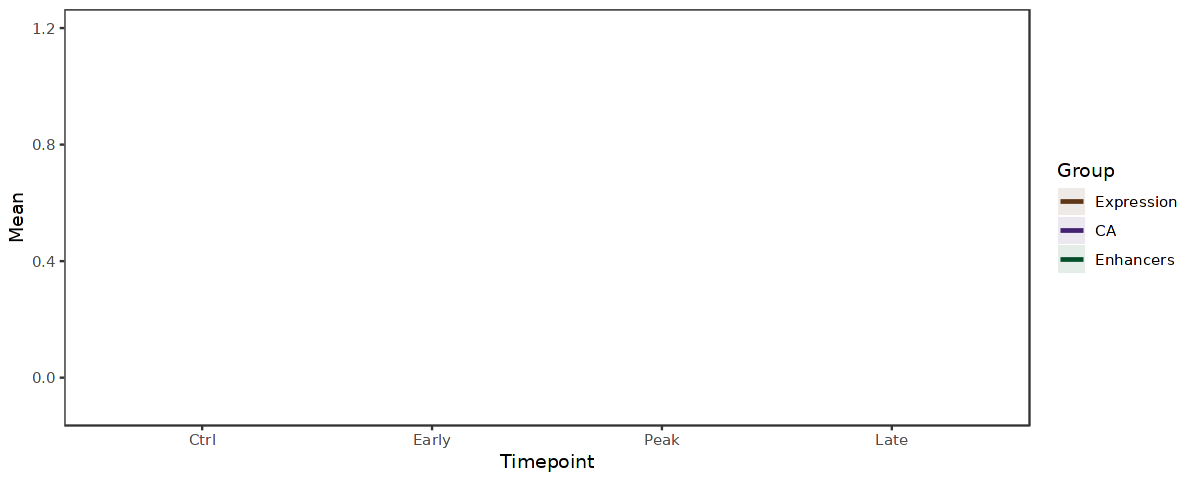

In [1066]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 1

In [1075]:
highest_cat <- "Ctrl"
second_highest_cat <- "Early"

In [1076]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1077]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1078]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1079]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1080]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1081]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1082]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1083]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1084]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


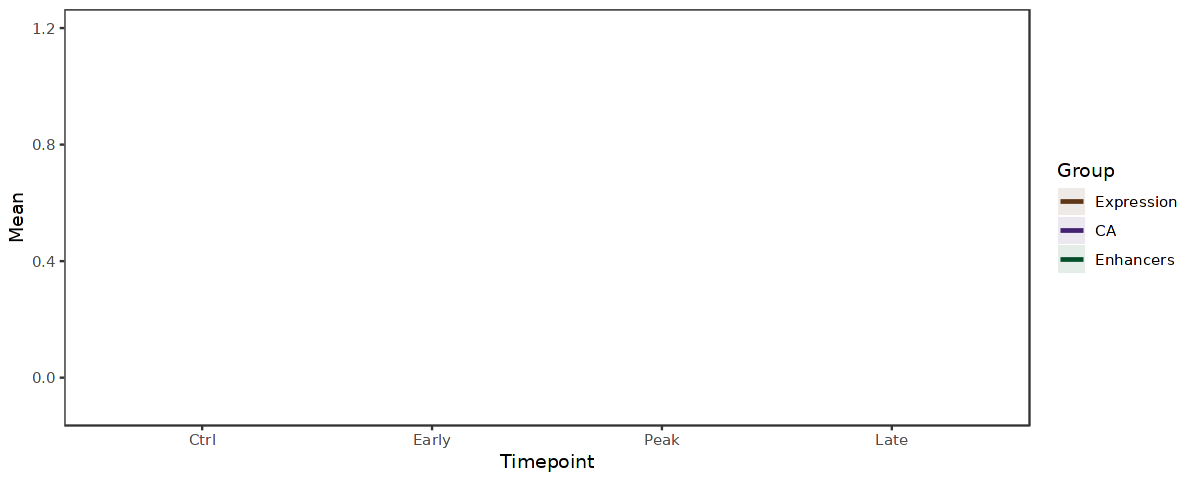

In [1085]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 2

In [1086]:
highest_cat <- "Ctrl"
second_highest_cat <- "Peak"

In [1087]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1088]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1089]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1090]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1091]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1092]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1093]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1094]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1095]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


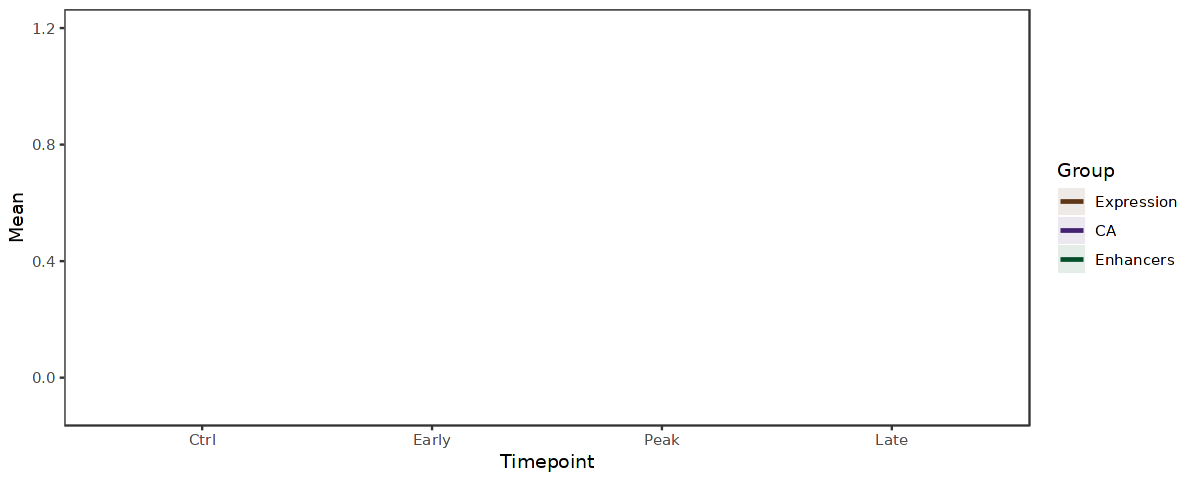

In [1096]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 3

In [1097]:
highest_cat <- "Ctrl"
second_highest_cat <- "Late"

In [1098]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1099]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1100]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1101]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1102]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1103]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1104]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1105]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1106]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


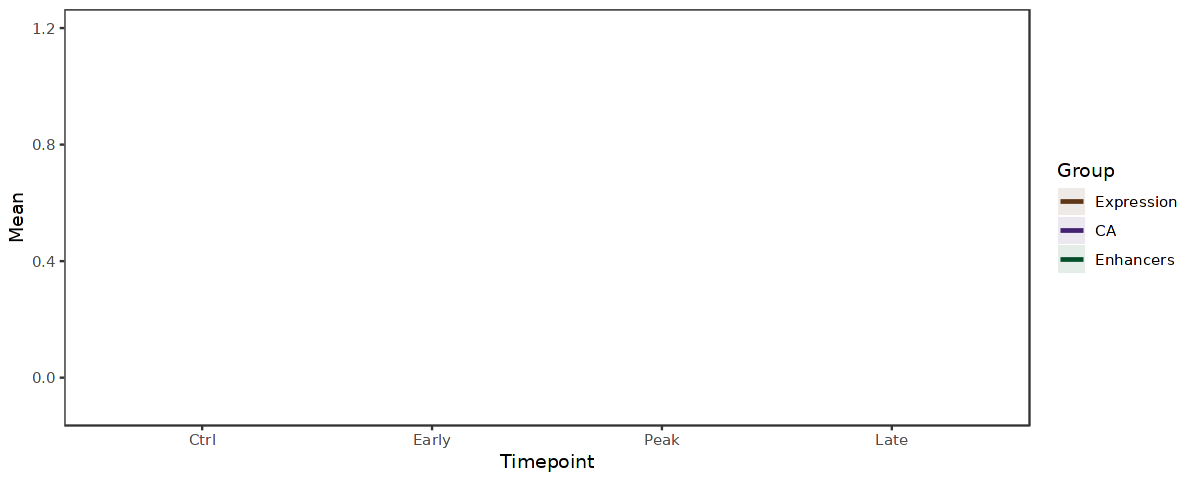

In [1107]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 4

In [1108]:
highest_cat <- "Early"
second_highest_cat <- "Ctrl"

In [1109]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1110]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1111]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1112]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1113]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1114]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1115]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1116]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1117]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


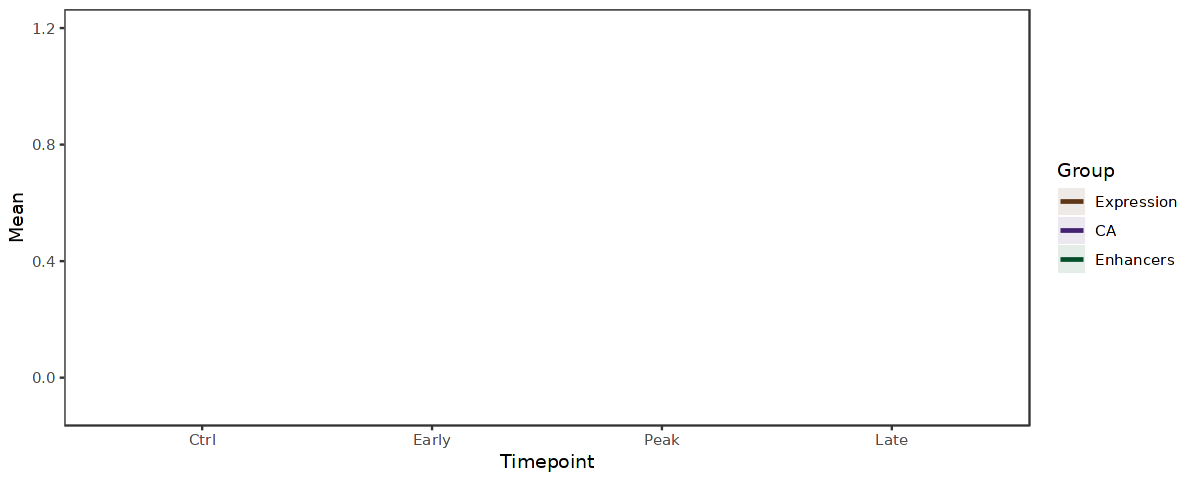

In [1118]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 5

In [1119]:
highest_cat <- "Early"
second_highest_cat <- "Peak"

In [1120]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1121]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1122]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1123]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1124]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1125]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1126]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1127]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1128]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

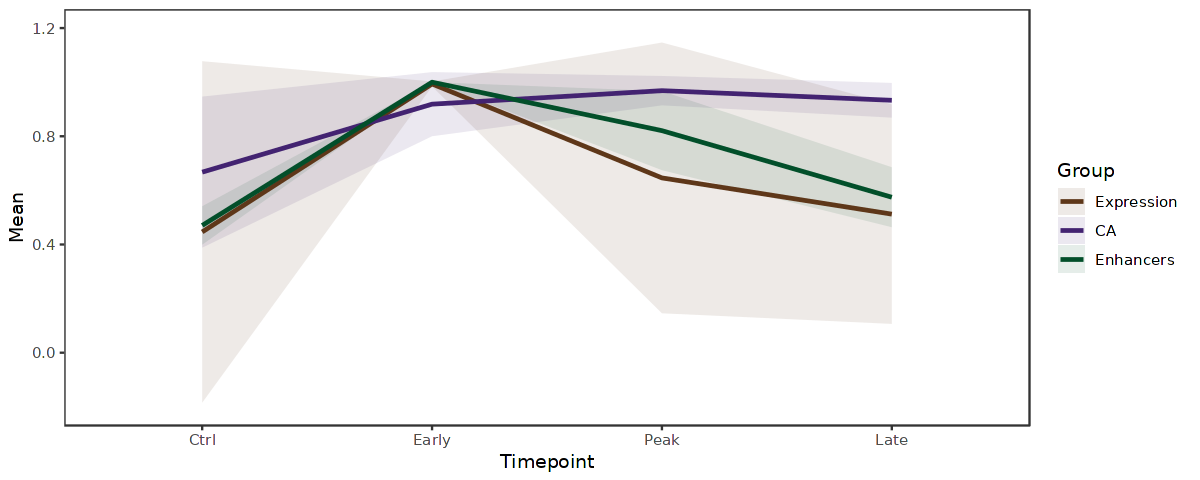

In [1129]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 6

In [1130]:
highest_cat <- "Early"
second_highest_cat <- "Late"

In [1131]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1132]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1133]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1134]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1135]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1136]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1137]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1138]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1139]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


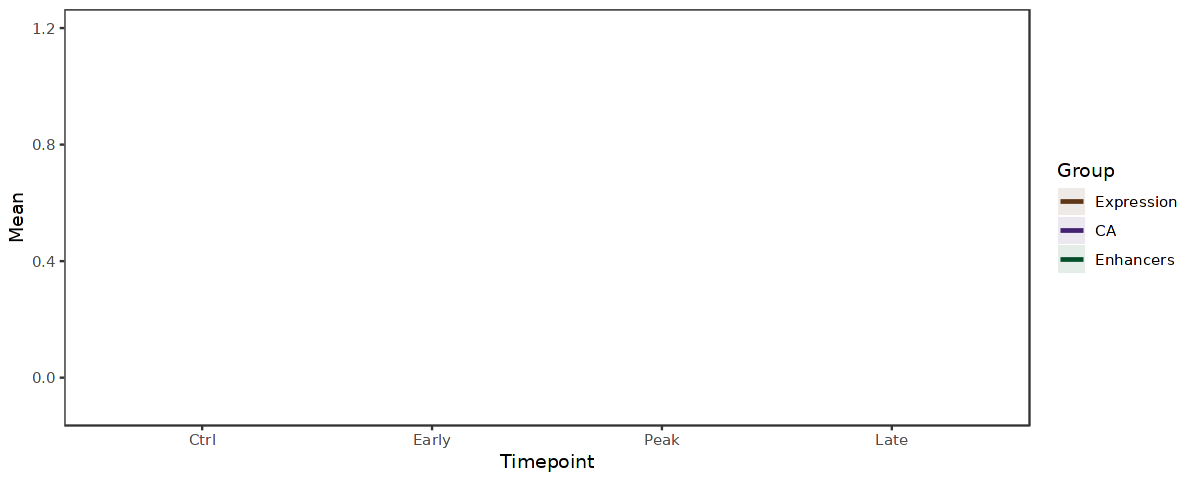

In [1140]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 7

In [1141]:
highest_cat <- "Peak"
second_highest_cat <- "Ctrl"

In [1142]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1143]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1144]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1145]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1146]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1147]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1148]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1149]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1150]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


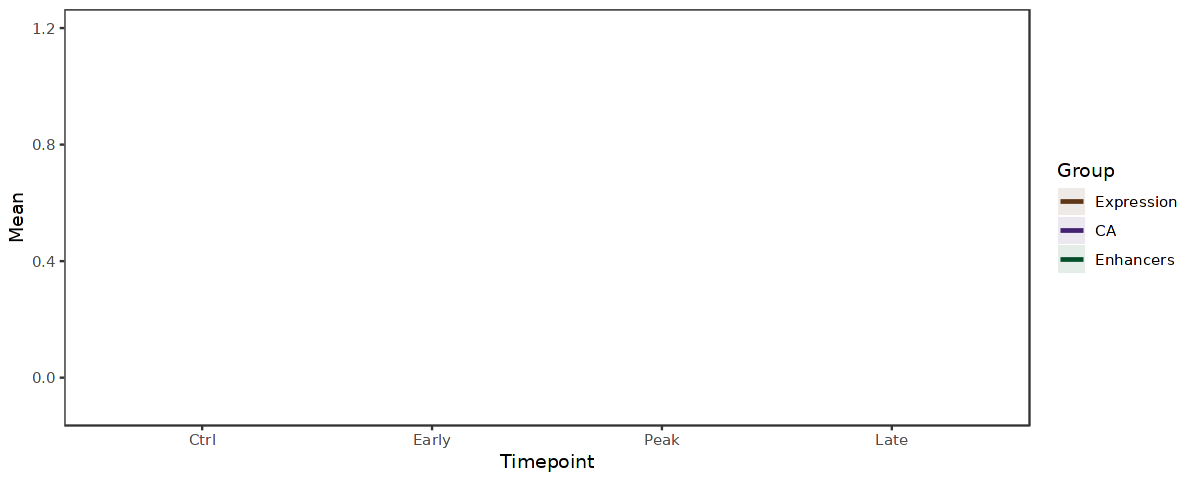

In [1151]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 8

In [1207]:
highest_cat <- "Peak"
second_highest_cat <- "Early"

In [1208]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1209]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1210]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1211]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1212]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1213]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1214]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1215]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1216]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

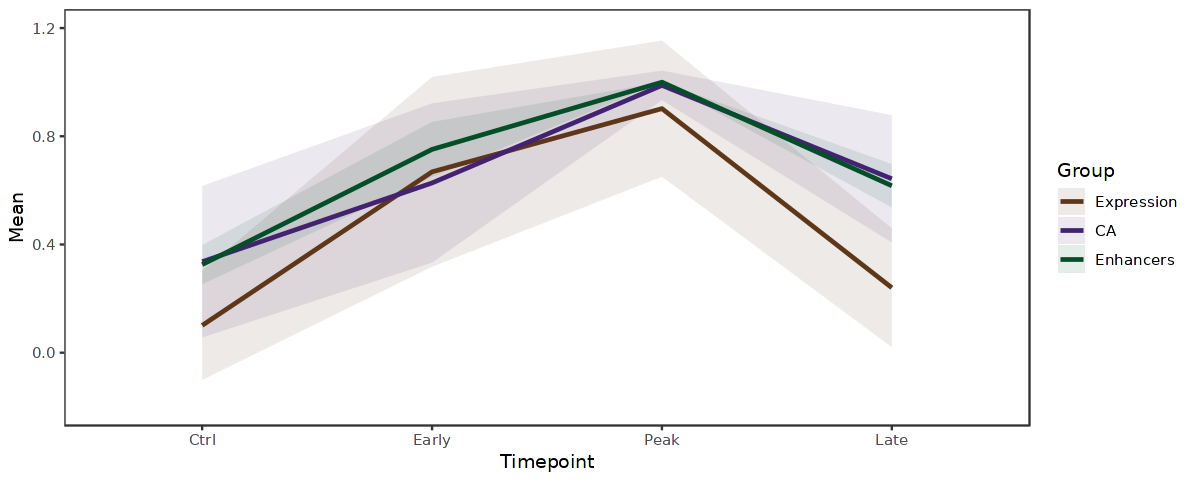

In [1217]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 9

In [1163]:
highest_cat <- "Peak"
second_highest_cat <- "Late"

In [1164]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1165]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1166]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1167]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1168]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1169]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1170]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1171]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1172]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

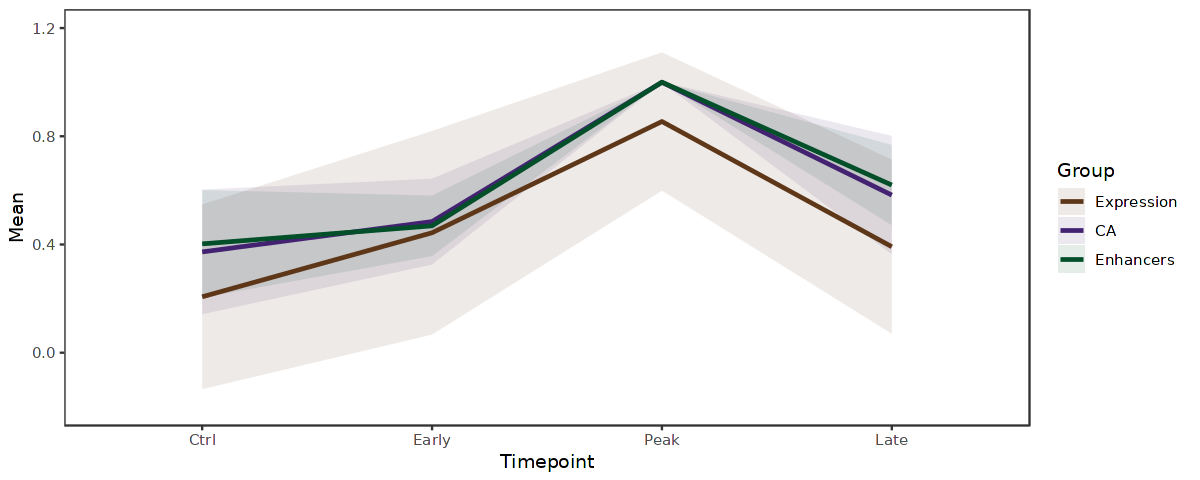

In [1173]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 10

In [1174]:
highest_cat <- "Late"
second_highest_cat <- "Ctrl"

In [1175]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1176]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1177]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1178]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1179]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1180]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1181]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1182]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1183]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


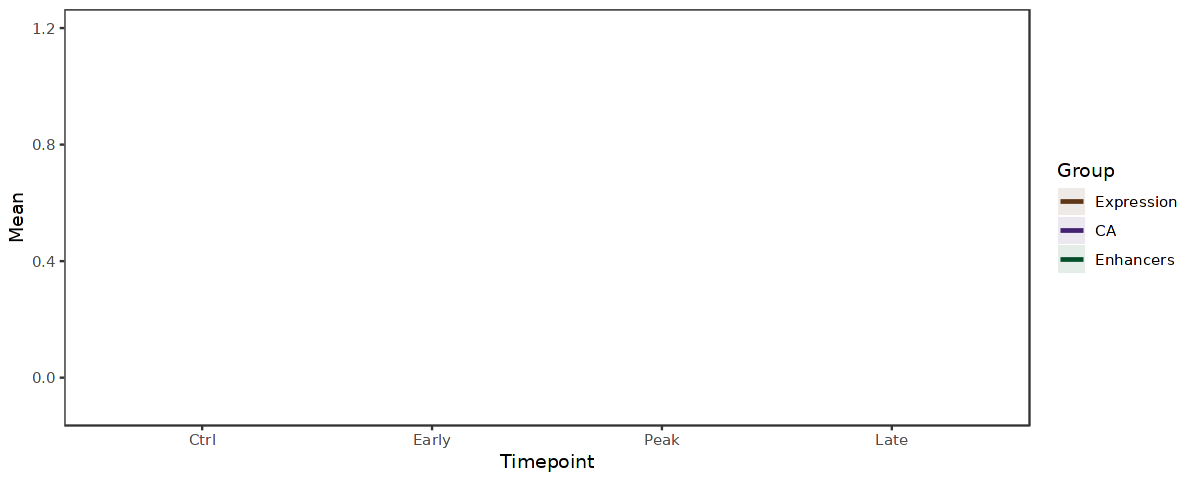

In [1184]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 11

In [1185]:
highest_cat <- "Late"
second_highest_cat <- "Early"

In [1186]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1187]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1188]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1189]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1190]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1191]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1192]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1193]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1194]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


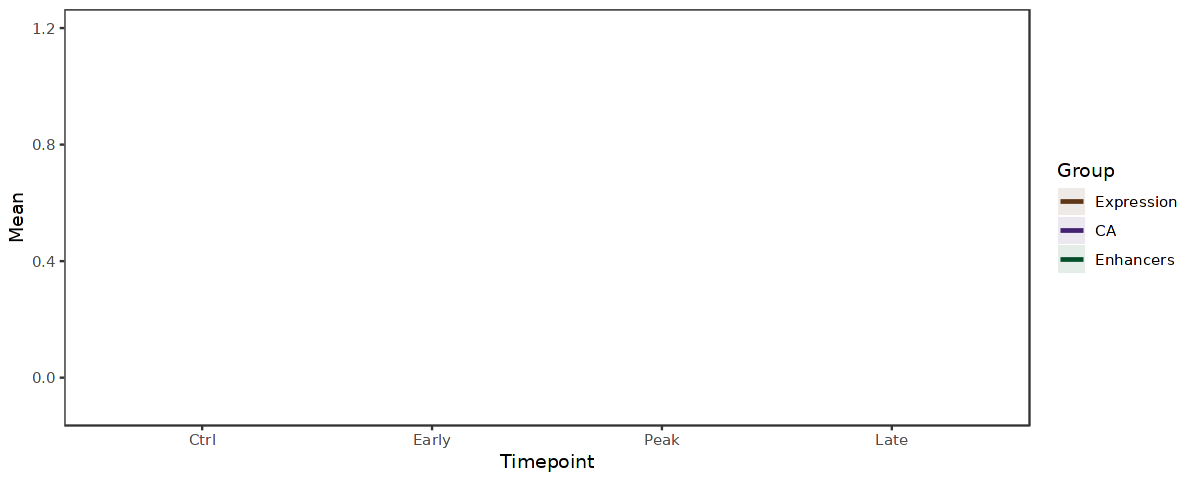

In [1195]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### Sub category 12

In [1196]:
highest_cat <- "Late"
second_highest_cat <- "Peak"

In [1197]:
gene_list <- rownames(tmp_sample_markers_DORCs_scaled[correct_order,][tmp_sample_markers_DORCs_scaled[correct_order,highest_cat] == 1,])

In [1198]:
no_highest_cat <- names(orig.ident_merge_colors)[names(orig.ident_merge_colors) != highest_cat]

In [1199]:
index_second_highest_cat <- match(second_highest_cat, no_highest_cat)

In [1200]:
gene_list <- rownames(subset(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], max.col(tmp_sample_markers_DORCs_scaled[gene_list,no_highest_cat], 'first') == index_second_highest_cat))

In [1201]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [1202]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [1203]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [1204]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("Enhancers",4))
)

In [1205]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","Enhancers"))

Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`)."


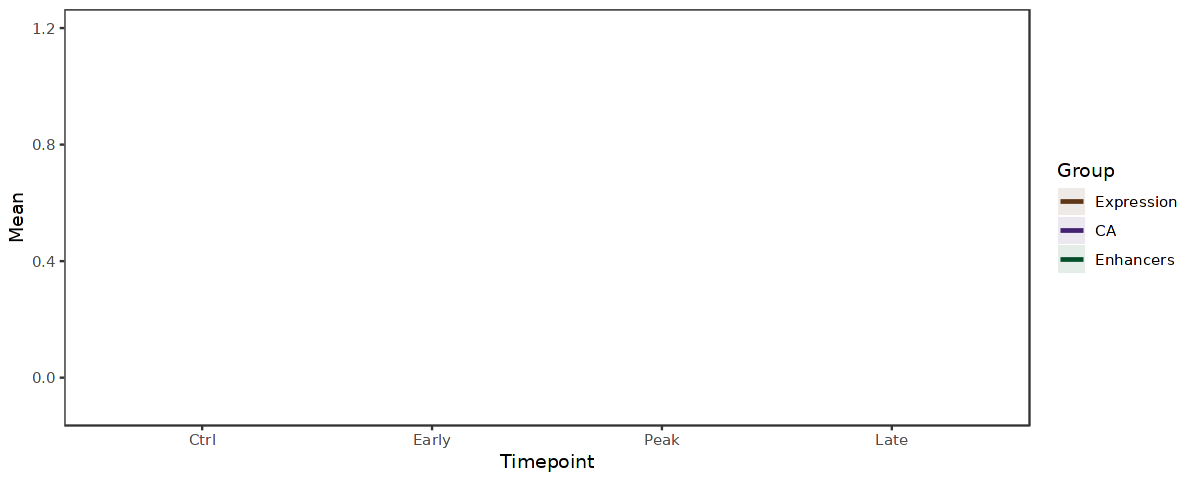

In [1206]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), linewidth = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())